In [ ]:
import argparse
import pandas as pd
import pickle
from scripts.imports import *
from scripts.parallel_blocks import *
from scripts.FSC_dataframe_phoreal import FSC_dataframe

# Function to parse command line arguments
def parse_args():
    parser = argparse.ArgumentParser(description="Generate and save a concatenated dataframe from multiple directories.")
    parser.add_argument('output_pickle', type=str, help='Name of the output pickle file (without extension)')
    parser.add_argument('--width', type=float, default=5, help='Width of the box (default: 0.05)')
    parser.add_argument('--height', type=float, default=5, help='Height of the box (default: 0.05)')
    parser.add_argument('--small_box', type=float, default=1, help='Size of the small box (default: 0.005)')
    parser.add_argument('--threshold', type=int, default=1, help='Data threshold value (default: 2)')
    parser.add_argument('--alt_thresh', type=int, default=80, help='Altitude threshold value (default: 90)')
    parser.add_argument('--rebinned', type=int, default=0, help='Rebinned into specified meter resolution')
    parser.add_argument('--method', type=str, default='normal', help='Method for probability distribution')
    parser.add_argument('--site', type=str, default='all', help='restrict to specific site if necessary')
    parser.add_argument('--outlier_removal', type=float, default=0, help='outlier_removal by z_score')
    return parser.parse_args()

# Main function
def main():

    output_pickle = 'dataset'

    dirpaths = [
        # '../data_store/data/sodankyla_full/',
        # '../data_store/data/delta_junction/',
        # '../data_store/data/marcell_MN/',
        # '../data_store/data/lacclair/',
        # '../data_store/data/torgnon/',
        '../data_store/data/oregon_yp/'
    ]
        
    csv_path = 'snow_cam_details.csv'
    excel_df = pd.read_csv(csv_path).drop('Image', axis=1)
    
    output_pickle_file = f"{output_pickle}.pkl"
    checkpoint_file = f"{output_pickle}_checkpoint.pkl"

    width=5
    height=5
    threshold=1
    small_box=10
    alt_thresh=80
    rebinned=30
    method='bimodal'
    outlier_removal=2
    loss='linear'
    
    # Load progress if checkpoint exists
    if os.path.exists(checkpoint_file):
        with open(checkpoint_file, 'rb') as f:
            processed_indices, partial_df = pickle.load(f)
        print(f"Resuming from checkpoint. Already processed: {processed_indices}")
    else:
        processed_indices = set()
        partial_df = pd.DataFrame()

    for dir_idx, dirpath in enumerate(dirpaths):
        foldername = dirpath.split('/')[-2]
        
        all_ATL03, all_ATL08 = track_pairs(dirpath)
        total_indices = len(all_ATL03)

        for i in range(total_indices):
            # Skip already processed indices
            if (dir_idx, i) in processed_indices:
                continue

            try:
                filedate = datetime_to_date(parse_filename_datetime(all_ATL03[i]))

                if ((excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername)).any():
                    coords = (excel_df.loc[(excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername), 'x_coord'].iloc[0],\
                              excel_df.loc[(excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername), 'y_coord'].iloc[0])
                    altitude = excel_df.loc[(excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername), 'Altitude'].iloc[0]
                    
                    df = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i],
                                                                coords = coords,width=width,height=height,
                                                                file_index = i,loss=loss, graph_detail=0,
                                                               altitude=altitude, threshold=threshold, small_box=small_box,\
                                                                  alt_thresh=alt_thresh, rebinned=rebinned, method=method,
                                                                  outlier_removal=outlier_removal)
                                                                  
                    df['FSC'] = excel_df.loc[(excel_df['Date'] == filedate) & (excel_df['Camera'] == foldername), 'FSC'].iloc[0]
                    df['TreeSnow'] = excel_df.loc[(excel_df['Date']==filedate) & (excel_df['Camera']==foldername), 'Tree Snow'].iloc[0]

                    # Append new data to the partial dataframe
                    partial_df = pd.concat([partial_df, df], ignore_index=True)

                    # print(partial_df)

                    # Update the processed indices
                    processed_indices.add((dir_idx, i))

                    # Save checkpoint after each index
                    with open(checkpoint_file, 'wb') as f:
                        pickle.dump((processed_indices, partial_df), f)
                    print(f"Checkpoint saved to {checkpoint_file}")

            except Exception as e:
                print(f"Error processing {dirpath} index {i}: {e}")
                continue

    # Save final results
    partial_df.reset_index(drop=True, inplace=True)
    partial_df.to_pickle(output_pickle_file)

    # Clean up checkpoint
    if os.path.exists(checkpoint_file):
        os.remove(checkpoint_file)

    print(f"Dataframe saved to {output_pickle_file}")

if __name__ == '__main__':
    main()

Resuming from checkpoint. Already processed: {(0, 1), (0, 2), (0, 0)}
../data_store/data/oregon_yp/ 3


# Sodankyla

#### Arctan loss, f_scale = .1

Nothing in rebinned section for sodankyla_full file 0's beam 3.
Nothing in rebinned section for sodankyla_full file 0's beam 4.
Nothing in rebinned section for sodankyla_full file 0's beam 5.
Nothing in rebinned section for sodankyla_full file 0's beam 6.


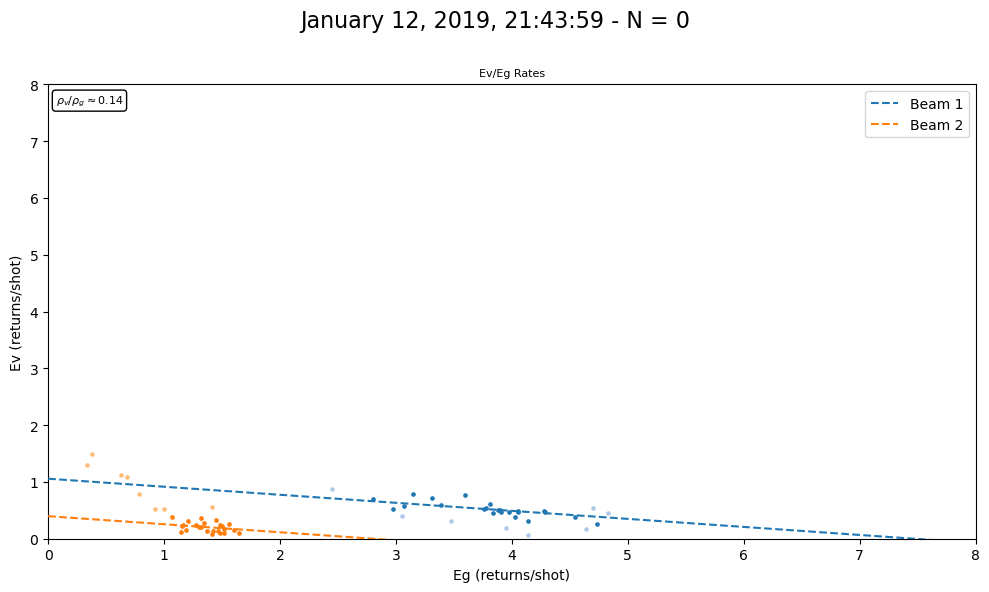

Nothing in rebinned section for sodankyla_full file 1's beam 1.
Nothing in rebinned section for sodankyla_full file 1's beam 2.


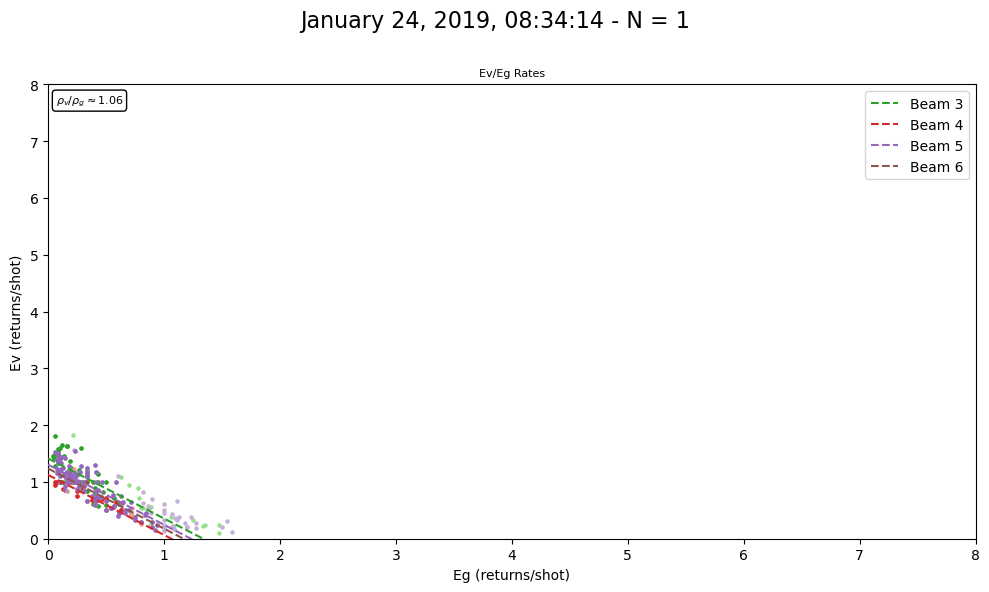

Nothing in rebinned section for sodankyla_full file 2's beam 2.
Nothing in rebinned section for sodankyla_full file 2's beam 3.
Nothing in rebinned section for sodankyla_full file 2's beam 4.
Nothing in rebinned section for sodankyla_full file 2's beam 5.
Nothing in rebinned section for sodankyla_full file 2's beam 6.


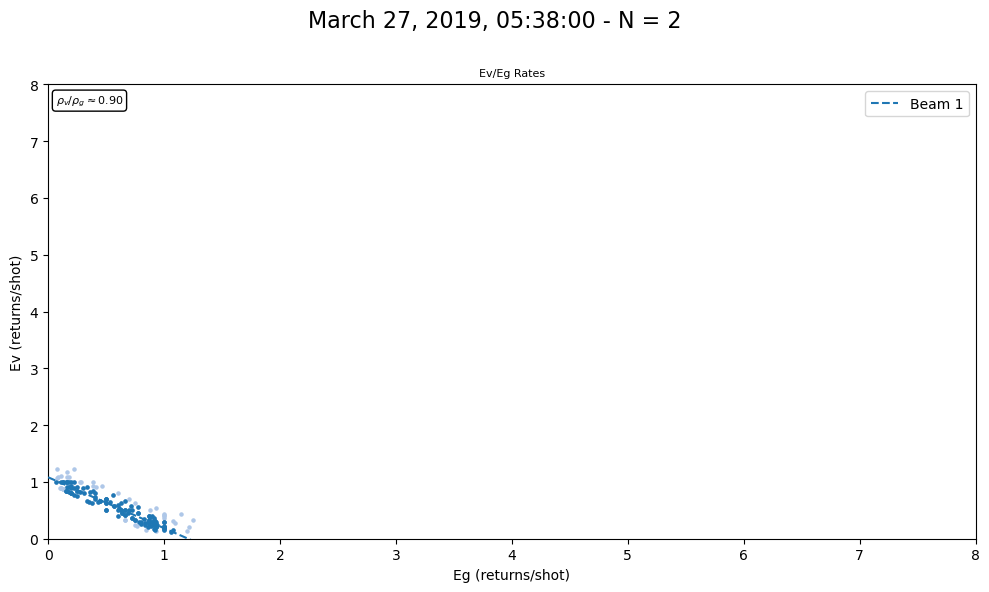

Nothing in rebinned section for sodankyla_full file 3's beam 5.
Nothing in rebinned section for sodankyla_full file 3's beam 6.


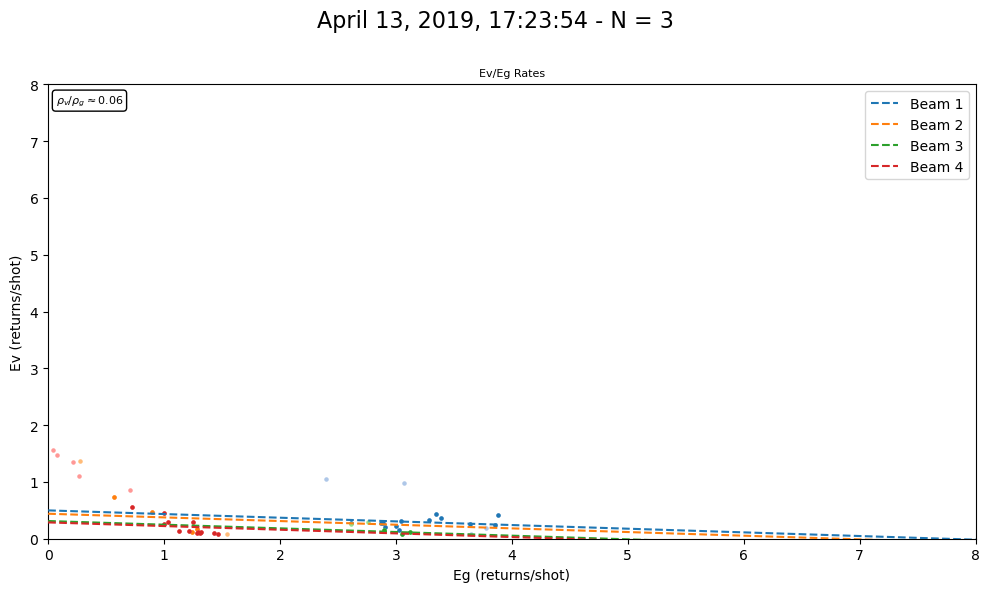

Nothing in rebinned section for sodankyla_full file 4's beam 1.
Nothing in rebinned section for sodankyla_full file 4's beam 2.
Nothing in rebinned section for sodankyla_full file 4's beam 3.
Nothing in rebinned section for sodankyla_full file 4's beam 4.


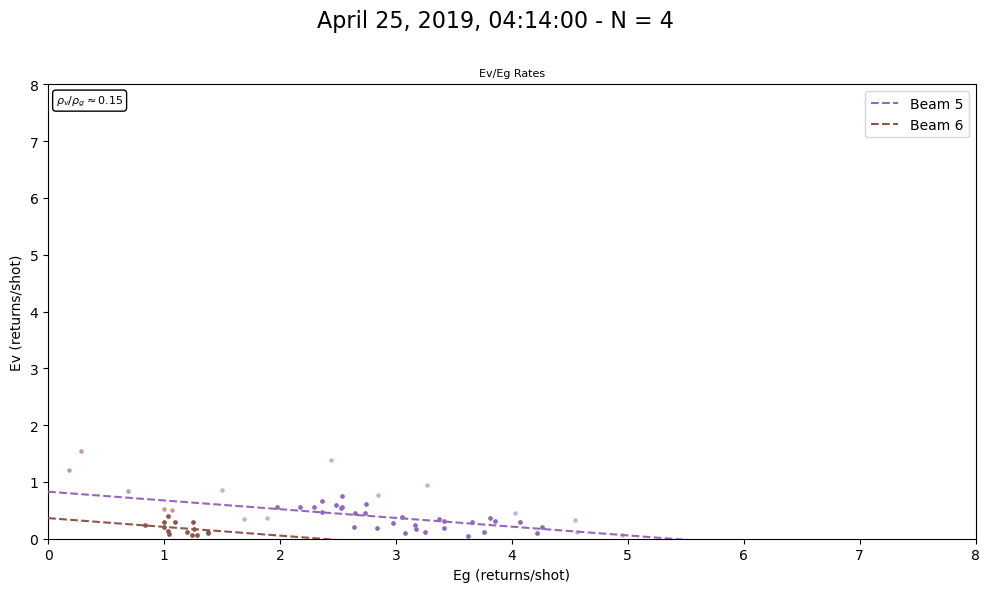

Nothing in rebinned section for sodankyla_full file 5's beam 1.
Nothing in rebinned section for sodankyla_full file 5's beam 2.
Nothing in rebinned section for sodankyla_full file 5's beam 3.
Nothing in rebinned section for sodankyla_full file 5's beam 4.


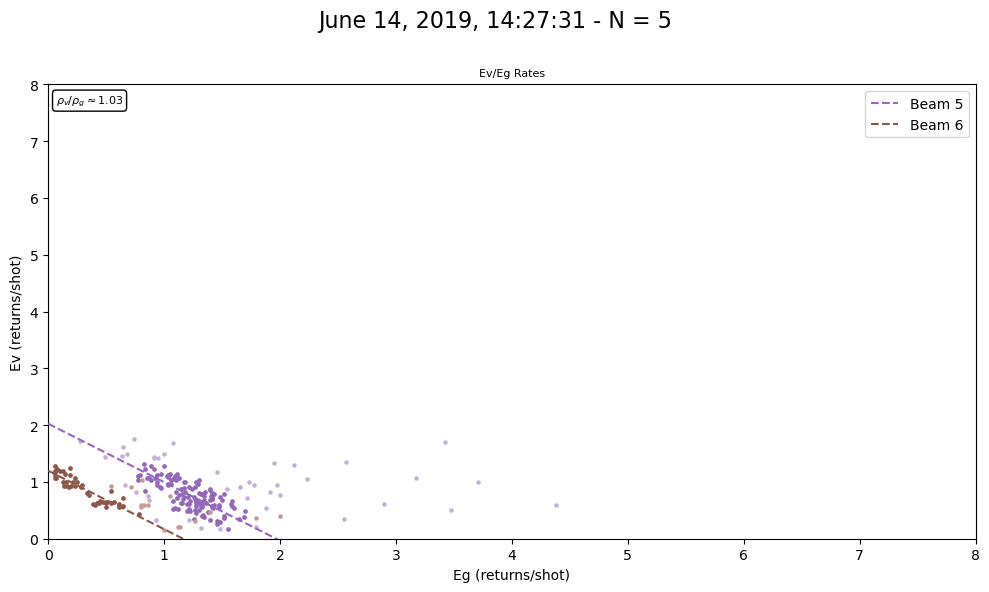

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for sodankyla_full file 6's beam 3.
Nothing in rebinned section for sodankyla_full file 6's beam 4.
Nothing in rebinned section for sodankyla_full file 6's beam 5.
Nothing in rebinned section for sodankyla_full file 6's beam 6.


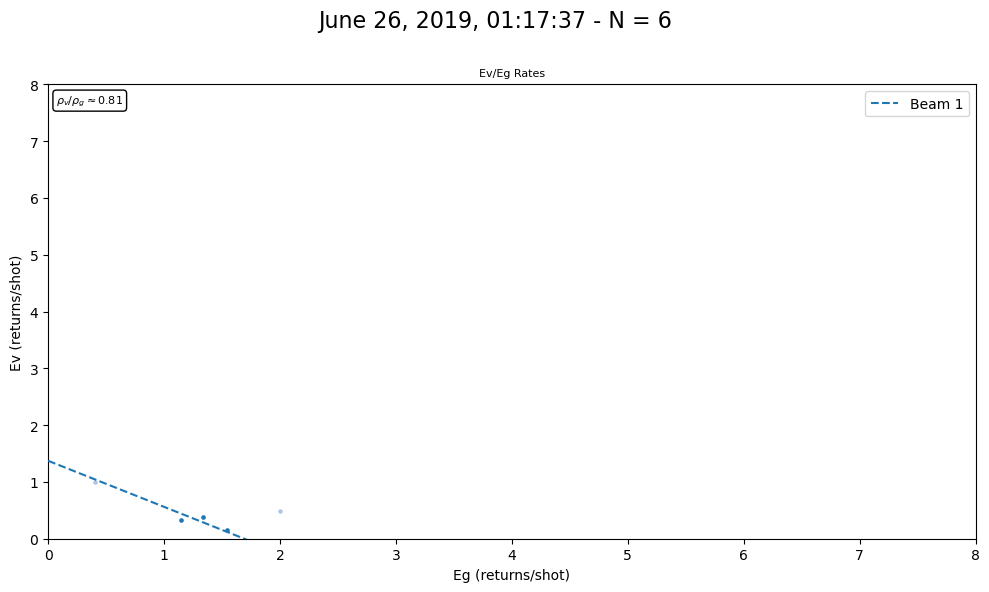

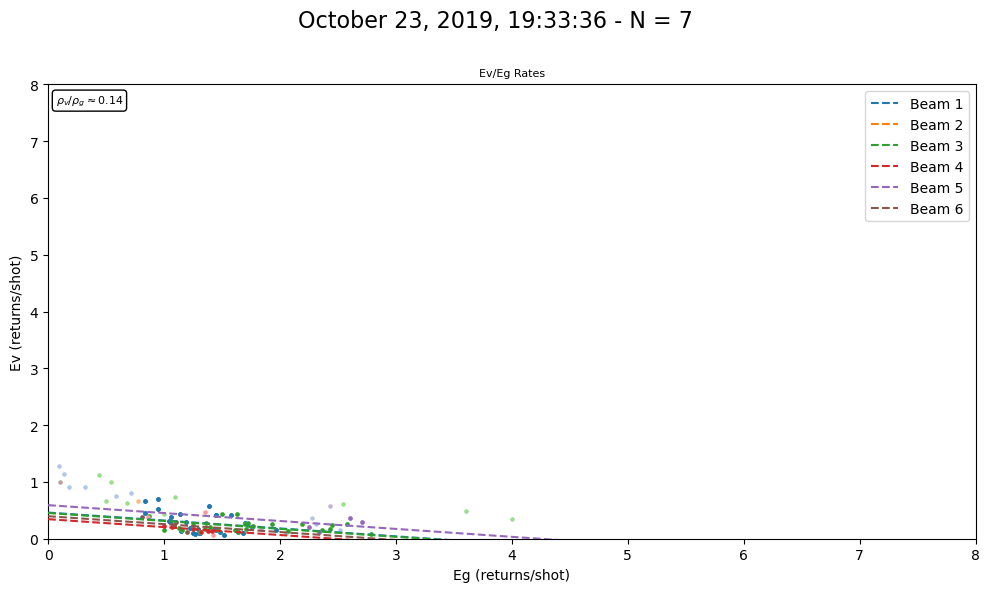

Nothing in rebinned section for sodankyla_full file 8's beam 1.
Nothing in rebinned section for sodankyla_full file 8's beam 2.


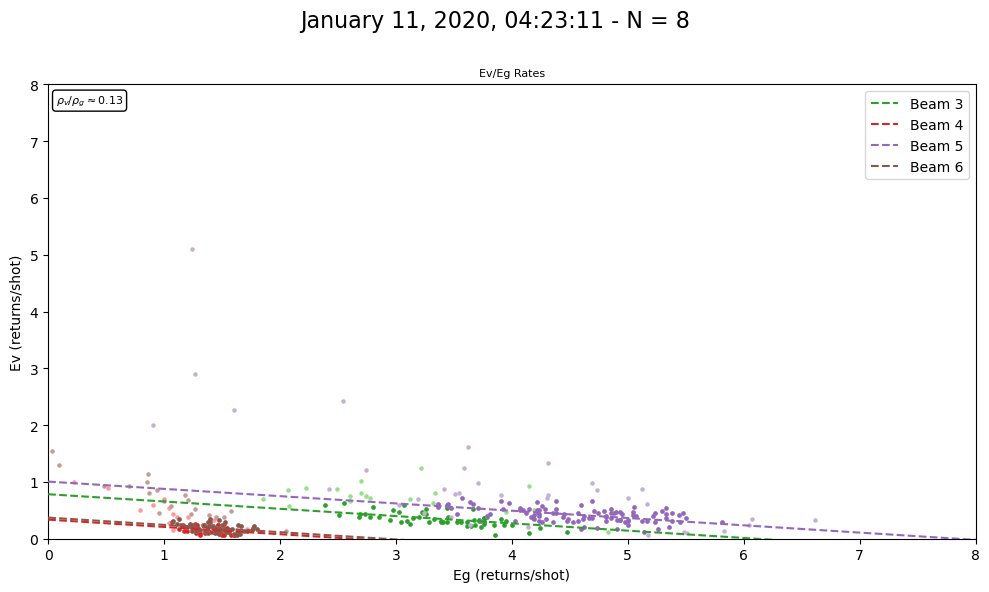

Nothing in rebinned section for sodankyla_full file 9's beam 1.
Nothing in rebinned section for sodankyla_full file 9's beam 2.
Nothing in rebinned section for sodankyla_full file 9's beam 3.
Nothing in rebinned section for sodankyla_full file 9's beam 4.
Nothing in rebinned section for sodankyla_full file 9's beam 5.
Nothing in rebinned section for sodankyla_full file 9's beam 6.
Nothing in rebinned section for sodankyla_full file 10's beam 1.
Nothing in rebinned section for sodankyla_full file 10's beam 2.


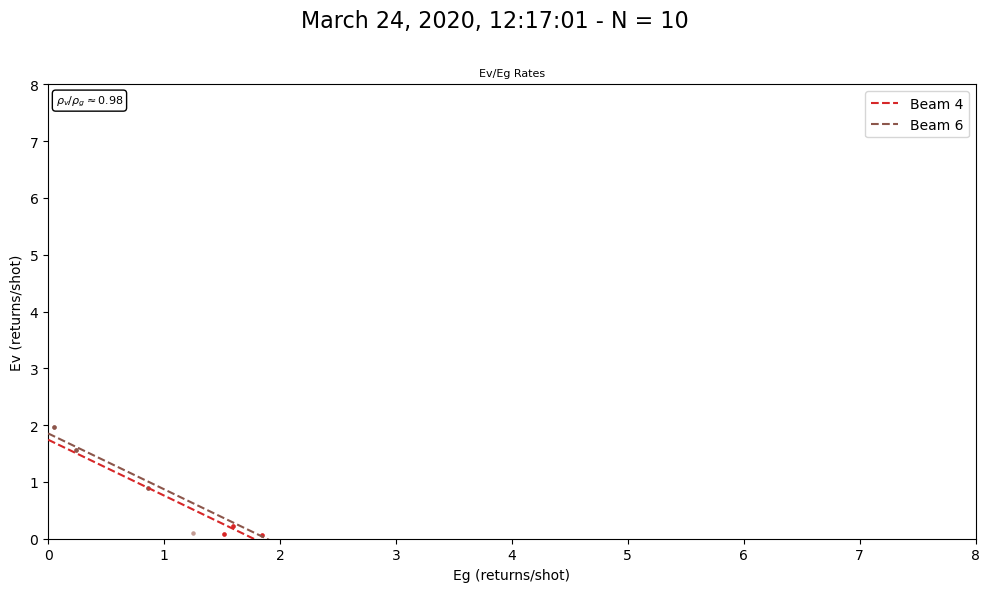

Nothing in rebinned section for sodankyla_full file 11's beam 1.
Nothing in rebinned section for sodankyla_full file 11's beam 2.


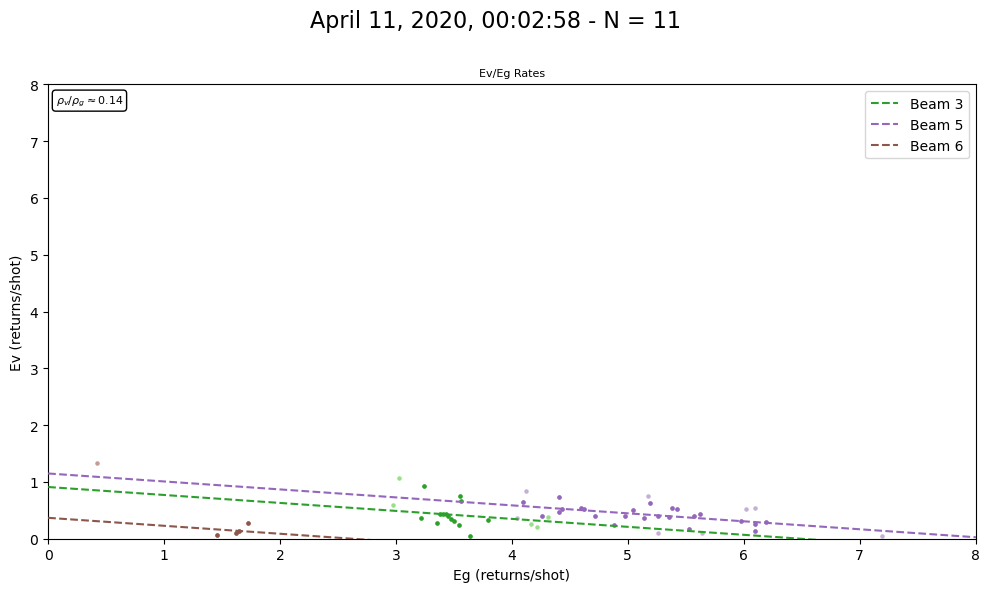

Nothing in rebinned section for sodankyla_full file 12's beam 5.
Nothing in rebinned section for sodankyla_full file 12's beam 6.


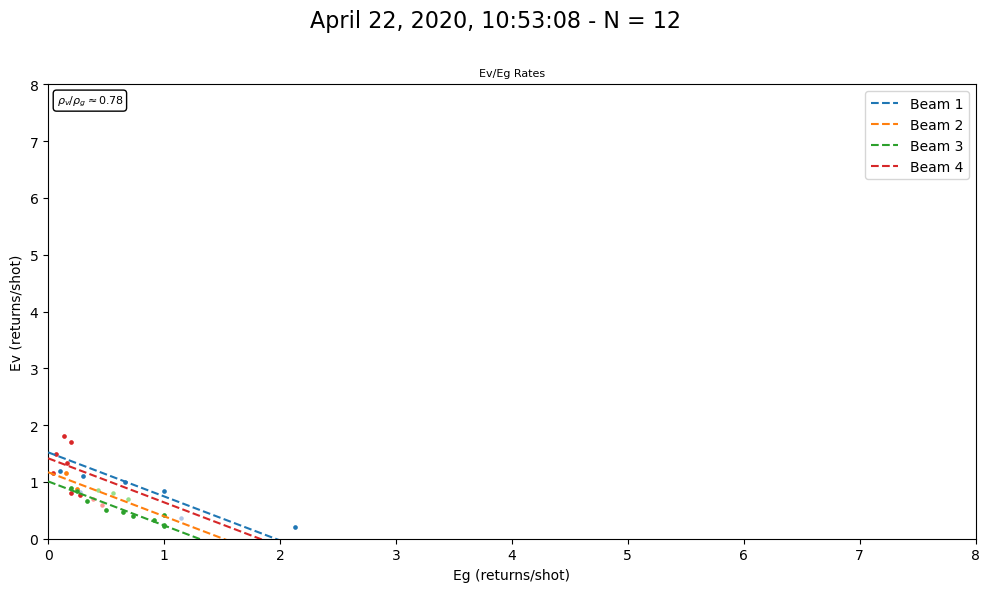

Nothing in rebinned section for sodankyla_full file 13's beam 1.
Nothing in rebinned section for sodankyla_full file 13's beam 2.
Nothing in rebinned section for sodankyla_full file 13's beam 3.
Nothing in rebinned section for sodankyla_full file 13's beam 4.


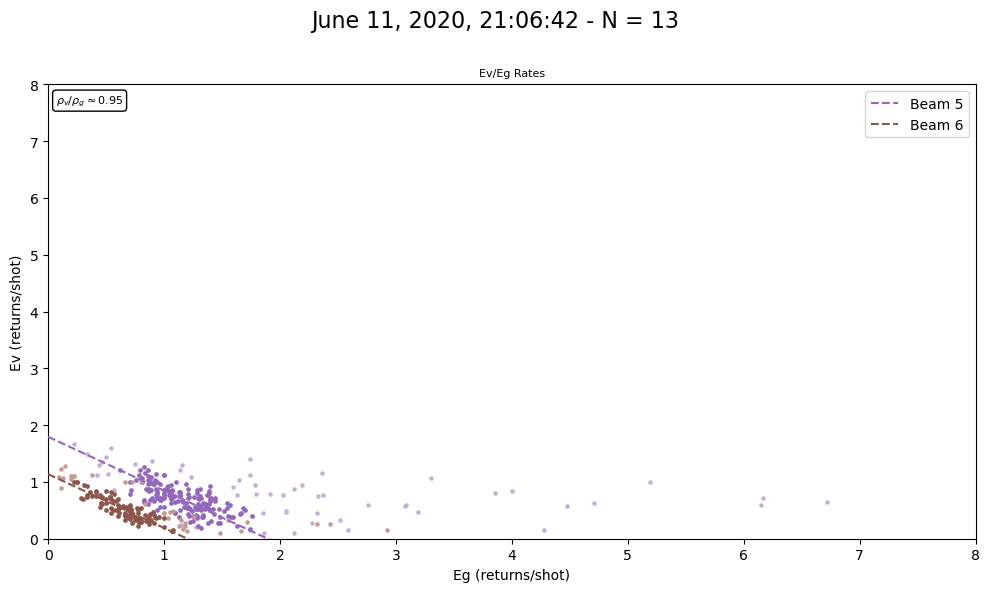

Nothing in rebinned section for sodankyla_full file 14's beam 1.
Nothing in rebinned section for sodankyla_full file 14's beam 2.
Nothing in rebinned section for sodankyla_full file 14's beam 3.
Nothing in rebinned section for sodankyla_full file 14's beam 4.
Nothing in rebinned section for sodankyla_full file 14's beam 5.
Nothing in rebinned section for sodankyla_full file 14's beam 6.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for sodankyla_full file 15's beam 2.
Nothing in rebinned section for sodankyla_full file 15's beam 3.
Nothing in rebinned section for sodankyla_full file 15's beam 5.
Nothing in rebinned section for sodankyla_full file 15's beam 6.
Nothing in rebinned section for sodankyla_full file 16's beam 1.
Nothing in rebinned section for sodankyla_full file 16's beam 2.
Nothing in rebinned section for sodankyla_full file 16's beam 3.
Nothing in rebinned section for sodankyla_full file 16's beam 4.


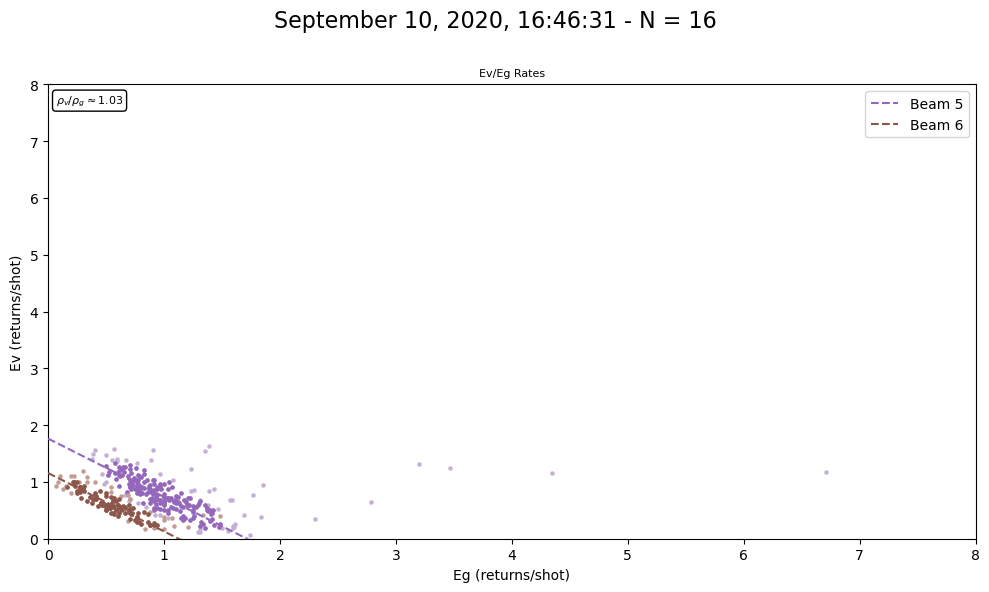

Nothing in rebinned section for sodankyla_full file 17's beam 1.
Nothing in rebinned section for sodankyla_full file 17's beam 2.


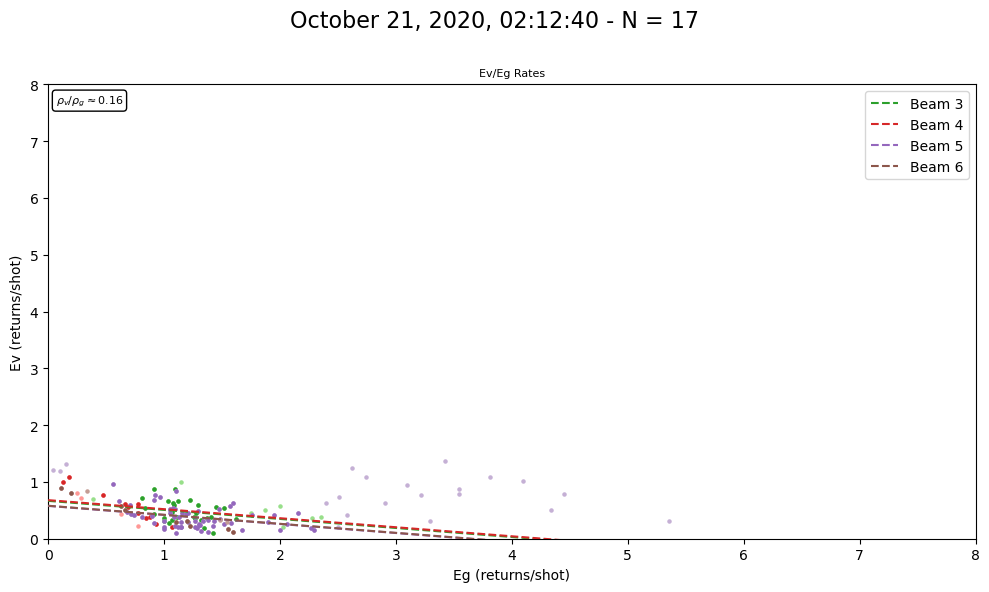

Nothing in rebinned section for sodankyla_full file 18's beam 1.
Nothing in rebinned section for sodankyla_full file 18's beam 2.
Nothing in rebinned section for sodankyla_full file 18's beam 3.
Nothing in rebinned section for sodankyla_full file 18's beam 4.
Nothing in rebinned section for sodankyla_full file 18's beam 5.
Nothing in rebinned section for sodankyla_full file 18's beam 6.


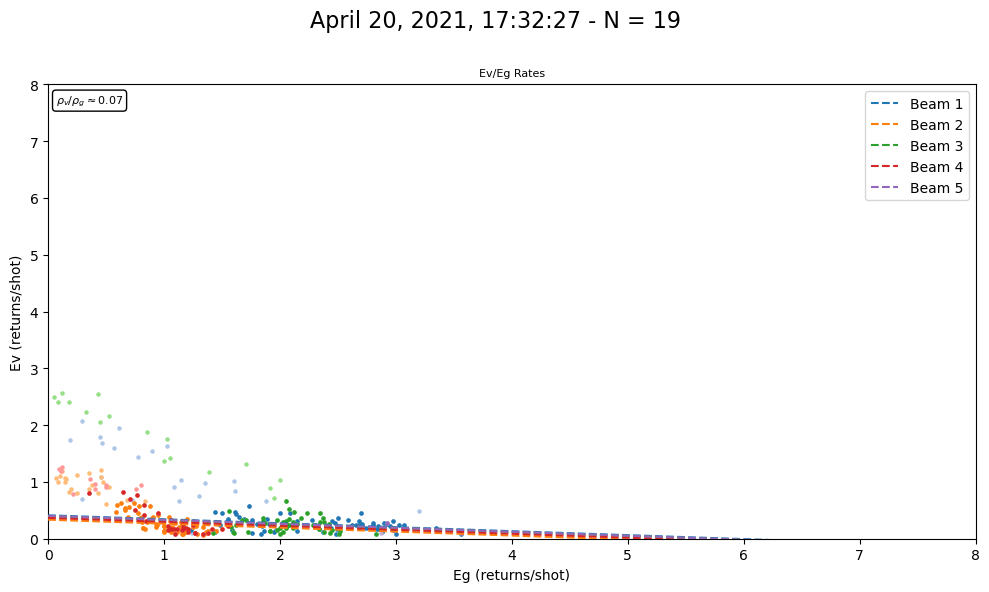

Nothing in rebinned section for sodankyla_full file 20's beam 3.
Nothing in rebinned section for sodankyla_full file 20's beam 4.
Nothing in rebinned section for sodankyla_full file 20's beam 5.
Nothing in rebinned section for sodankyla_full file 20's beam 6.


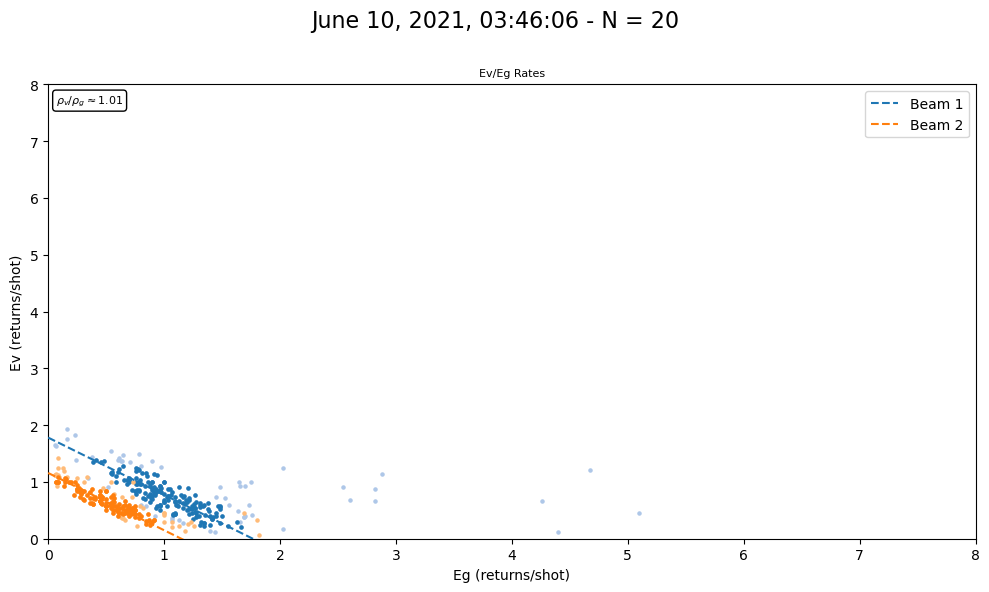

Nothing in rebinned section for sodankyla_full file 21's beam 1.
Nothing in rebinned section for sodankyla_full file 21's beam 2.


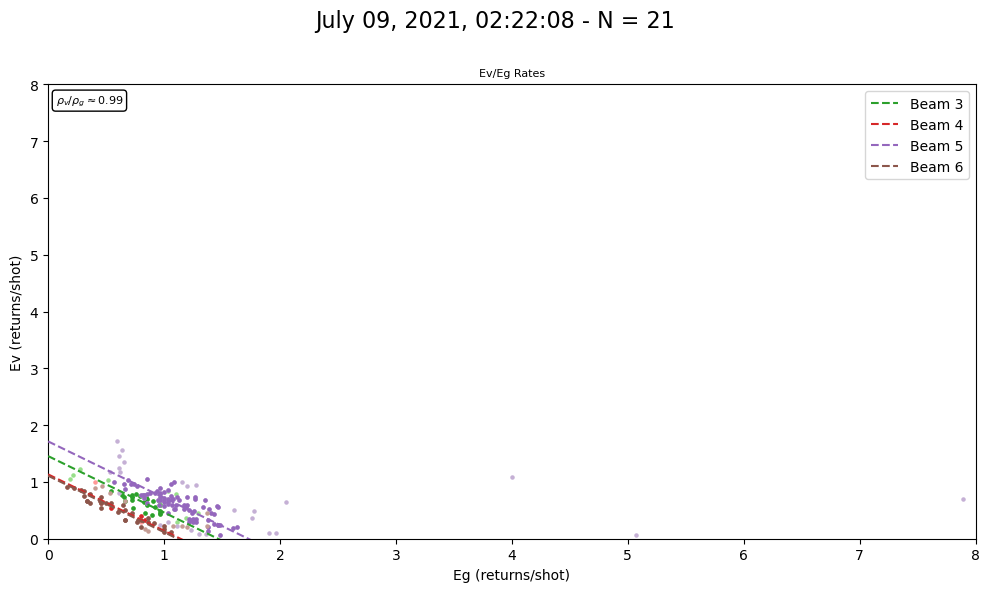

Nothing in rebinned section for sodankyla_full file 22's beam 3.
Nothing in rebinned section for sodankyla_full file 22's beam 4.
Nothing in rebinned section for sodankyla_full file 22's beam 5.
Nothing in rebinned section for sodankyla_full file 22's beam 6.


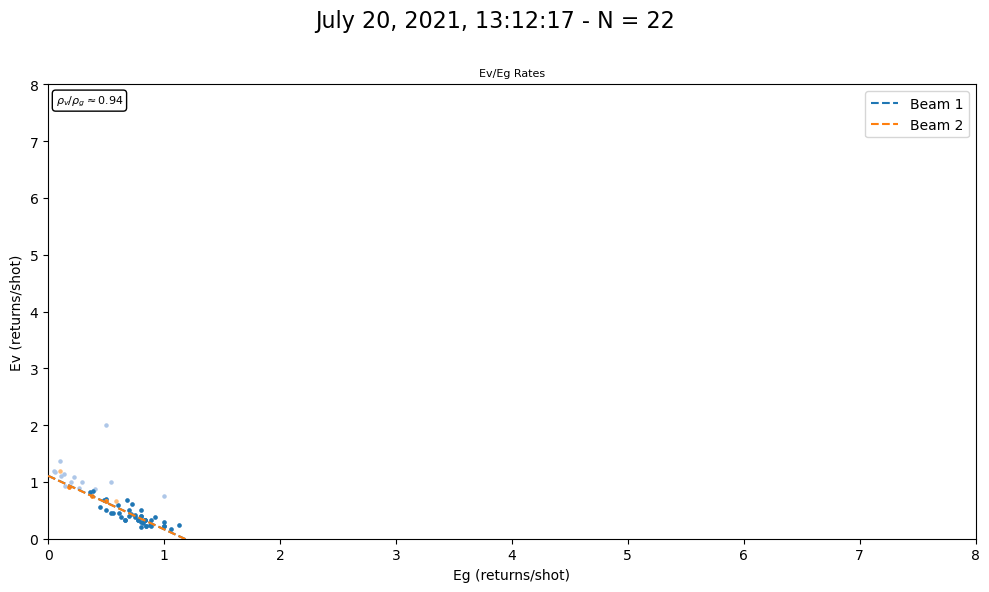

Nothing in rebinned section for sodankyla_full file 23's beam 3.
Nothing in rebinned section for sodankyla_full file 23's beam 4.
Nothing in rebinned section for sodankyla_full file 23's beam 5.
Nothing in rebinned section for sodankyla_full file 23's beam 6.


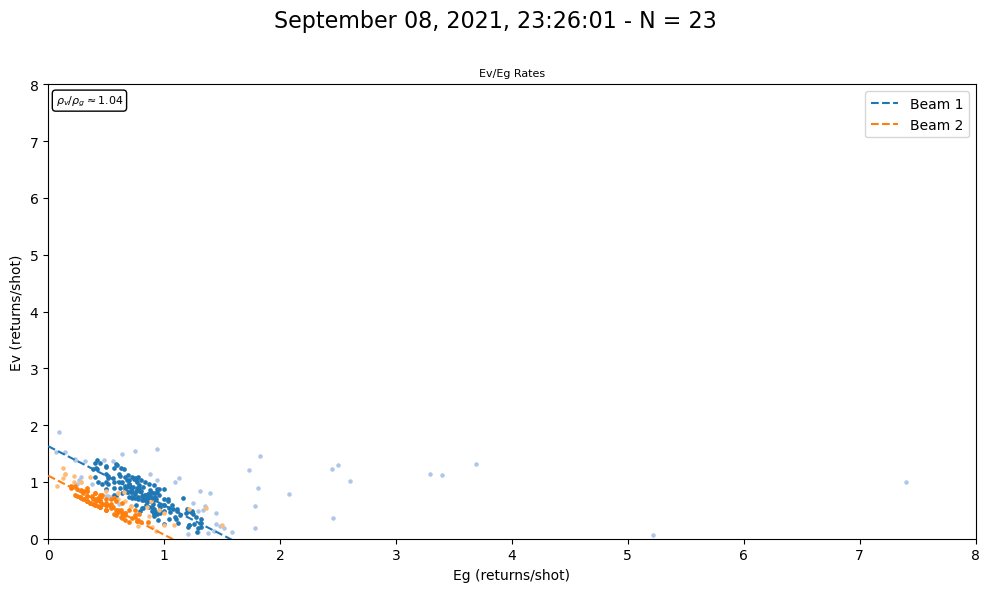

Nothing in rebinned section for sodankyla_full file 24's beam 1.
Nothing in rebinned section for sodankyla_full file 24's beam 2.
Nothing in rebinned section for sodankyla_full file 24's beam 3.
Nothing in rebinned section for sodankyla_full file 24's beam 4.


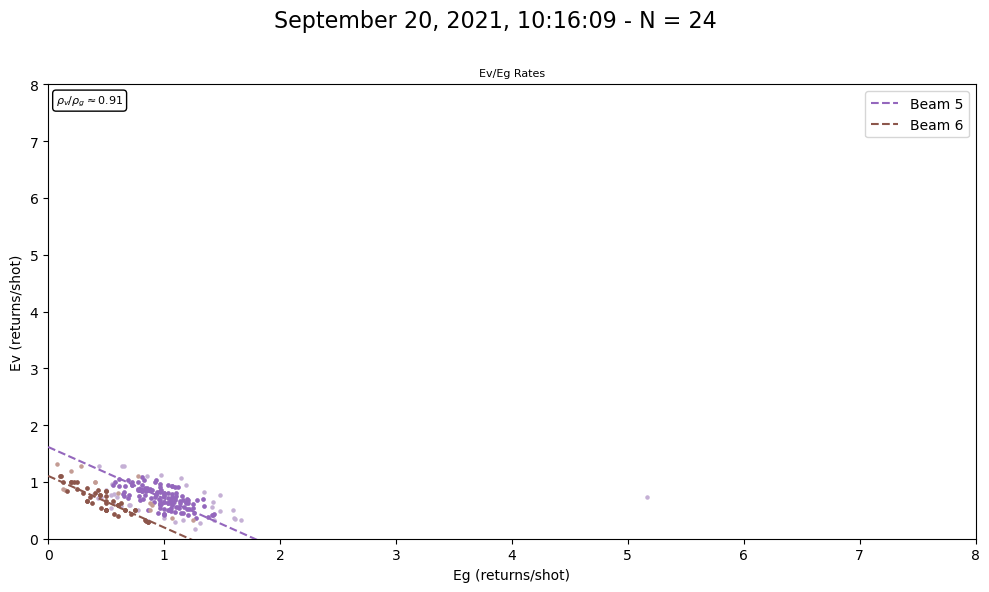

Nothing in rebinned section for sodankyla_full file 25's beam 3.
Nothing in rebinned section for sodankyla_full file 25's beam 4.
Nothing in rebinned section for sodankyla_full file 25's beam 5.
Nothing in rebinned section for sodankyla_full file 25's beam 6.


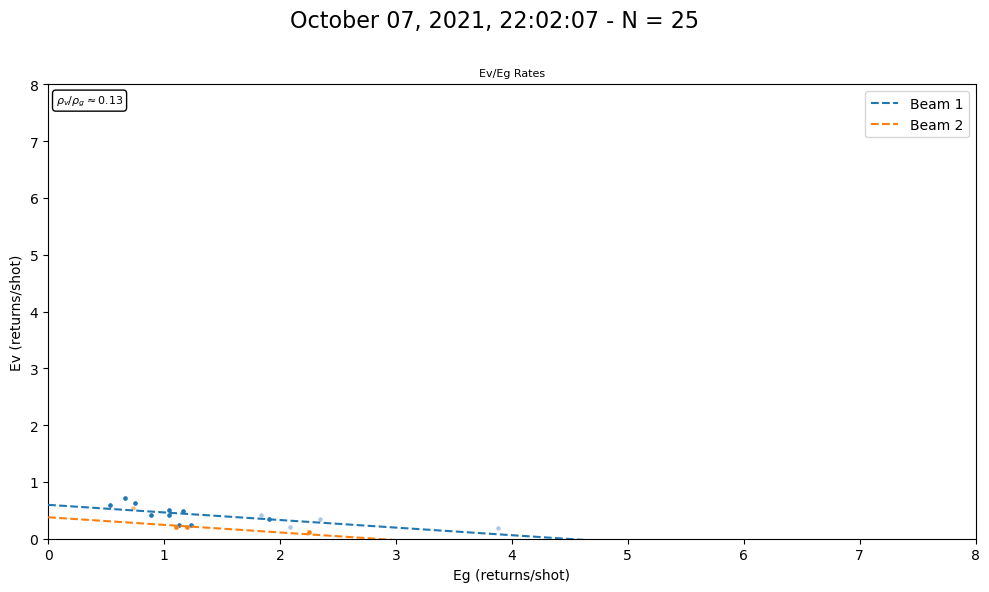

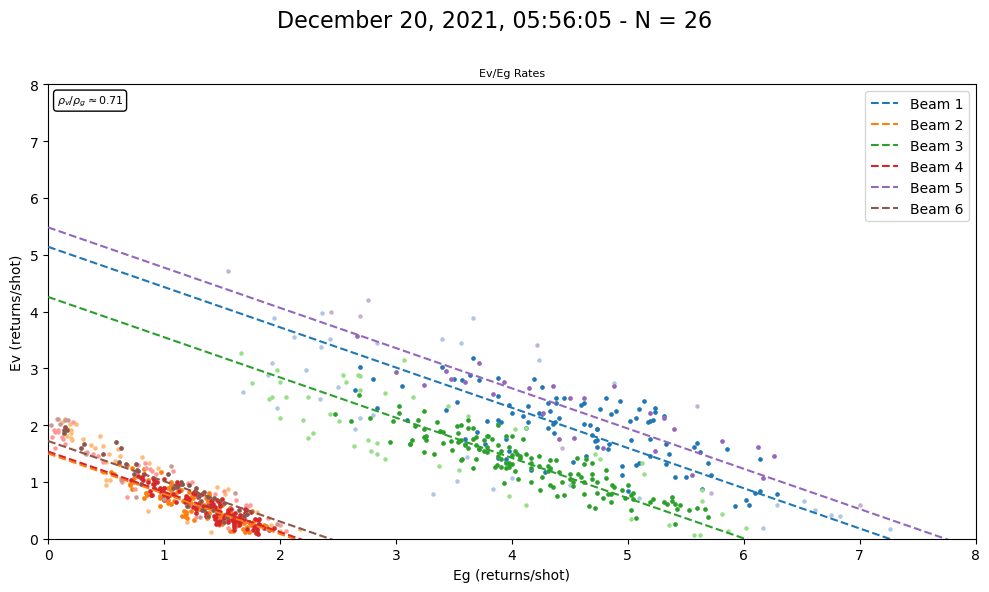

Nothing in rebinned section for sodankyla_full file 27's beam 1.
Nothing in rebinned section for sodankyla_full file 27's beam 2.
Nothing in rebinned section for sodankyla_full file 27's beam 3.
Nothing in rebinned section for sodankyla_full file 27's beam 4.


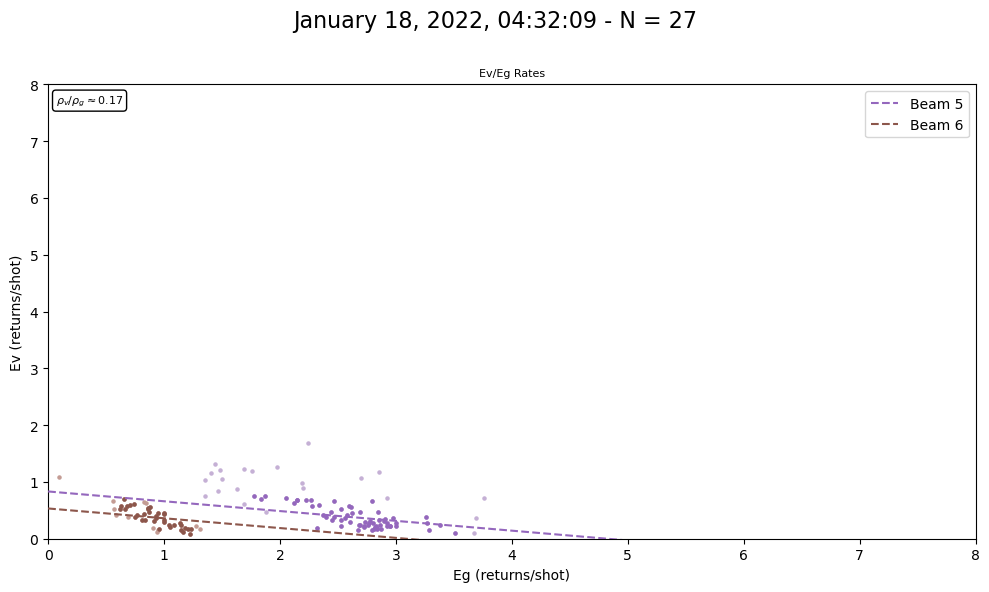

Nothing in rebinned section for sodankyla_full file 28's beam 1.
Nothing in rebinned section for sodankyla_full file 28's beam 2.
Nothing in rebinned section for sodankyla_full file 28's beam 3.
Nothing in rebinned section for sodankyla_full file 28's beam 4.


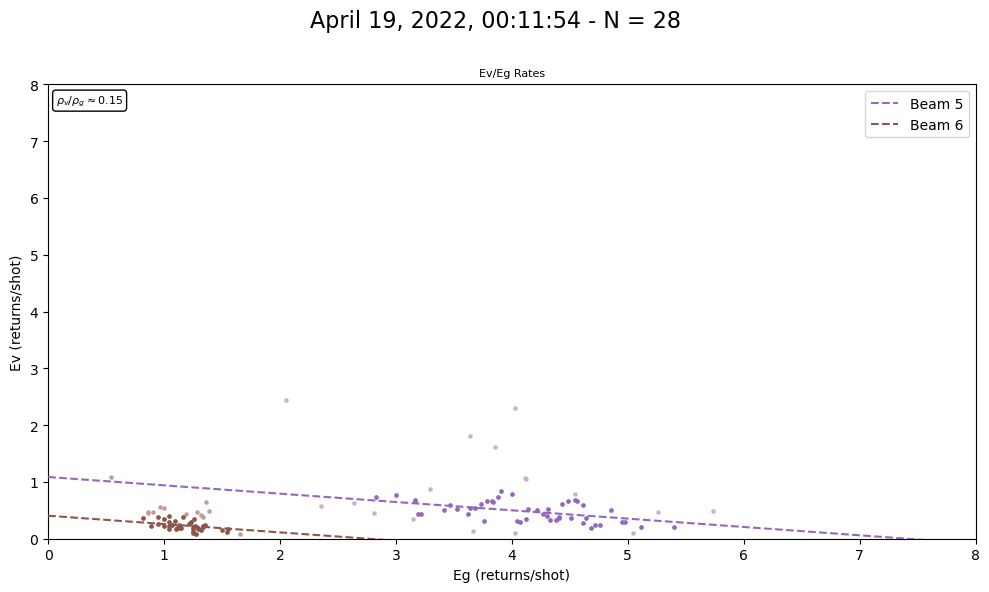

Nothing in rebinned section for sodankyla_full file 29's beam 1.
Nothing in rebinned section for sodankyla_full file 29's beam 2.


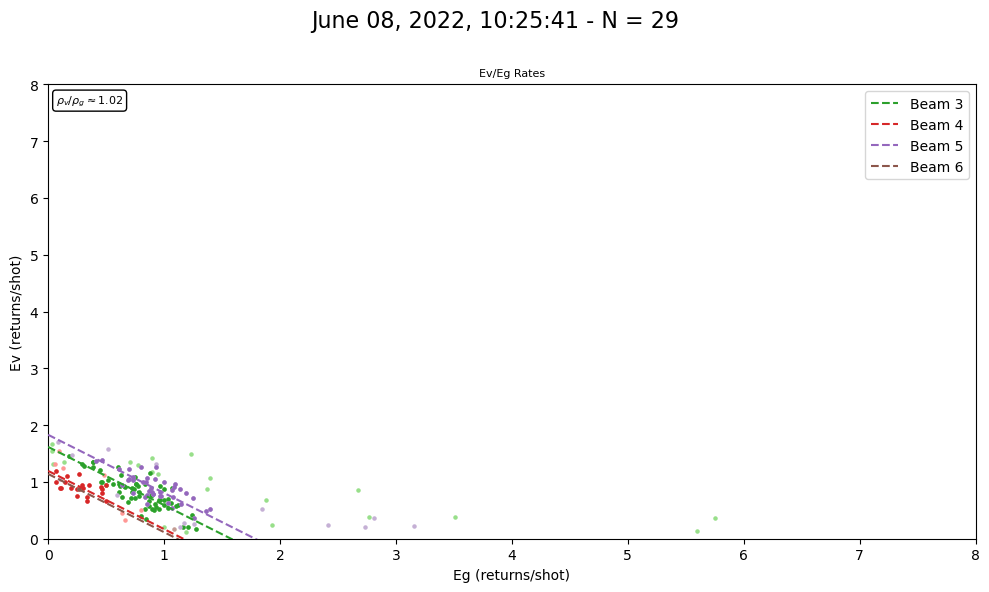

Nothing in rebinned section for sodankyla_full file 30's beam 1.
Nothing in rebinned section for sodankyla_full file 30's beam 2.
Nothing in rebinned section for sodankyla_full file 30's beam 3.
Nothing in rebinned section for sodankyla_full file 30's beam 4.


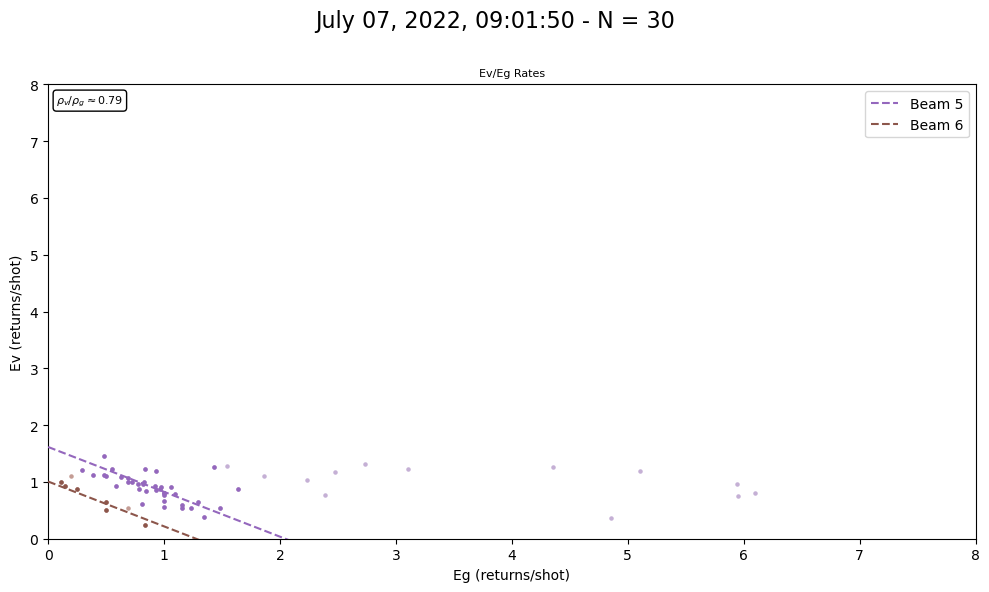

Nothing in rebinned section for sodankyla_full file 31's beam 3.
Nothing in rebinned section for sodankyla_full file 31's beam 4.
Nothing in rebinned section for sodankyla_full file 31's beam 5.
Nothing in rebinned section for sodankyla_full file 31's beam 6.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-11.803143867812604 > -48.087664610788778). You may want to try with a higher value of support_fraction (current value: 0.545).
  warnings.warn(
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-11.803143867812604 > -48.087664610788778). You may want to try with a higher value of support_fraction (current value: 0.545).
  warnings.warn(
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-11.803143867812604 > -48.087664610788778). You may want to try with a higher

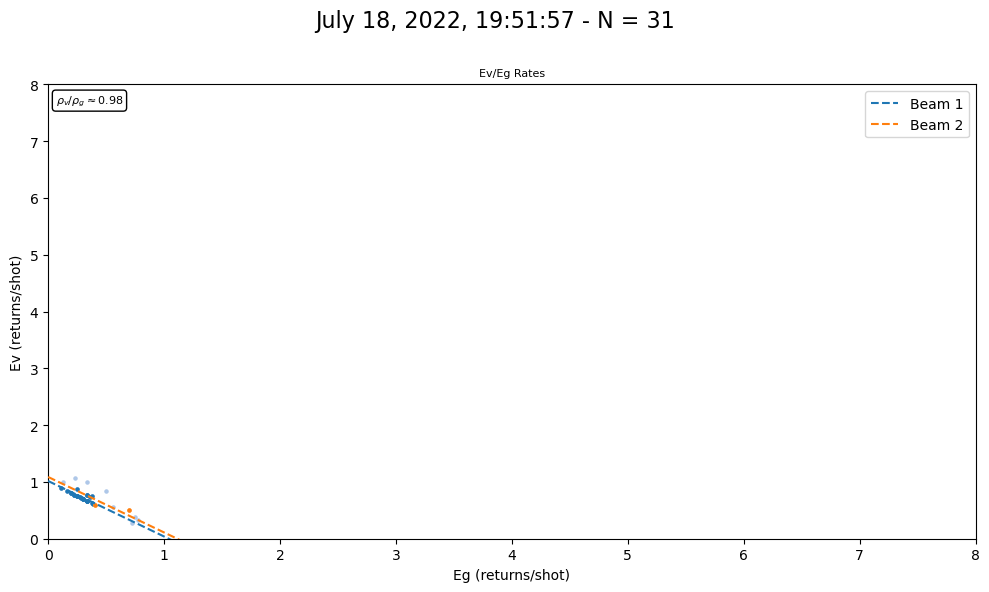

Nothing in rebinned section for sodankyla_full file 32's beam 3.
Nothing in rebinned section for sodankyla_full file 32's beam 4.
Nothing in rebinned section for sodankyla_full file 32's beam 5.
Nothing in rebinned section for sodankyla_full file 32's beam 6.
Nothing in rebinned section for sodankyla_full file 33's beam 1.
Nothing in rebinned section for sodankyla_full file 33's beam 2.
Nothing in rebinned section for sodankyla_full file 33's beam 3.
Nothing in rebinned section for sodankyla_full file 33's beam 4.


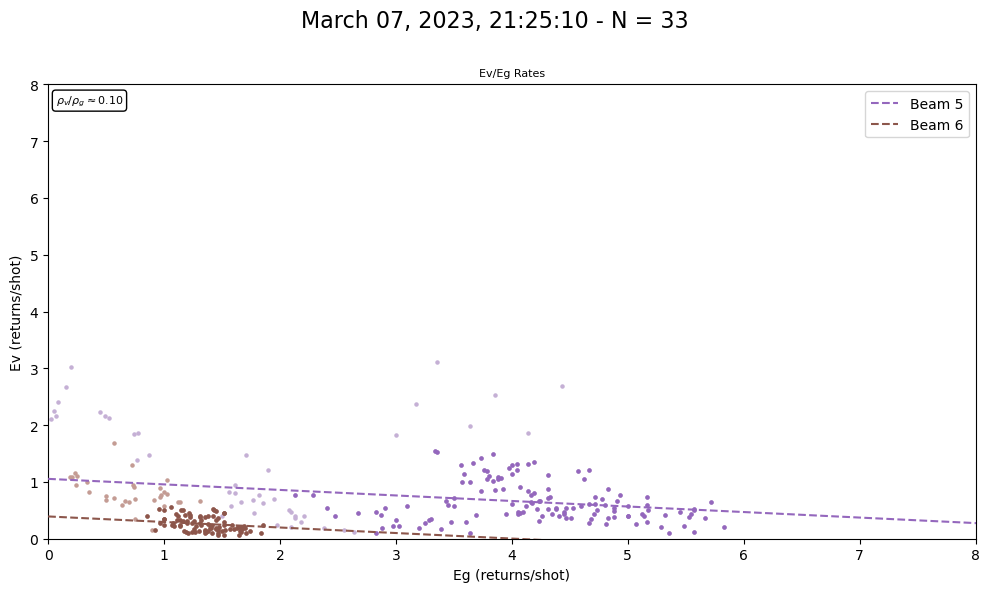

Nothing in rebinned section for sodankyla_full file 34's beam 3.
Nothing in rebinned section for sodankyla_full file 34's beam 4.
Nothing in rebinned section for sodankyla_full file 34's beam 5.
Nothing in rebinned section for sodankyla_full file 34's beam 6.


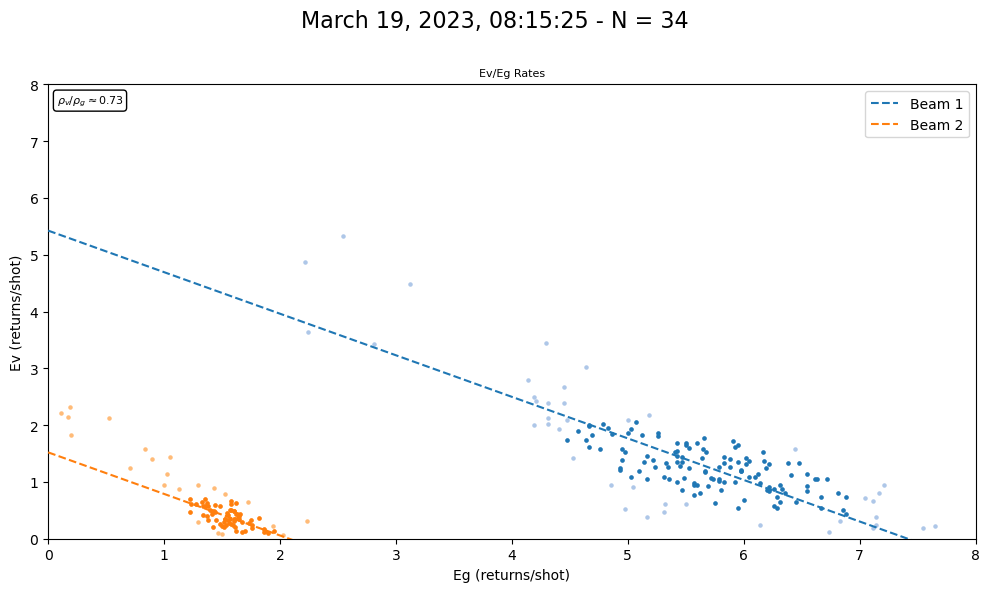

Nothing in rebinned section for sodankyla_full file 35's beam 3.
Nothing in rebinned section for sodankyla_full file 35's beam 4.
Nothing in rebinned section for sodankyla_full file 35's beam 5.
Nothing in rebinned section for sodankyla_full file 35's beam 6.


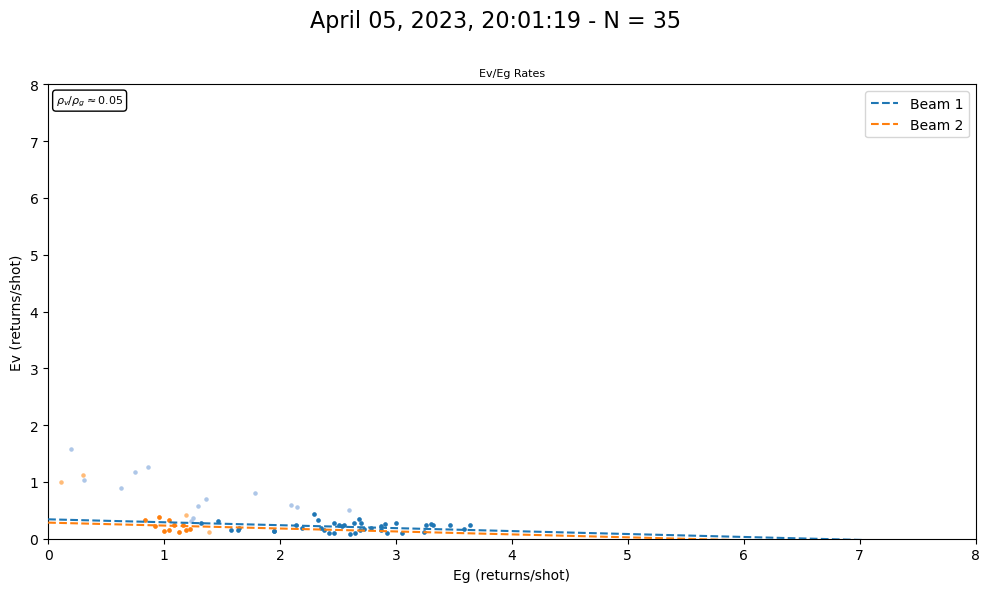

Nothing in rebinned section for sodankyla_full file 36's beam 1.
Nothing in rebinned section for sodankyla_full file 36's beam 2.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for sodankyla_full file 36's beam 4.
Nothing in rebinned section for sodankyla_full file 36's beam 5.
Nothing in rebinned section for sodankyla_full file 36's beam 6.
Nothing in rebinned section for sodankyla_full file 37's beam 1.
Nothing in rebinned section for sodankyla_full file 37's beam 2.
Nothing in rebinned section for sodankyla_full file 37's beam 3.
Nothing in rebinned section for sodankyla_full file 37's beam 4.
Nothing in rebinned section for sodankyla_full file 37's beam 5.
Nothing in rebinned section for sodankyla_full file 37's beam 6.
Nothing in rebinned section for sodankyla_full file 38's beam 1.
Nothing in rebinned section for sodankyla_full file 38's beam 2.
Nothing in rebinned section for sodankyla_full file 38's beam 5.
Nothing in rebinned section for sodankyla_full file 38's beam 6.


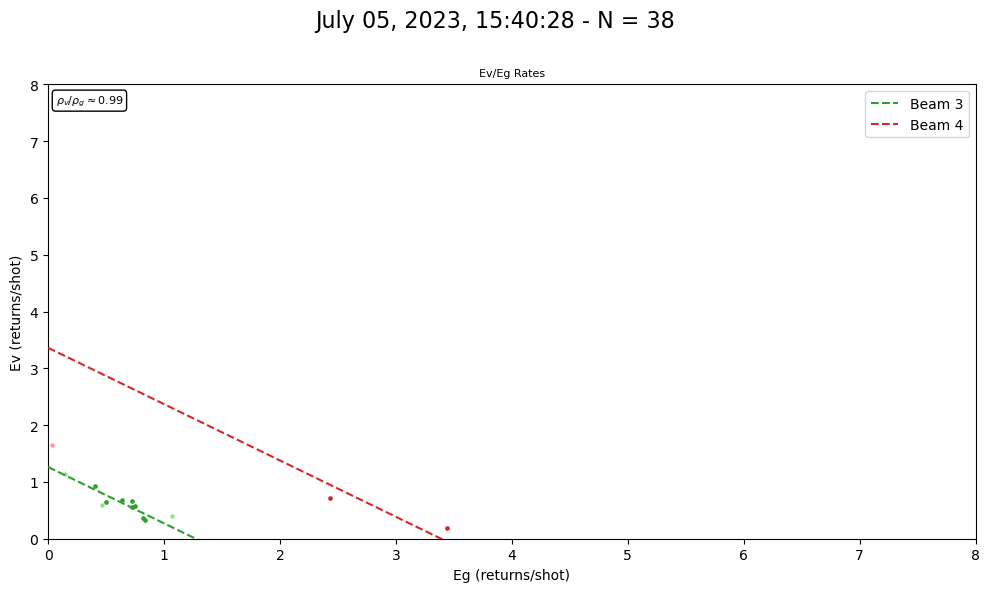

Nothing in rebinned section for sodankyla_full file 39's beam 1.
Nothing in rebinned section for sodankyla_full file 39's beam 2.
Nothing in rebinned section for sodankyla_full file 39's beam 3.
Nothing in rebinned section for sodankyla_full file 39's beam 4.


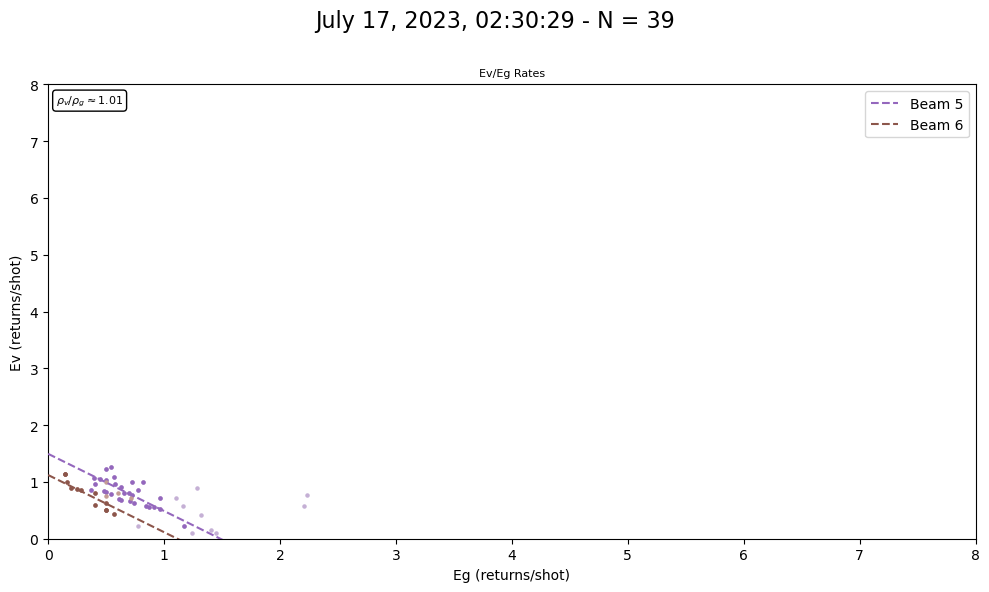

Nothing in rebinned section for sodankyla_full file 40's beam 1.
Nothing in rebinned section for sodankyla_full file 40's beam 2.
Nothing in rebinned section for sodankyla_full file 40's beam 3.
Nothing in rebinned section for sodankyla_full file 40's beam 4.
Nothing in rebinned section for sodankyla_full file 40's beam 5.
Nothing in rebinned section for sodankyla_full file 40's beam 6.
Nothing in rebinned section for sodankyla_full file 41's beam 1.
Nothing in rebinned section for sodankyla_full file 41's beam 2.
Nothing in rebinned section for sodankyla_full file 41's beam 3.
Nothing in rebinned section for sodankyla_full file 41's beam 4.
Nothing in rebinned section for sodankyla_full file 41's beam 5.
Nothing in rebinned section for sodankyla_full file 41's beam 6.
Nothing in rebinned section for sodankyla_full file 42's beam 1.
Nothing in rebinned section for sodankyla_full file 42's beam 2.


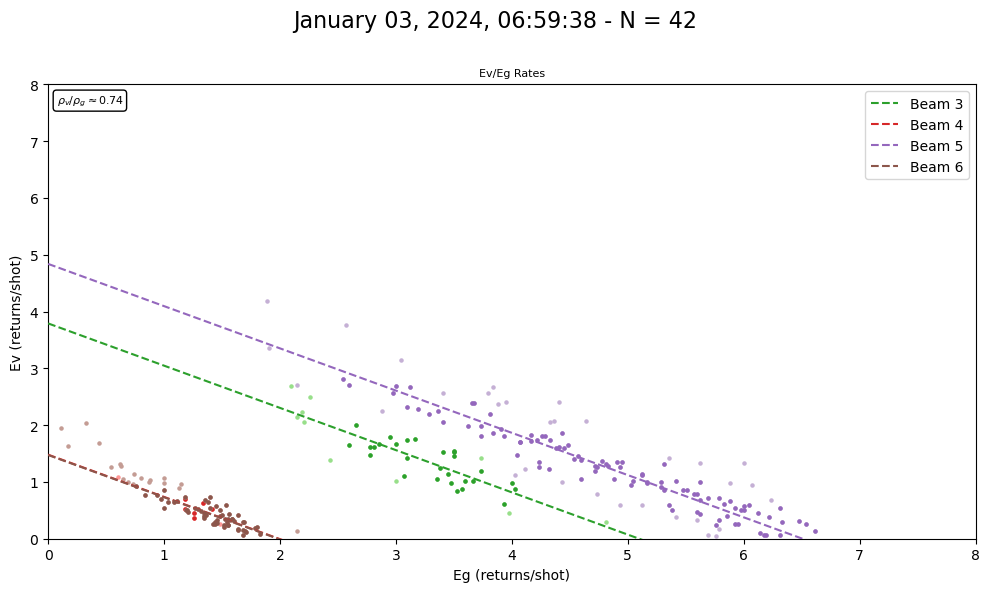

Nothing in rebinned section for sodankyla_full file 43's beam 3.
Nothing in rebinned section for sodankyla_full file 43's beam 4.
Nothing in rebinned section for sodankyla_full file 43's beam 5.
Nothing in rebinned section for sodankyla_full file 43's beam 6.


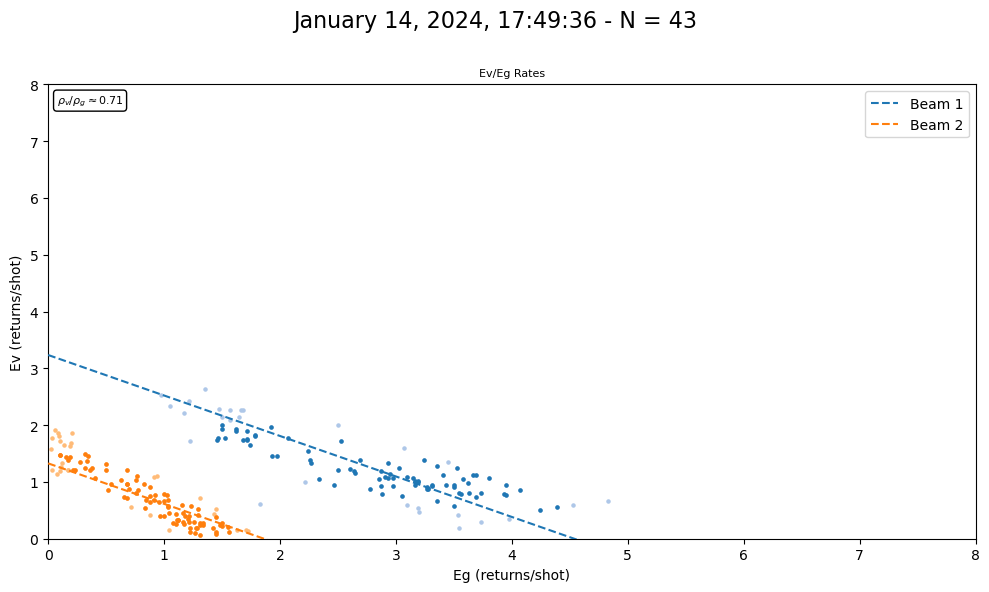

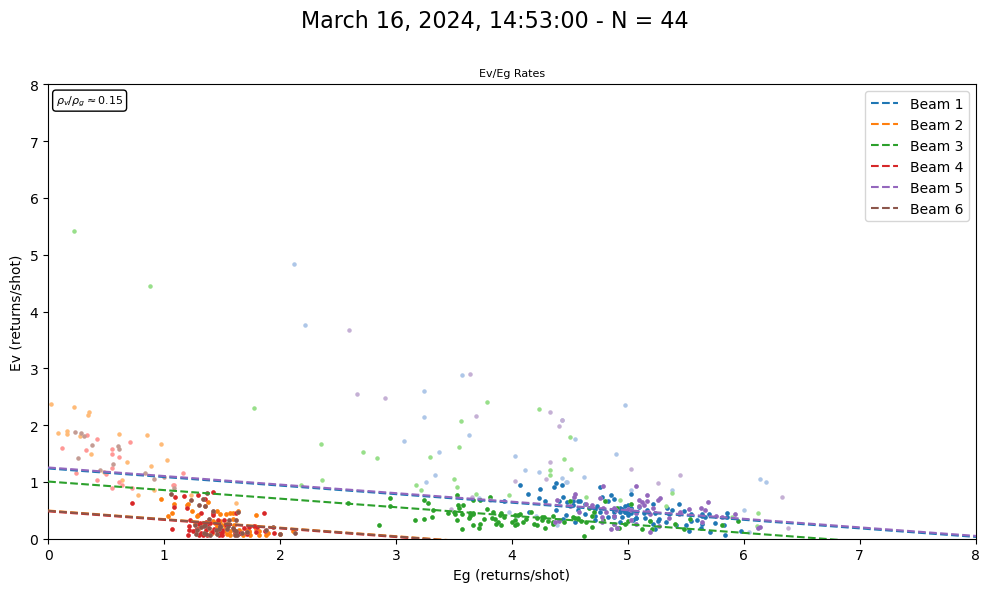

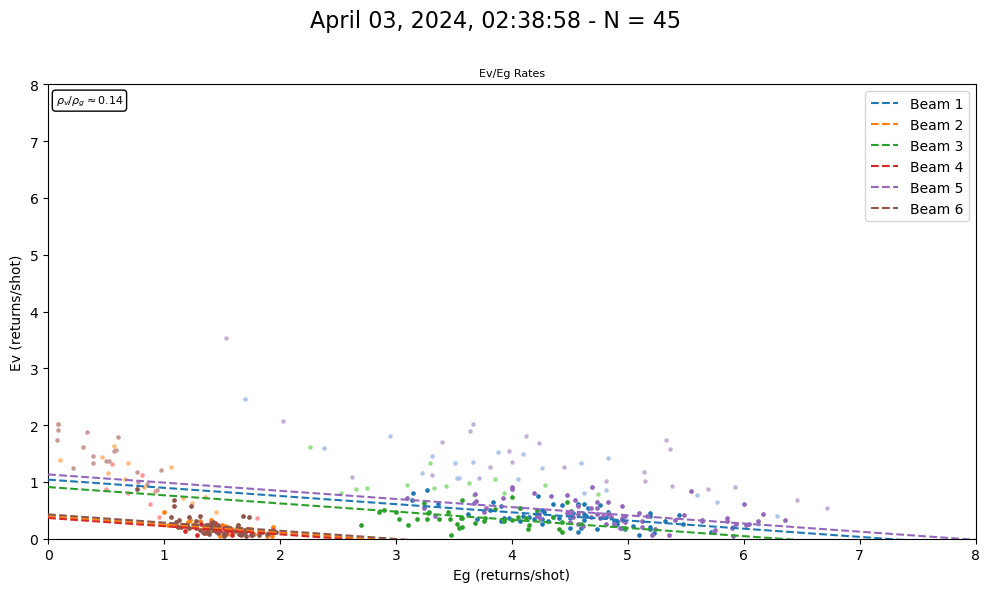

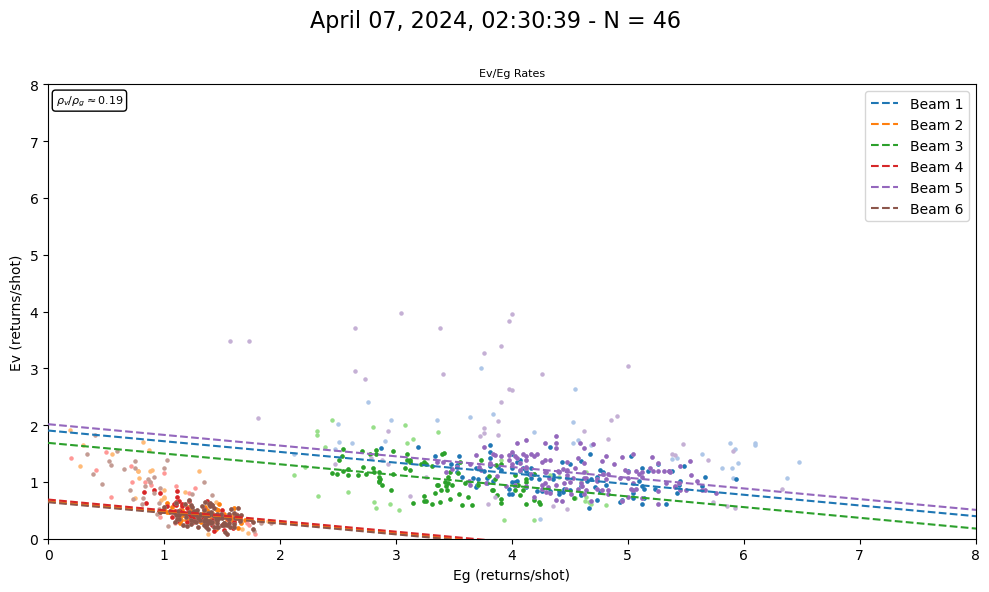

Nothing in rebinned section for sodankyla_full file 47's beam 3.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for sodankyla_full file 47's beam 5.
Nothing in rebinned section for sodankyla_full file 47's beam 6.
Nothing in rebinned section for sodankyla_full file 48's beam 1.
Nothing in rebinned section for sodankyla_full file 48's beam 2.


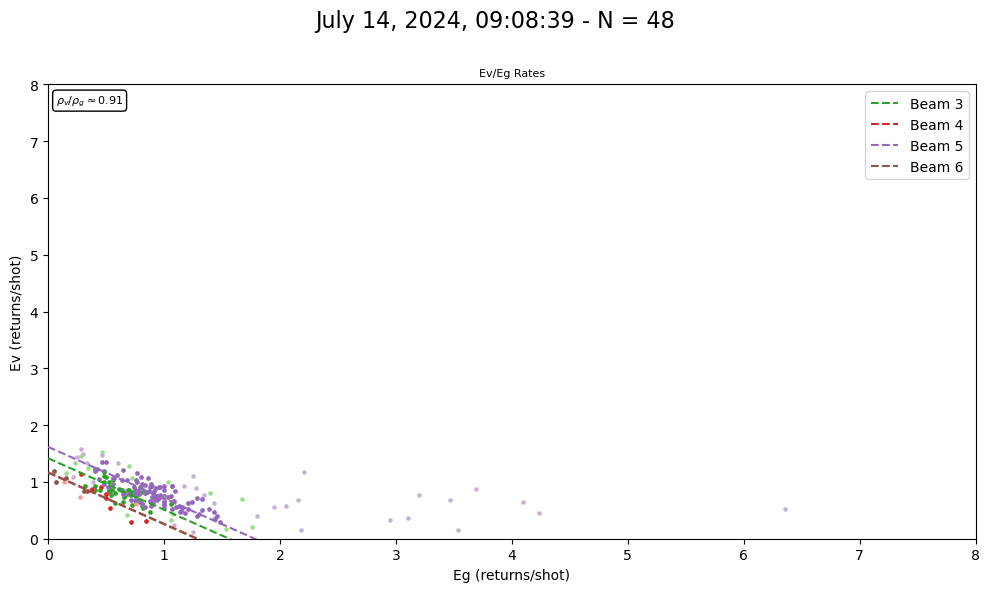

In [1]:
from scripts.parallel_blocks import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/sodankyla_full/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (26.634154, 67.361833)

for i in range(N):
# for i in [13,30,48]:
# for i in [13,30,48]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=185, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=185, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=0.25,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=185, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

# Delta Junction

Nothing in rebinned section for delta_junction file 0's beam 3.
Nothing in rebinned section for delta_junction file 0's beam 4.
Nothing in rebinned section for delta_junction file 0's beam 5.
Nothing in rebinned section for delta_junction file 0's beam 6.


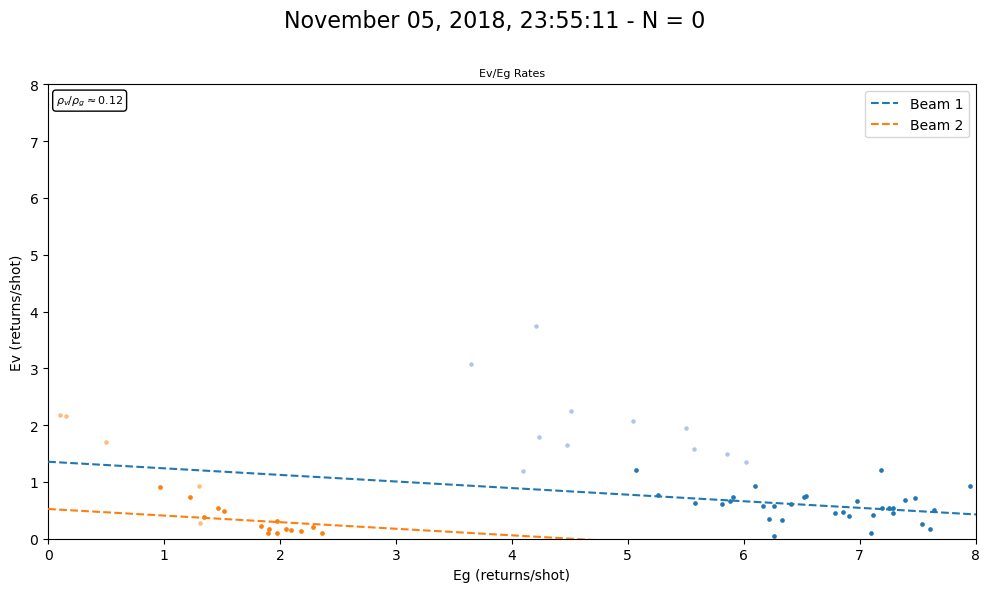

Nothing in rebinned section for delta_junction file 1's beam 5.
Nothing in rebinned section for delta_junction file 1's beam 6.


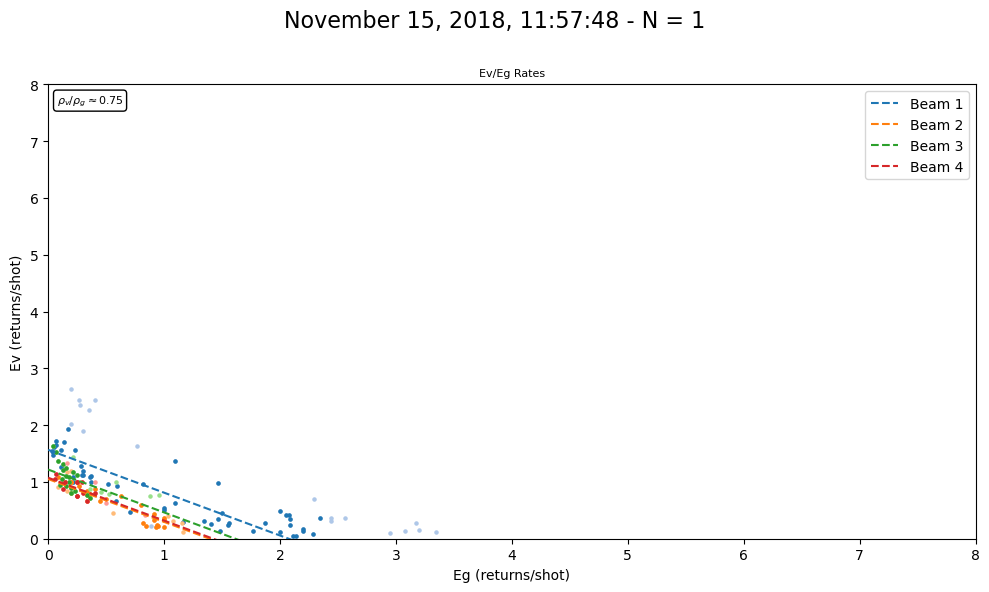

Nothing in rebinned section for delta_junction file 2's beam 1.
Nothing in rebinned section for delta_junction file 2's beam 2.


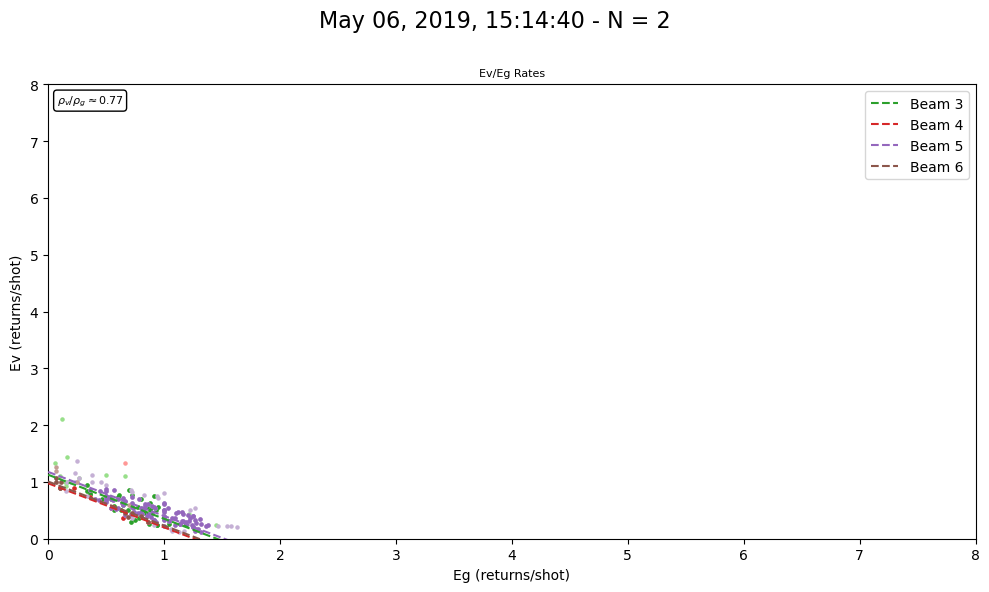

Nothing in rebinned section for delta_junction file 3's beam 1.
Nothing in rebinned section for delta_junction file 3's beam 2.


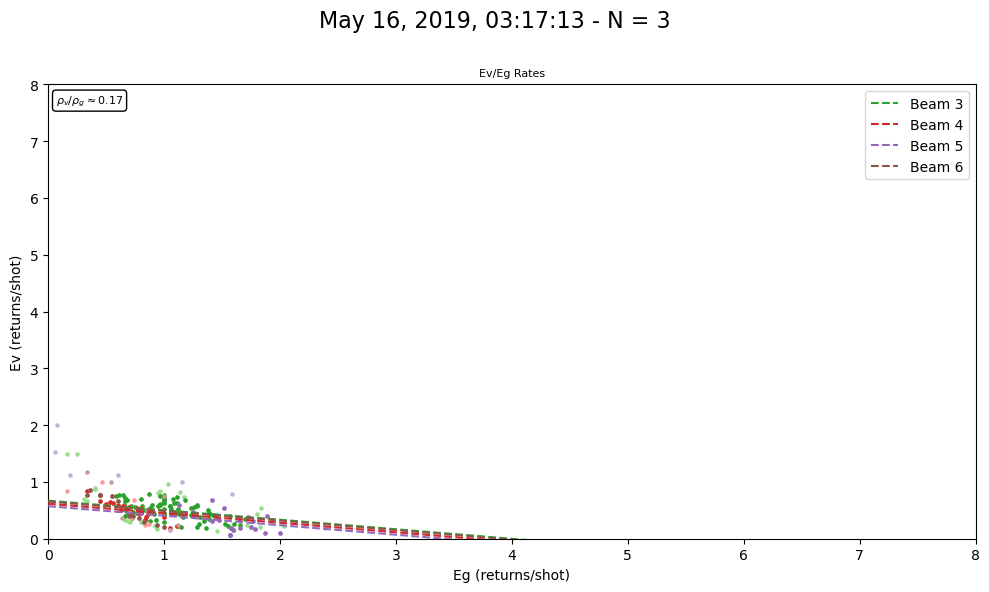

Nothing in rebinned section for delta_junction file 4's beam 1.
Nothing in rebinned section for delta_junction file 4's beam 2.
Nothing in rebinned section for delta_junction file 4's beam 3.
Nothing in rebinned section for delta_junction file 4's beam 4.


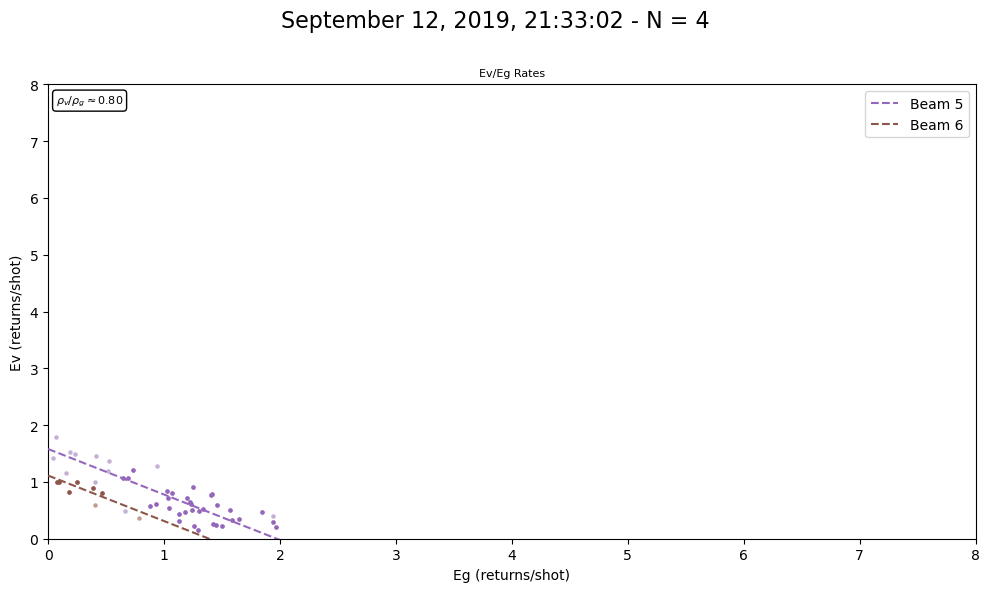

Nothing in rebinned section for delta_junction file 5's beam 1.
Nothing in rebinned section for delta_junction file 5's beam 2.
Nothing in rebinned section for delta_junction file 5's beam 3.
Nothing in rebinned section for delta_junction file 5's beam 4.
Nothing in rebinned section for delta_junction file 5's beam 6.


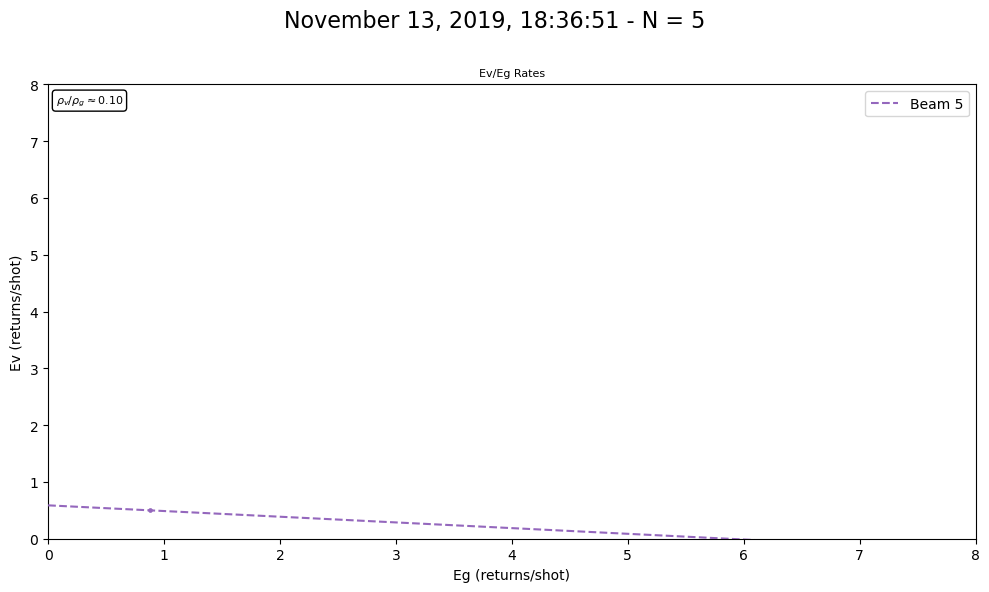

Nothing in rebinned section for delta_junction file 6's beam 1.
Nothing in rebinned section for delta_junction file 6's beam 2.
Nothing in rebinned section for delta_junction file 6's beam 3.
Nothing in rebinned section for delta_junction file 6's beam 4.


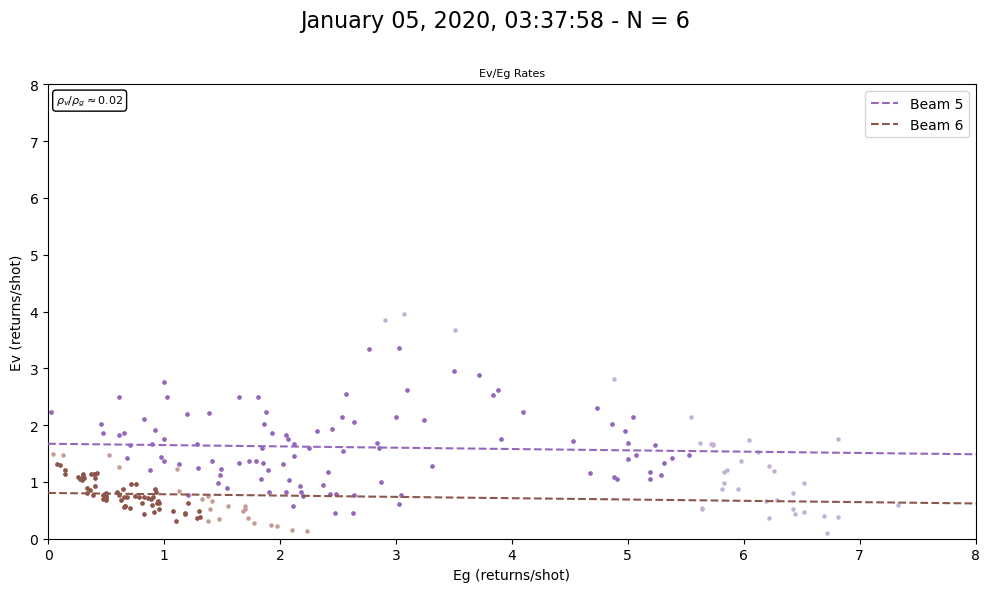

Nothing in rebinned section for delta_junction file 7's beam 1.
Nothing in rebinned section for delta_junction file 7's beam 2.
Nothing in rebinned section for delta_junction file 7's beam 3.
Nothing in rebinned section for delta_junction file 7's beam 4.
Nothing in rebinned section for delta_junction file 7's beam 5.
Nothing in rebinned section for delta_junction file 7's beam 6.


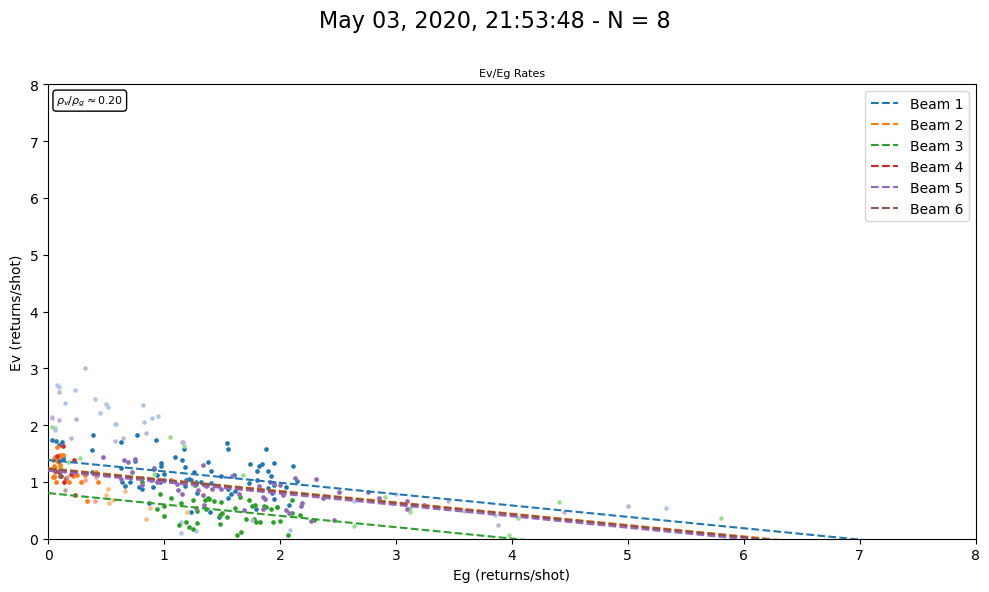

Nothing in rebinned section for delta_junction file 9's beam 1.
Nothing in rebinned section for delta_junction file 9's beam 2.


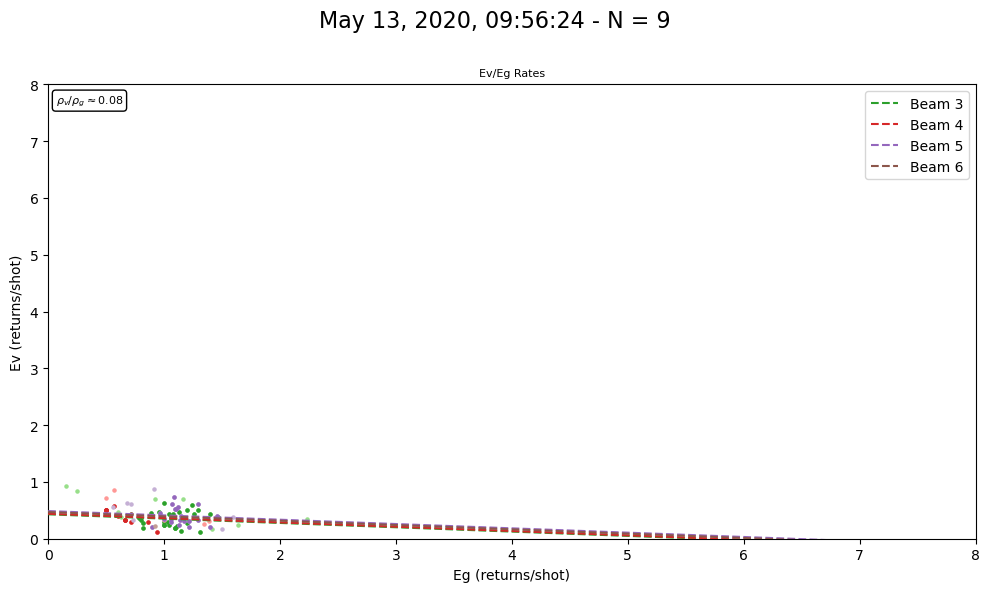

Nothing in rebinned section for delta_junction file 10's beam 3.
Nothing in rebinned section for delta_junction file 10's beam 4.
Nothing in rebinned section for delta_junction file 10's beam 5.
Nothing in rebinned section for delta_junction file 10's beam 6.


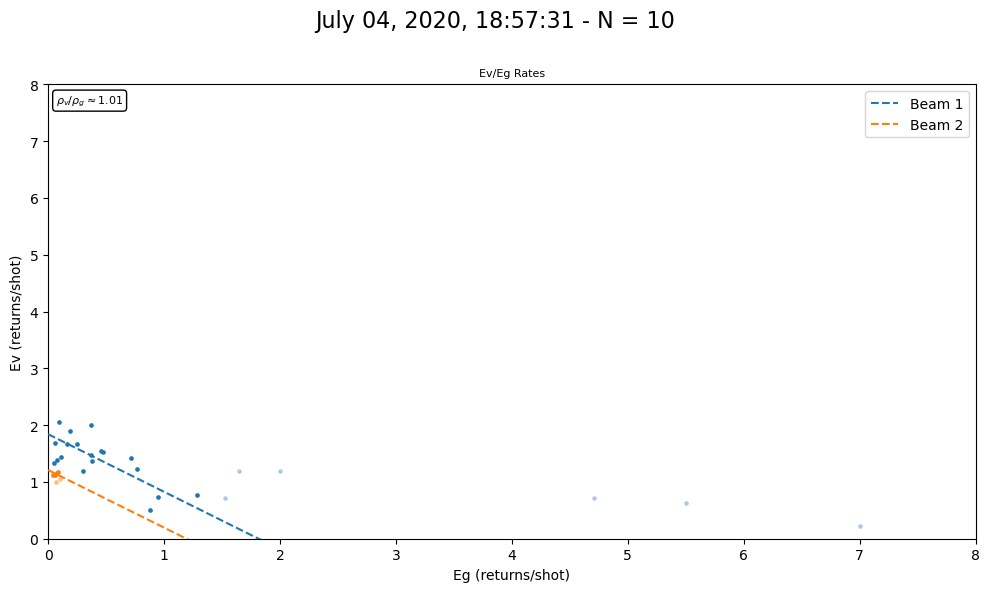

Nothing in rebinned section for delta_junction file 11's beam 1.
Nothing in rebinned section for delta_junction file 11's beam 2.


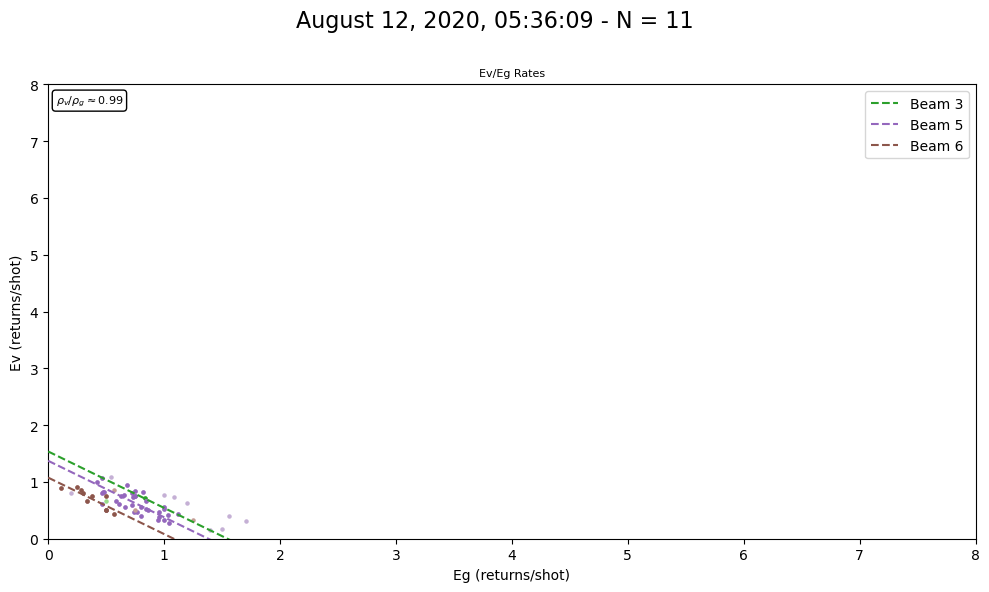

Nothing in rebinned section for delta_junction file 12's beam 1.
Nothing in rebinned section for delta_junction file 12's beam 2.
Nothing in rebinned section for delta_junction file 12's beam 5.
Nothing in rebinned section for delta_junction file 12's beam 6.


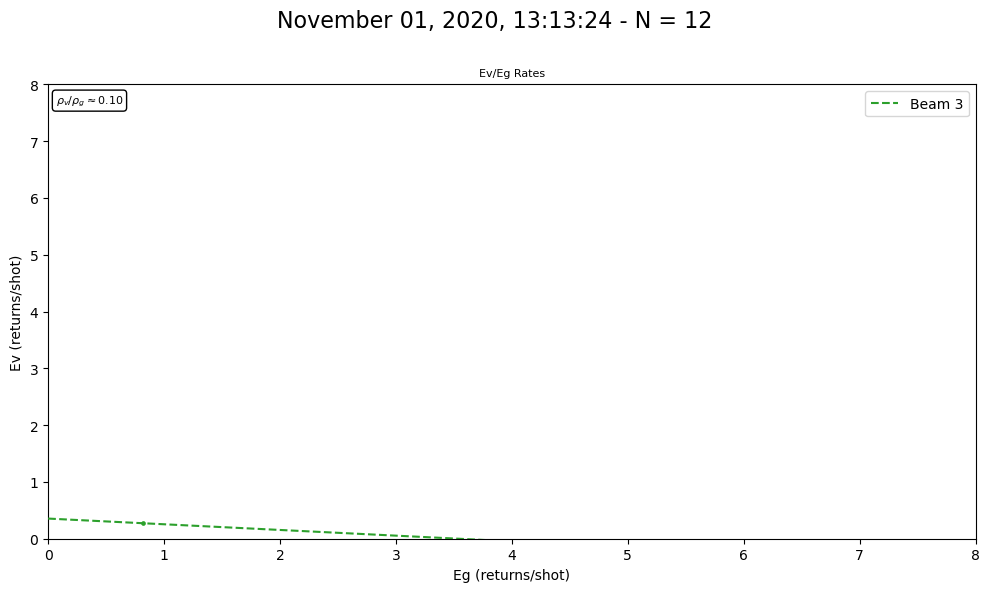

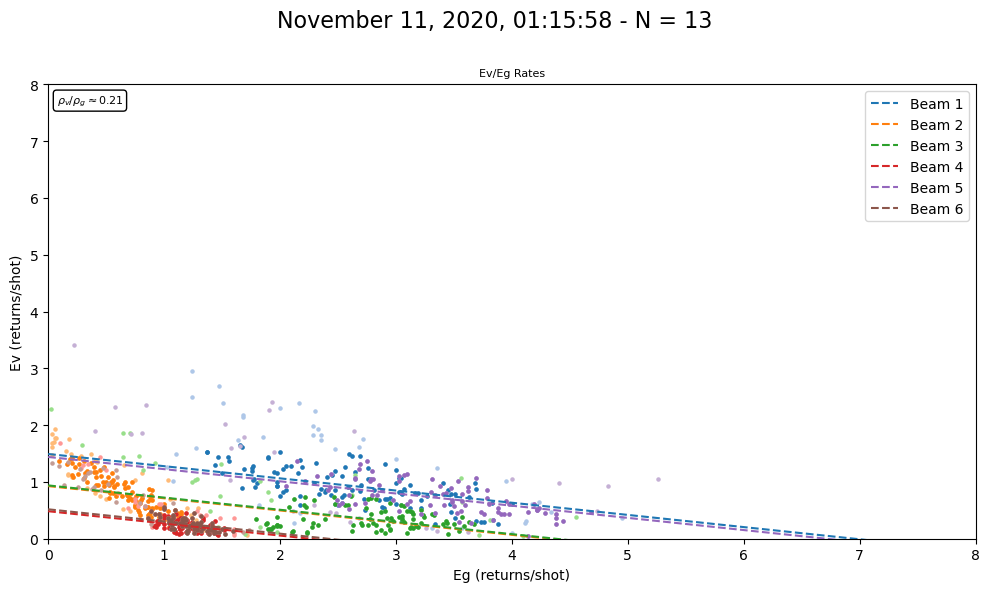

Nothing in rebinned section for delta_junction file 14's beam 5.
Nothing in rebinned section for delta_junction file 14's beam 6.


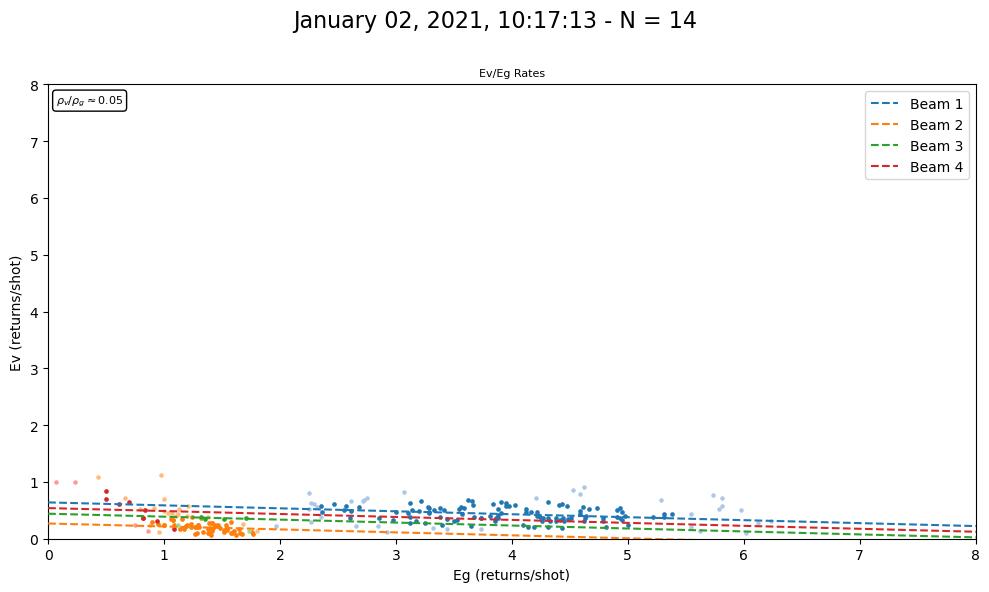

Nothing in rebinned section for delta_junction file 15's beam 3.
Nothing in rebinned section for delta_junction file 15's beam 4.
Nothing in rebinned section for delta_junction file 15's beam 5.
Nothing in rebinned section for delta_junction file 15's beam 6.


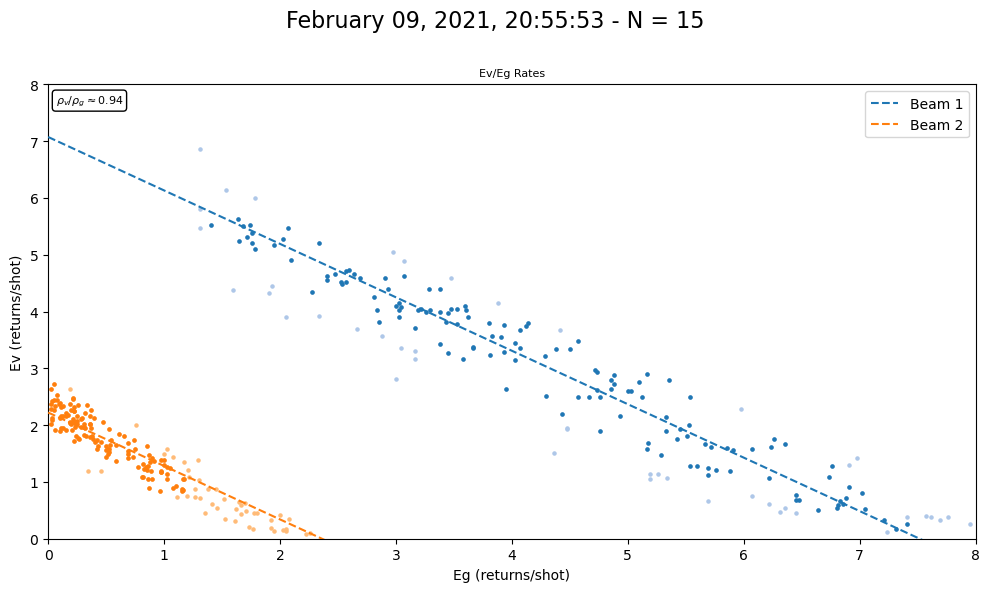

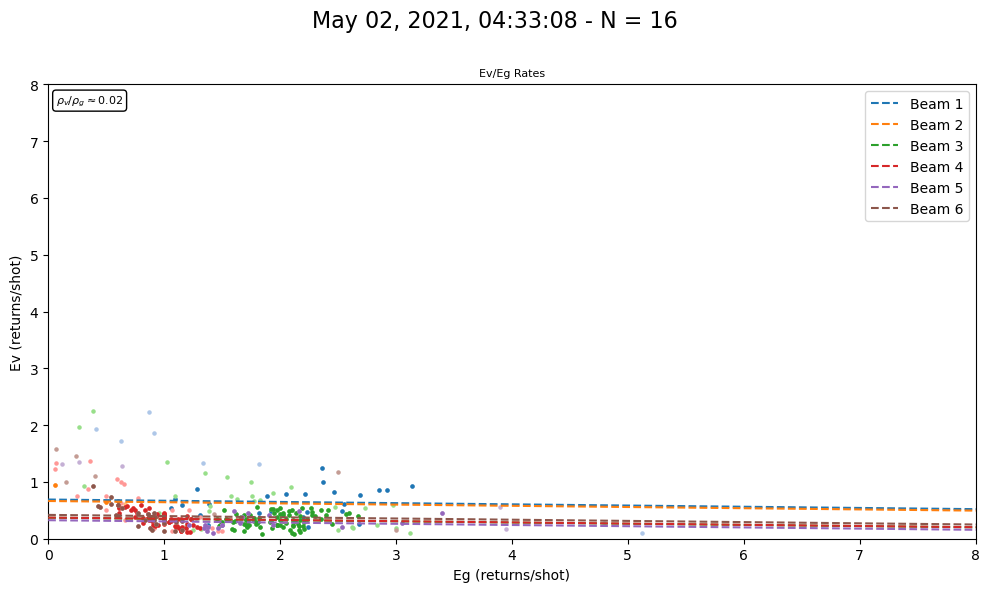

Nothing in rebinned section for delta_junction file 17's beam 1.
Nothing in rebinned section for delta_junction file 17's beam 2.
Nothing in rebinned section for delta_junction file 17's beam 3.
Nothing in rebinned section for delta_junction file 17's beam 4.
Nothing in rebinned section for delta_junction file 17's beam 6.
Nothing in rebinned section for delta_junction file 18's beam 5.
Nothing in rebinned section for delta_junction file 18's beam 6.


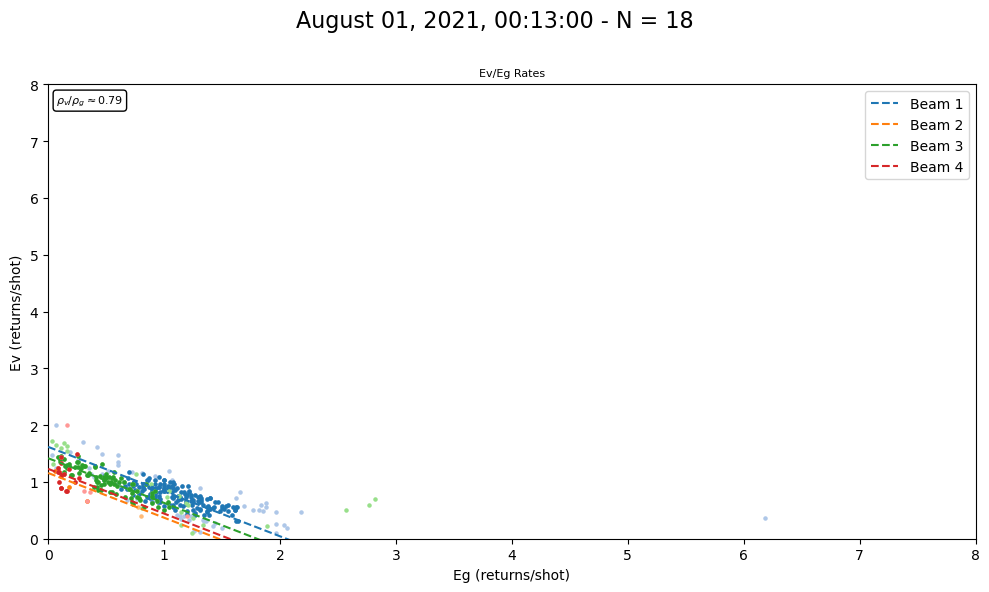

Nothing in rebinned section for delta_junction file 19's beam 5.
Nothing in rebinned section for delta_junction file 19's beam 6.


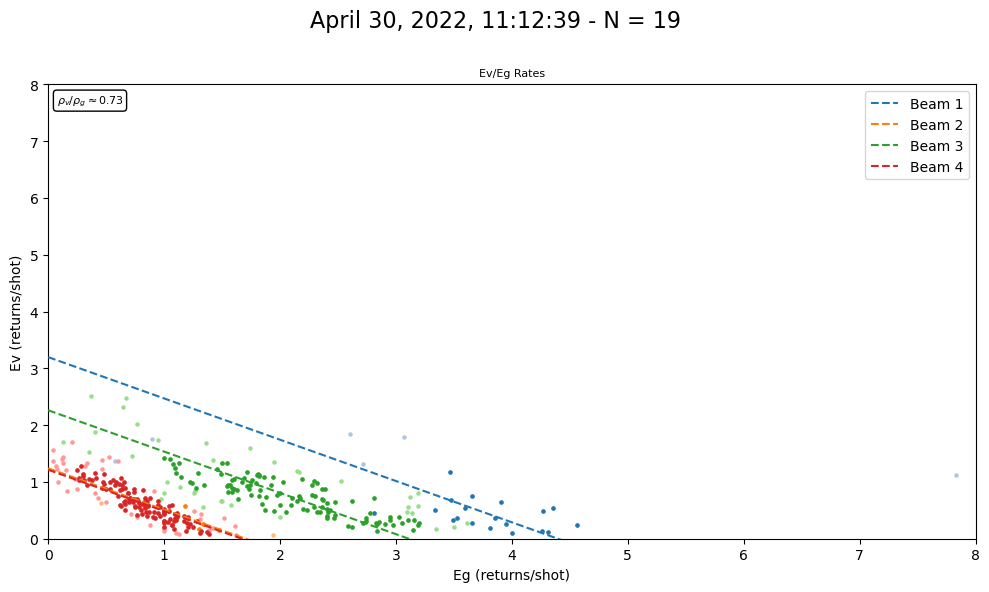

Nothing in rebinned section for delta_junction file 20's beam 3.
Nothing in rebinned section for delta_junction file 20's beam 5.
Nothing in rebinned section for delta_junction file 20's beam 6.


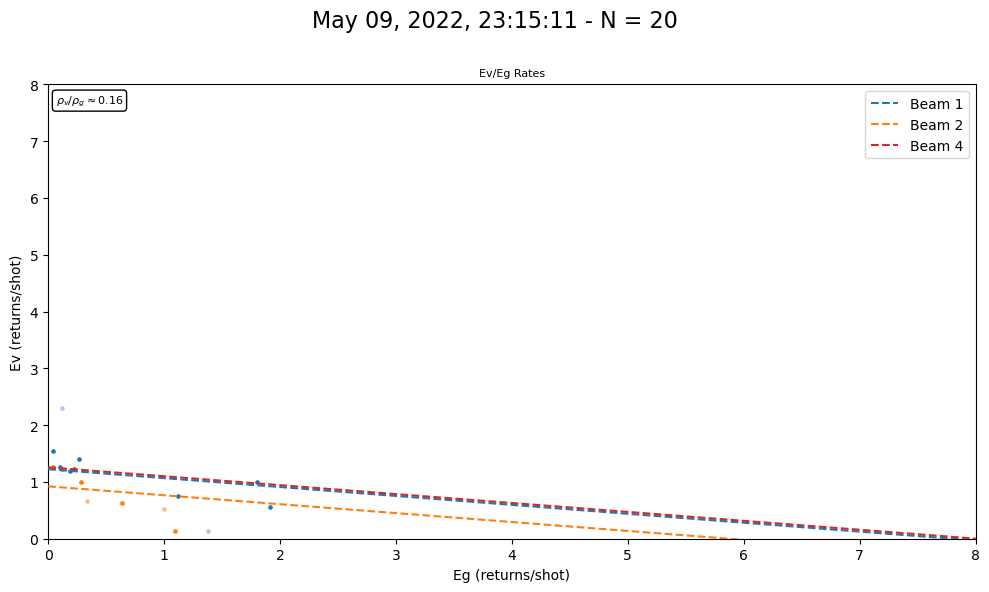

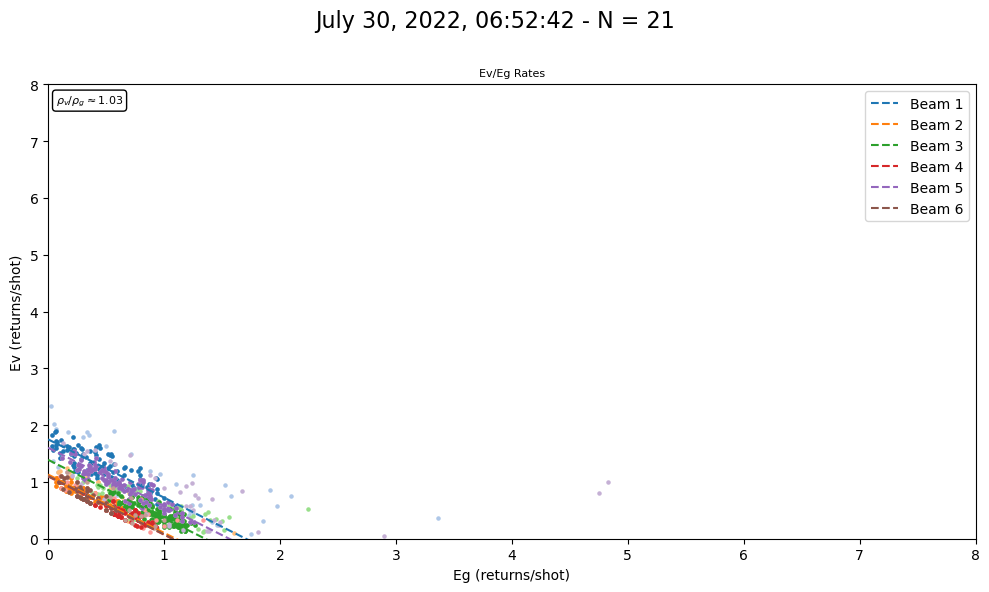

Nothing in rebinned section for delta_junction file 22's beam 3.
Nothing in rebinned section for delta_junction file 22's beam 4.
Nothing in rebinned section for delta_junction file 22's beam 5.
Nothing in rebinned section for delta_junction file 22's beam 6.


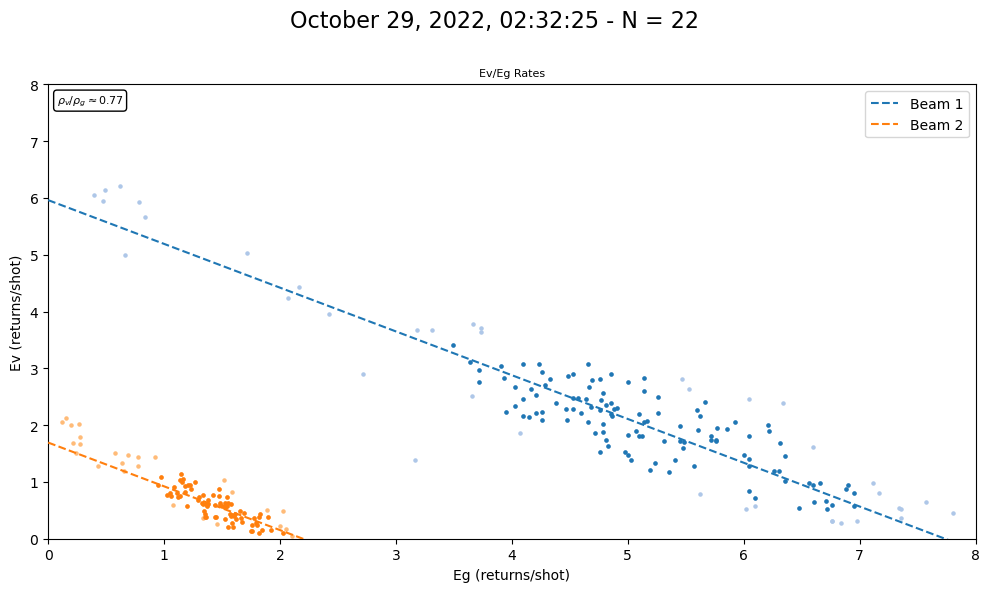

Nothing in rebinned section for delta_junction file 23's beam 5.
Nothing in rebinned section for delta_junction file 23's beam 6.


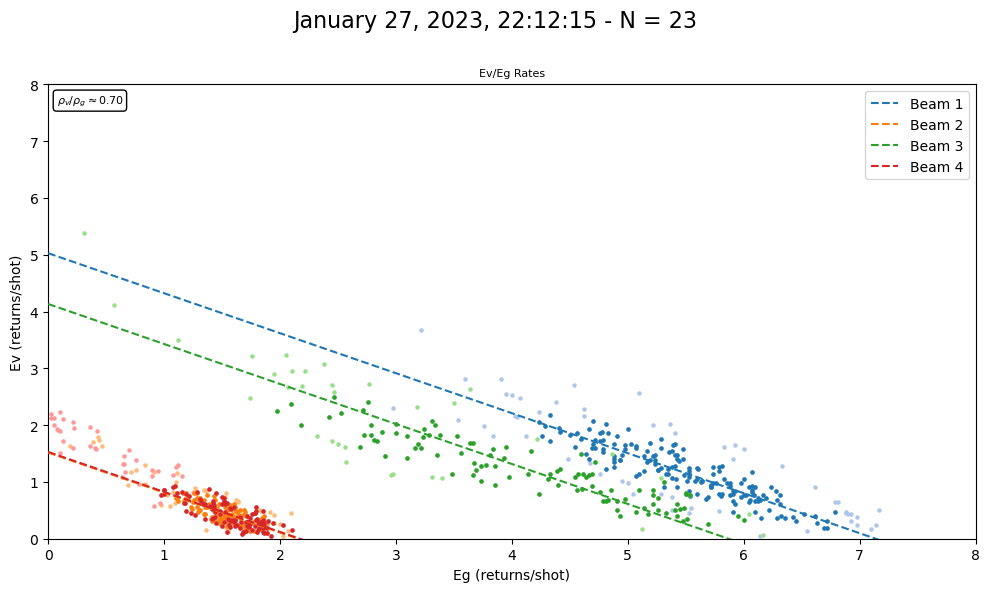

Nothing in rebinned section for delta_junction file 24's beam 5.
Nothing in rebinned section for delta_junction file 24's beam 6.


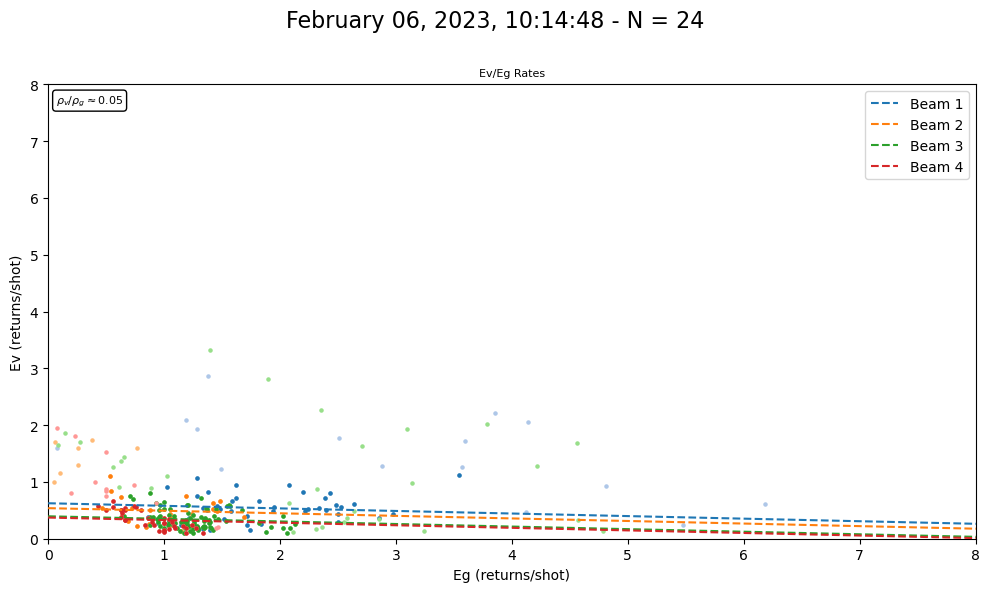

Nothing in rebinned section for delta_junction file 25's beam 1.
Nothing in rebinned section for delta_junction file 25's beam 2.


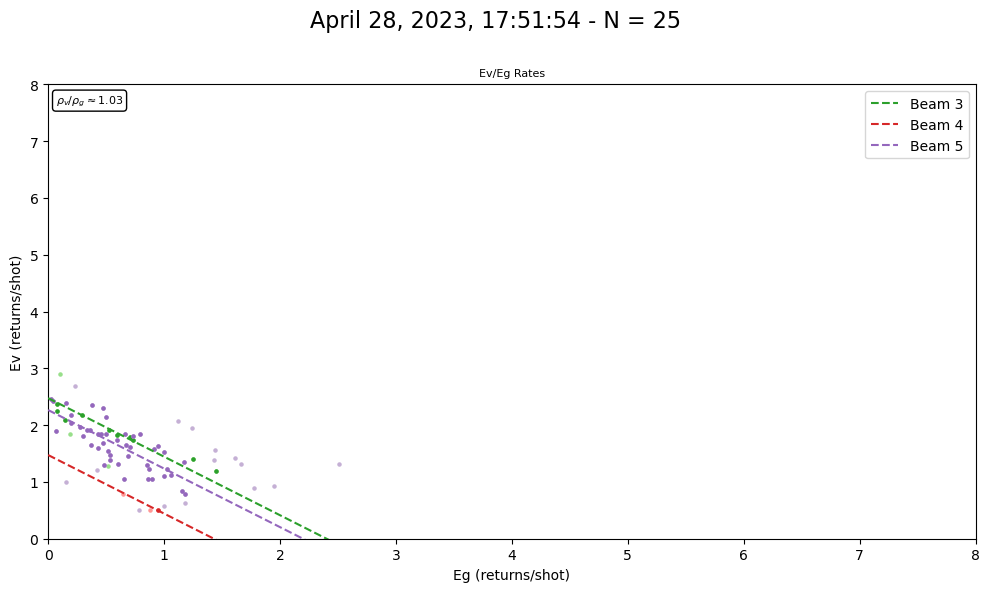

Nothing in rebinned section for delta_junction file 26's beam 5.


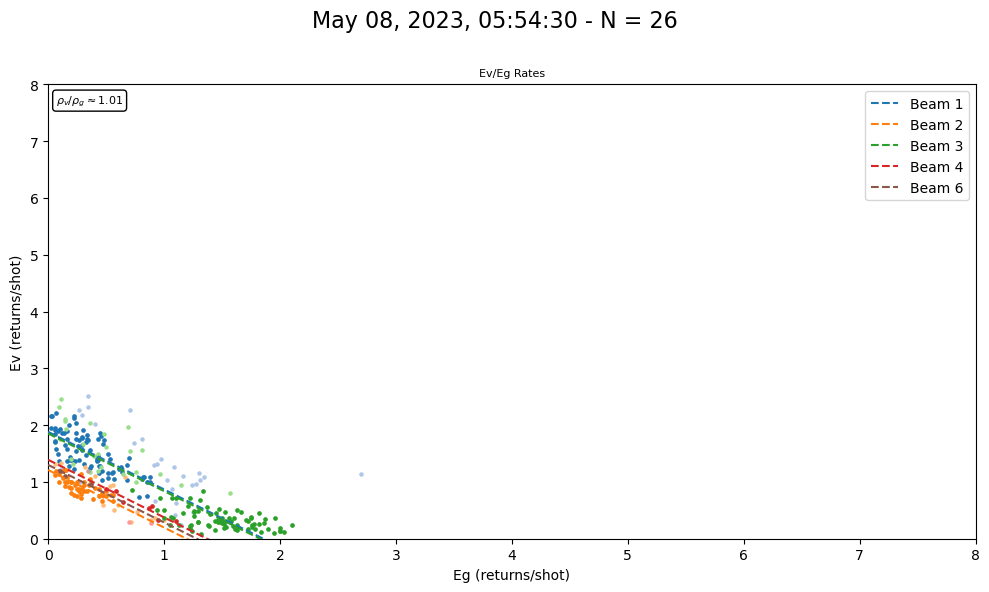

Nothing in rebinned section for delta_junction file 27's beam 1.
Nothing in rebinned section for delta_junction file 27's beam 2.
Nothing in rebinned section for delta_junction file 27's beam 3.
Nothing in rebinned section for delta_junction file 27's beam 4.


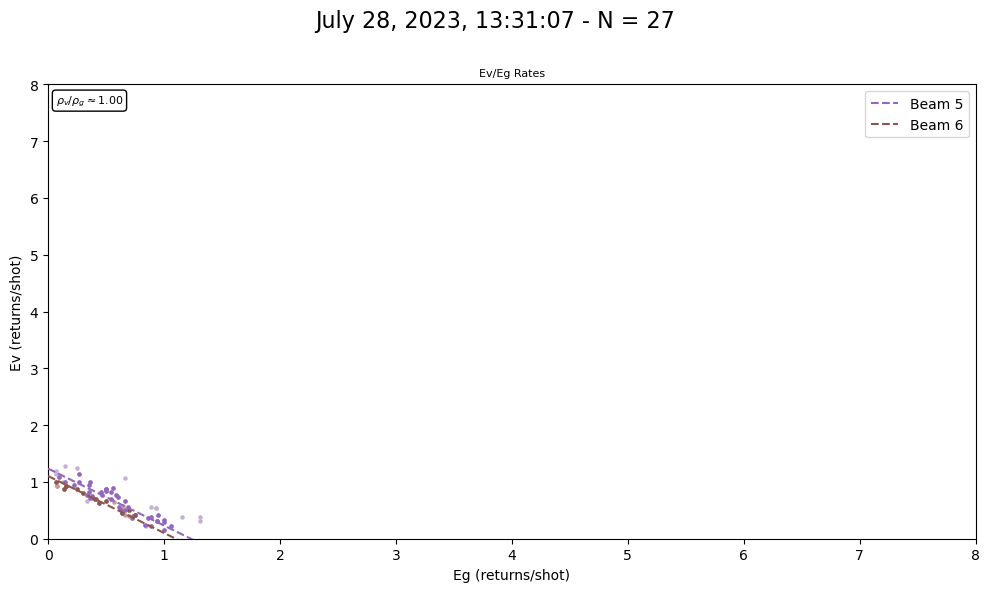

Nothing in rebinned section for delta_junction file 28's beam 1.
Nothing in rebinned section for delta_junction file 28's beam 2.


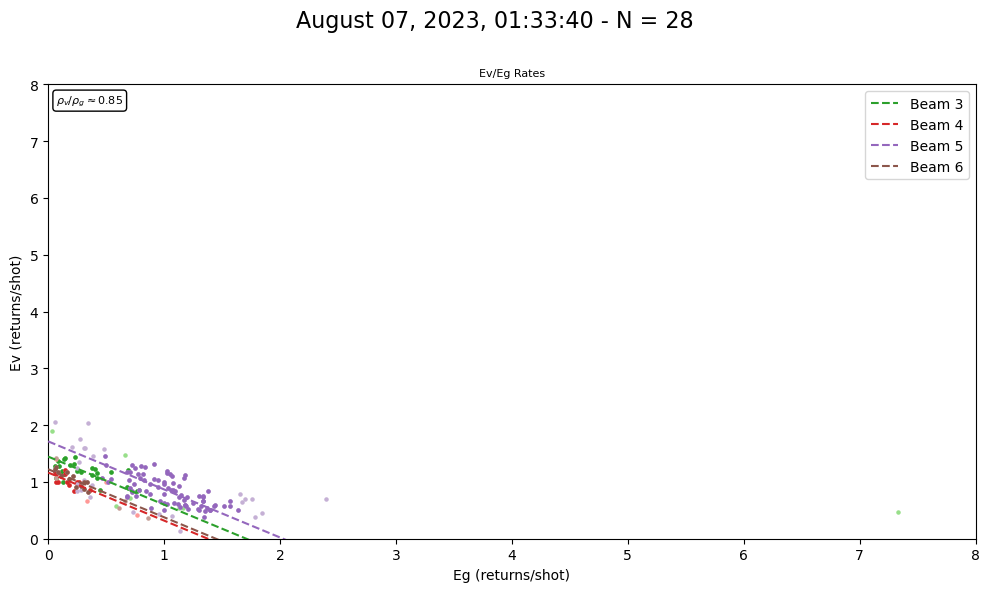

Nothing in rebinned section for delta_junction file 29's beam 1.
Nothing in rebinned section for delta_junction file 29's beam 2.
Nothing in rebinned section for delta_junction file 29's beam 3.
Nothing in rebinned section for delta_junction file 29's beam 4.
Nothing in rebinned section for delta_junction file 29's beam 5.
Nothing in rebinned section for delta_junction file 29's beam 6.
Nothing in rebinned section for delta_junction file 30's beam 1.
Nothing in rebinned section for delta_junction file 30's beam 2.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for delta_junction file 30's beam 4.


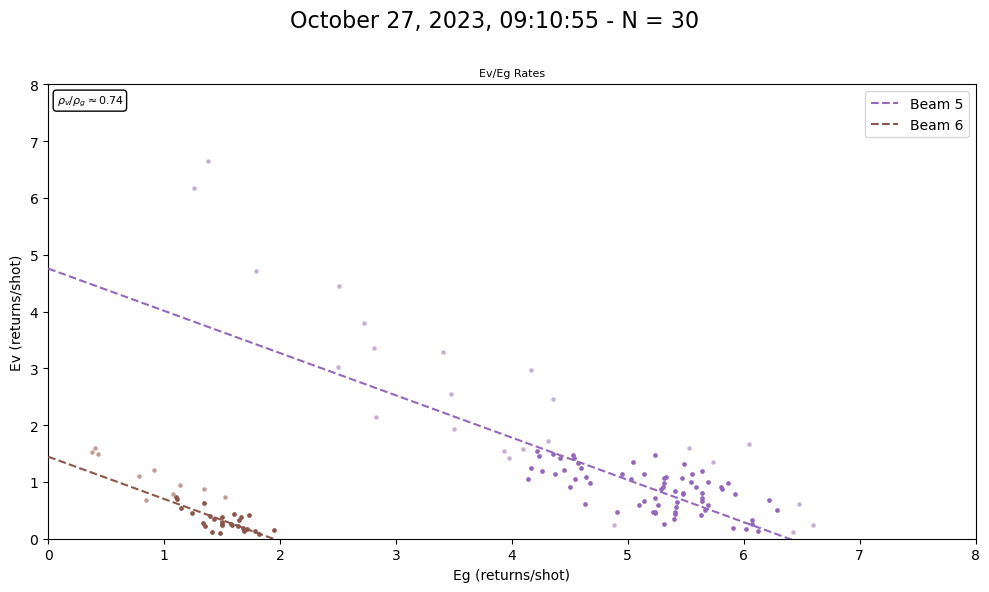

Nothing in rebinned section for delta_junction file 31's beam 5.
Nothing in rebinned section for delta_junction file 31's beam 6.


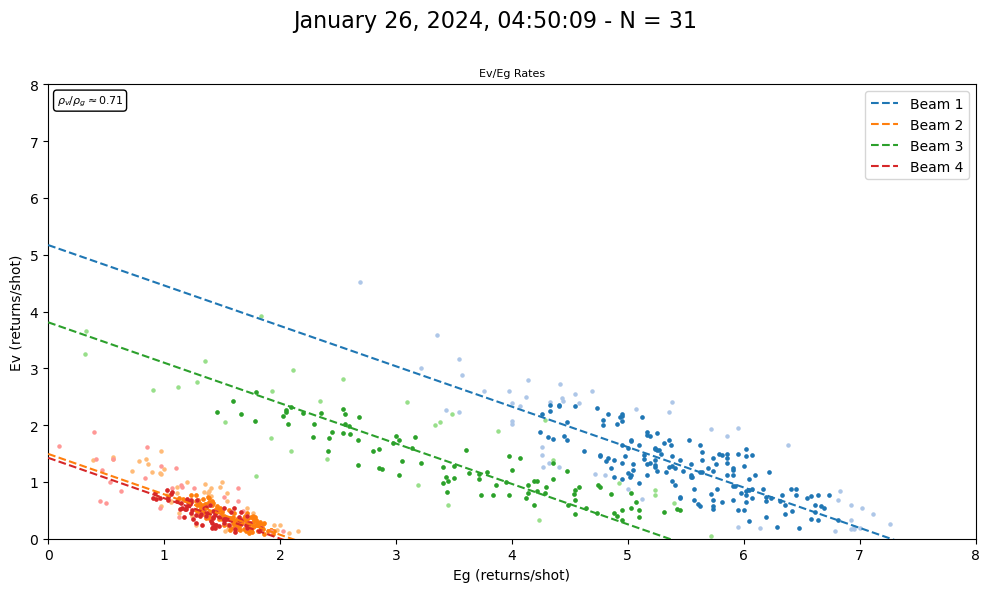

Nothing in rebinned section for delta_junction file 32's beam 5.
Nothing in rebinned section for delta_junction file 32's beam 6.


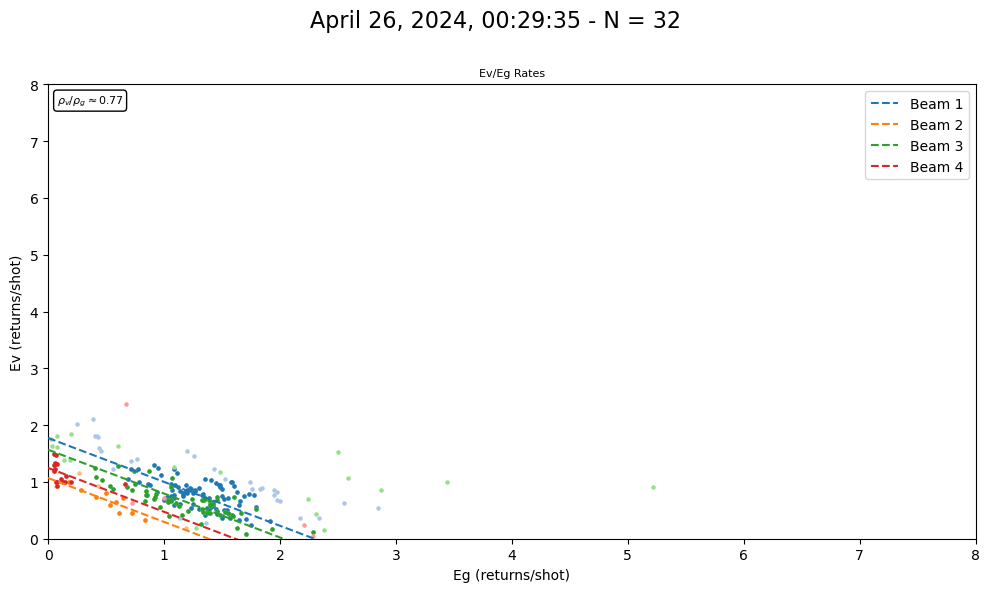

Nothing in rebinned section for delta_junction file 33's beam 1.
Nothing in rebinned section for delta_junction file 33's beam 2.
Nothing in rebinned section for delta_junction file 33's beam 4.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

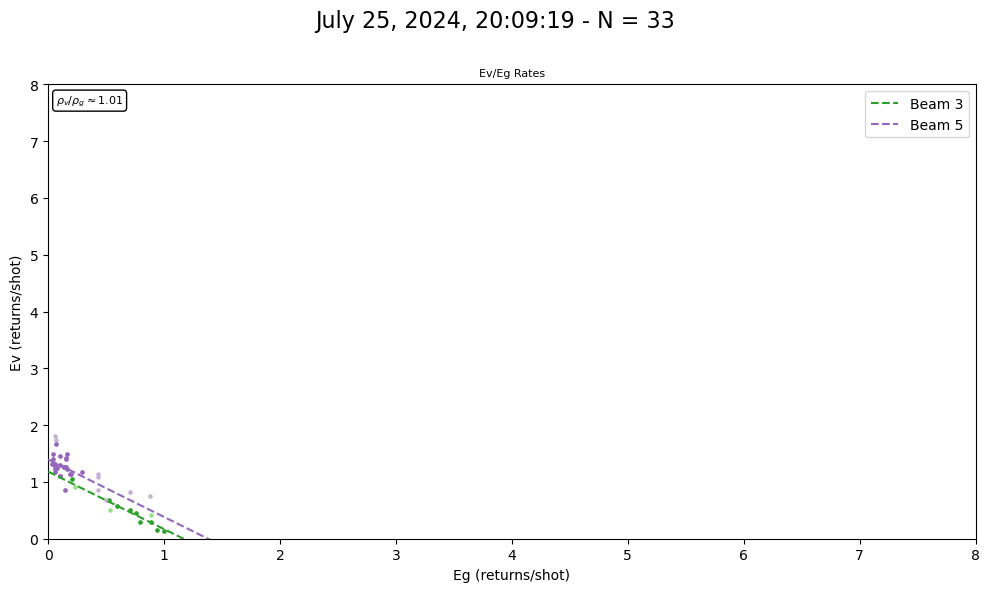

In [2]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/delta_junction/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-145.7514, 63.8811)

for i in range(N):
# for i in [5]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=504, threshold=1, graph_detail=1)

    # BLOCKS
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
    #                      altitude=504, threshold=1, small_box=8, graph_detail=1, loss='linear', rebinned=0, f_scale=.05,\
    #                      outlier_removal=2,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
    #                      altitude=504, threshold=1, small_box=8.05, graph_detail=2, loss='linear', rebinned=0, f_scale=.05,\
    #                      outlier_removal=2,method='bimodal')
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=504, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,
                         outlier_removal=.25, method='bimodal')

# Marcell MN

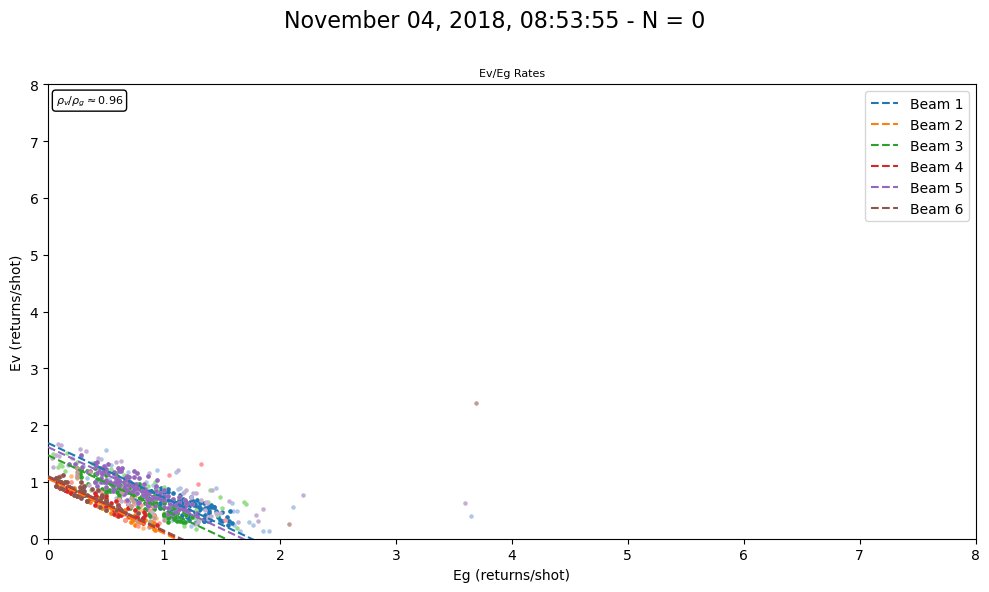

Nothing in rebinned section for marcell_MN file 1's beam 1.
Nothing in rebinned section for marcell_MN file 1's beam 2.
Nothing in rebinned section for marcell_MN file 1's beam 3.
Nothing in rebinned section for marcell_MN file 1's beam 4.


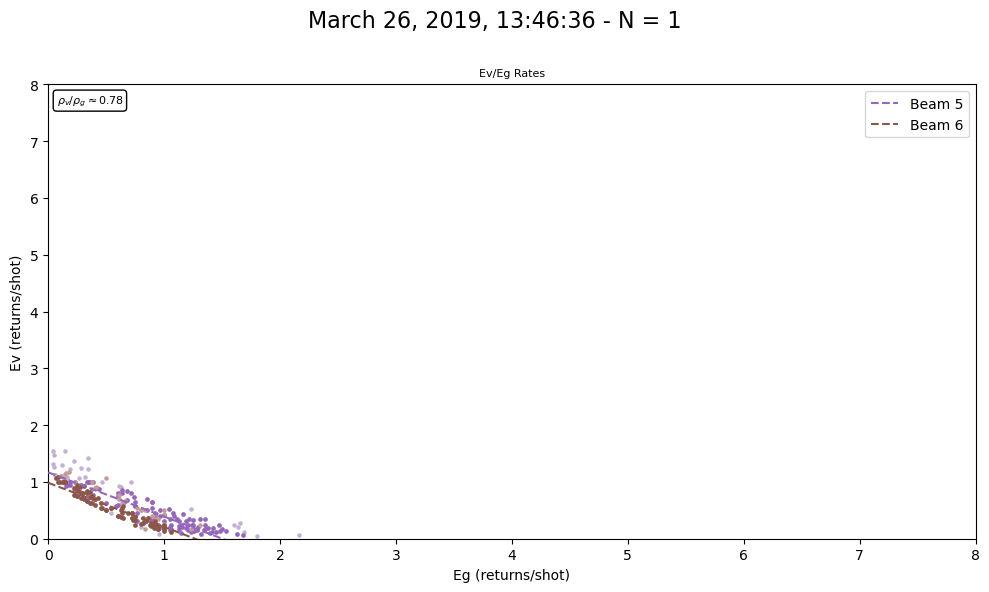

Nothing in rebinned section for marcell_MN file 2's beam 1.
Nothing in rebinned section for marcell_MN file 2's beam 2.
Nothing in rebinned section for marcell_MN file 2's beam 3.
Nothing in rebinned section for marcell_MN file 2's beam 4.


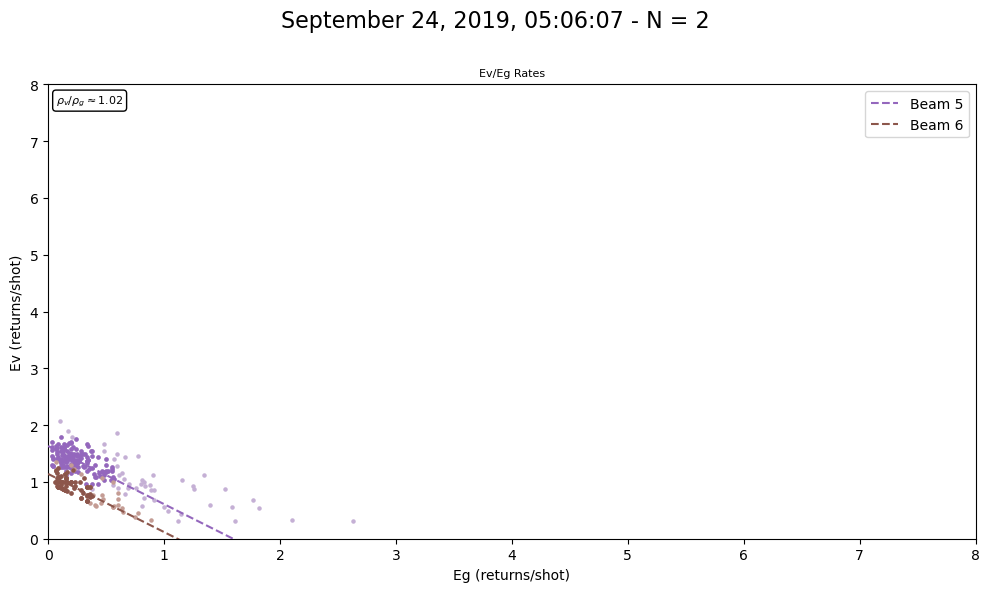

Nothing in rebinned section for marcell_MN file 3's beam 1.
Nothing in rebinned section for marcell_MN file 3's beam 2.
Nothing in rebinned section for marcell_MN file 3's beam 3.
Nothing in rebinned section for marcell_MN file 3's beam 4.


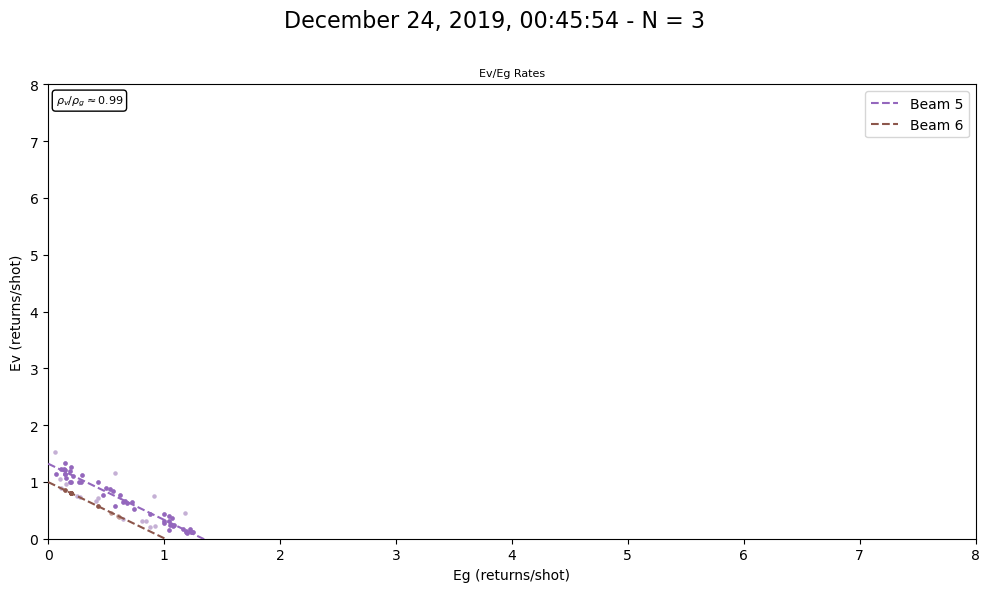

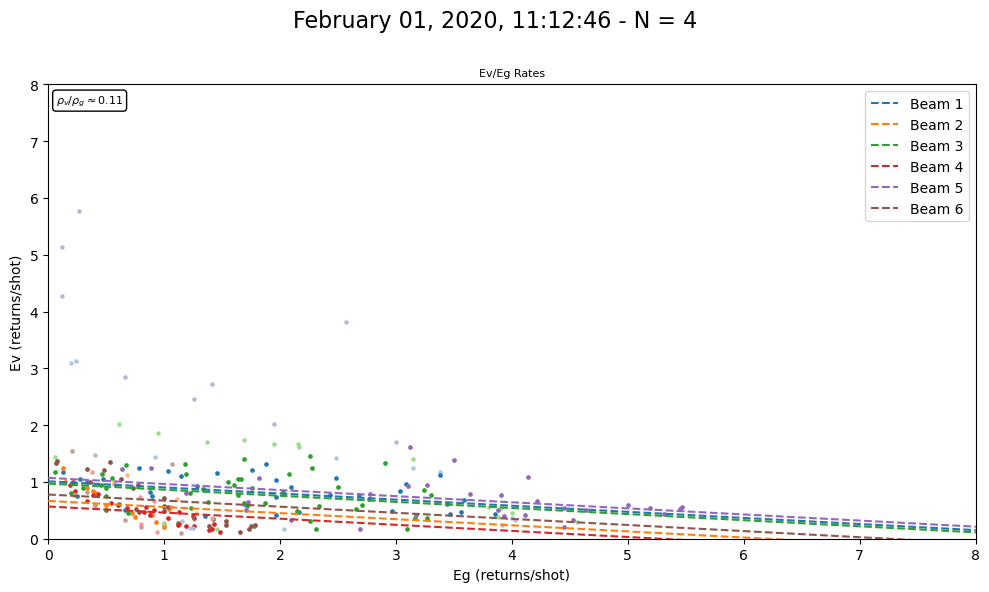

Nothing in rebinned section for marcell_MN file 5's beam 1.
Nothing in rebinned section for marcell_MN file 5's beam 2.
Nothing in rebinned section for marcell_MN file 5's beam 3.
Nothing in rebinned section for marcell_MN file 5's beam 4.


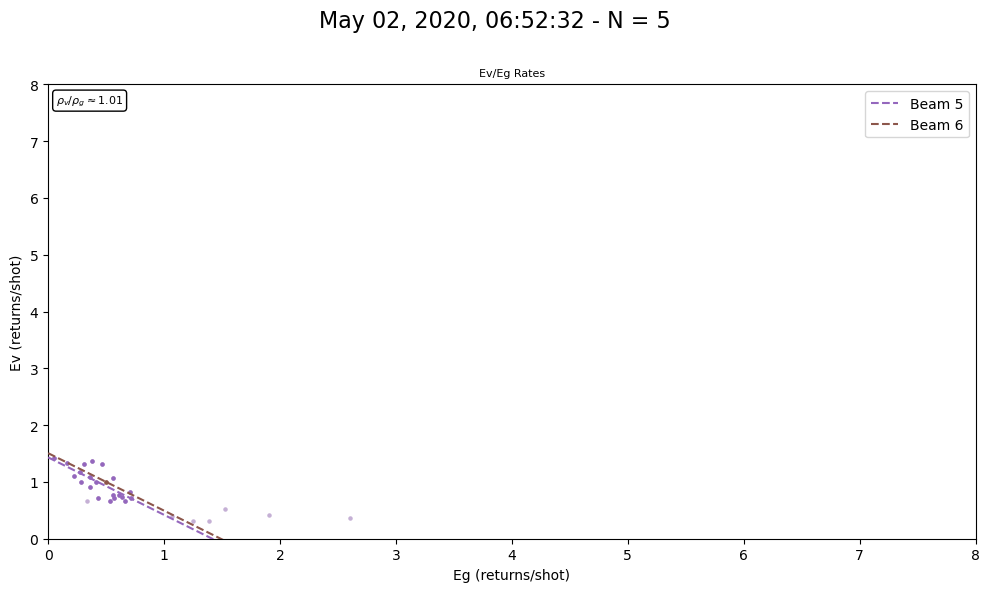

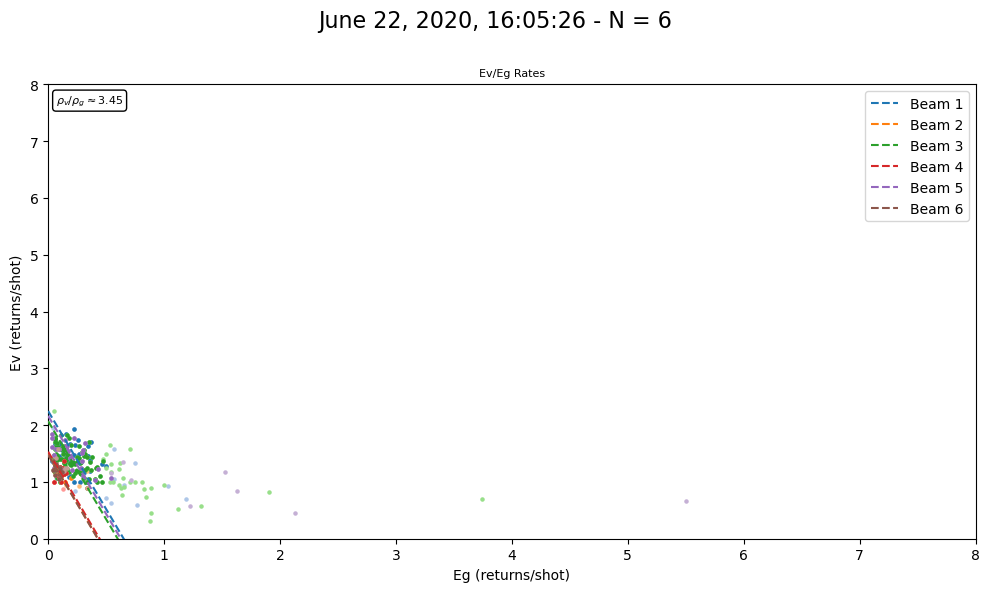

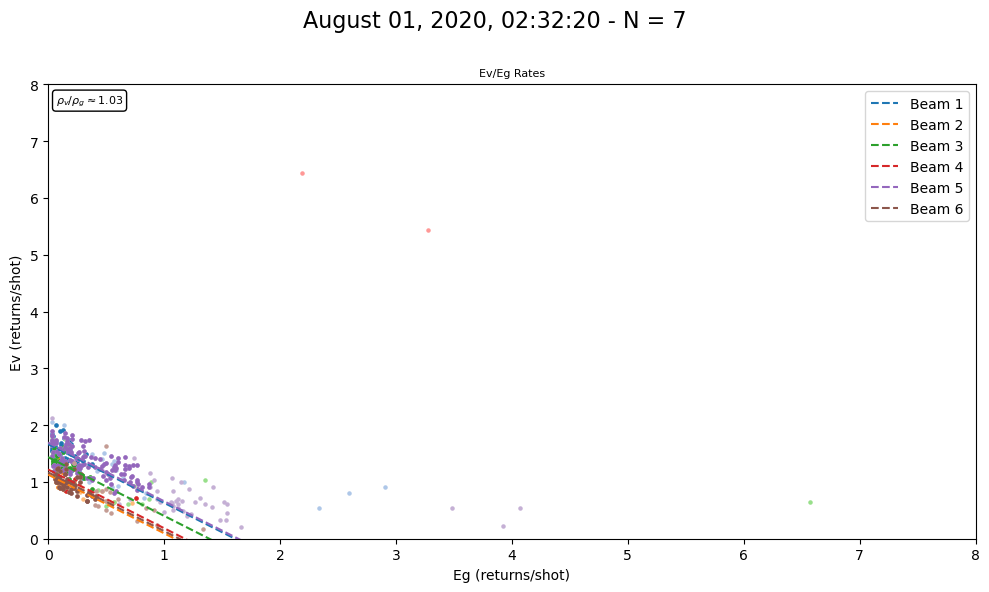

Nothing in rebinned section for marcell_MN file 8's beam 1.
Nothing in rebinned section for marcell_MN file 8's beam 2.
Nothing in rebinned section for marcell_MN file 8's beam 3.
Nothing in rebinned section for marcell_MN file 8's beam 4.


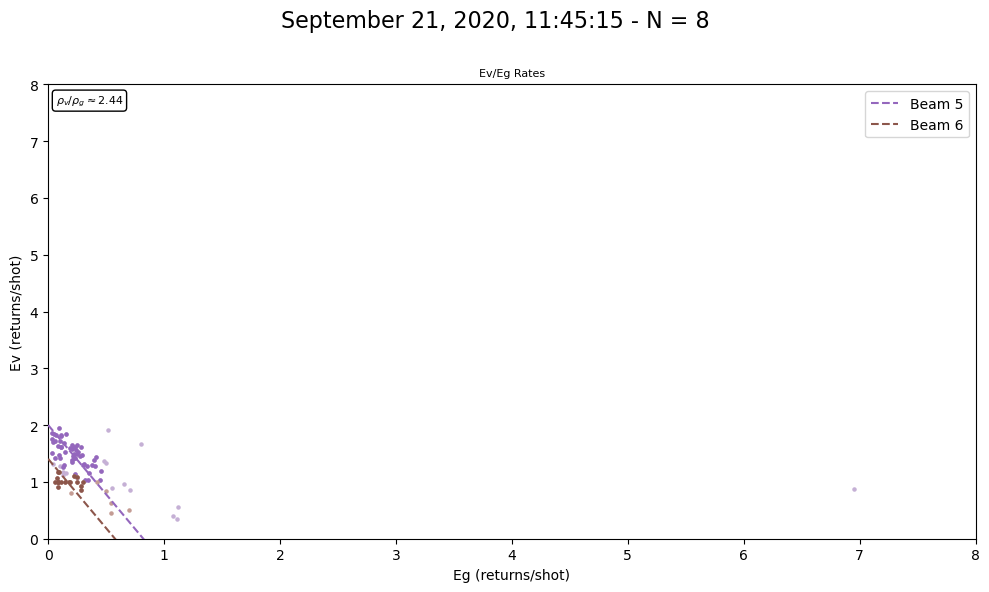

Nothing in rebinned section for marcell_MN file 9's beam 5.
Nothing in rebinned section for marcell_MN file 9's beam 6.


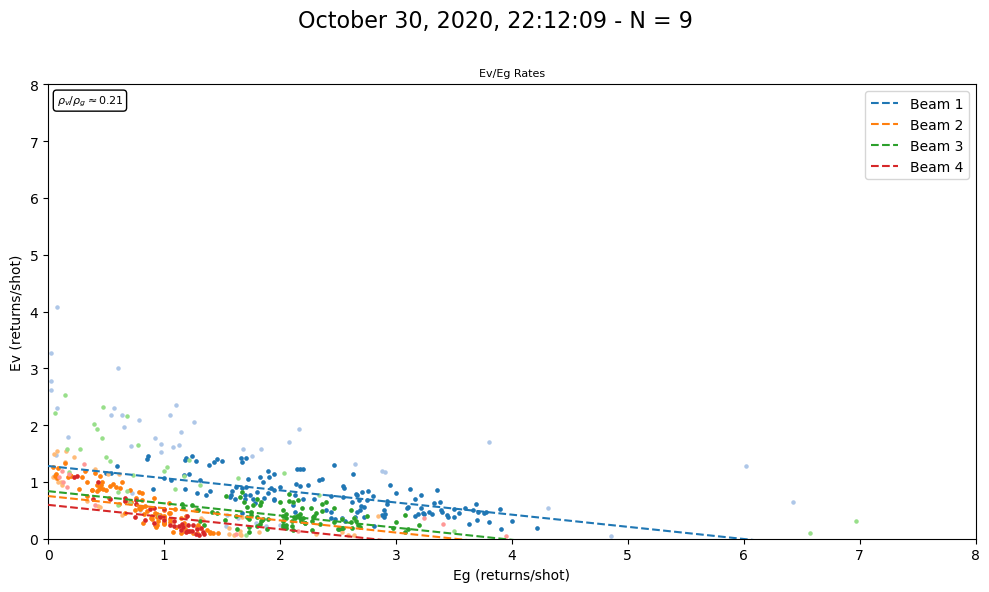

Nothing in rebinned section for marcell_MN file 10's beam 1.
Nothing in rebinned section for marcell_MN file 10's beam 2.
Nothing in rebinned section for marcell_MN file 10's beam 3.
Nothing in rebinned section for marcell_MN file 10's beam 4.
Nothing in rebinned section for marcell_MN file 10's beam 5.
Nothing in rebinned section for marcell_MN file 10's beam 6.
Nothing in rebinned section for marcell_MN file 11's beam 1.
Nothing in rebinned section for marcell_MN file 11's beam 2.
Nothing in rebinned section for marcell_MN file 11's beam 3.
Nothing in rebinned section for marcell_MN file 11's beam 4.
Nothing in rebinned section for marcell_MN file 11's beam 6.


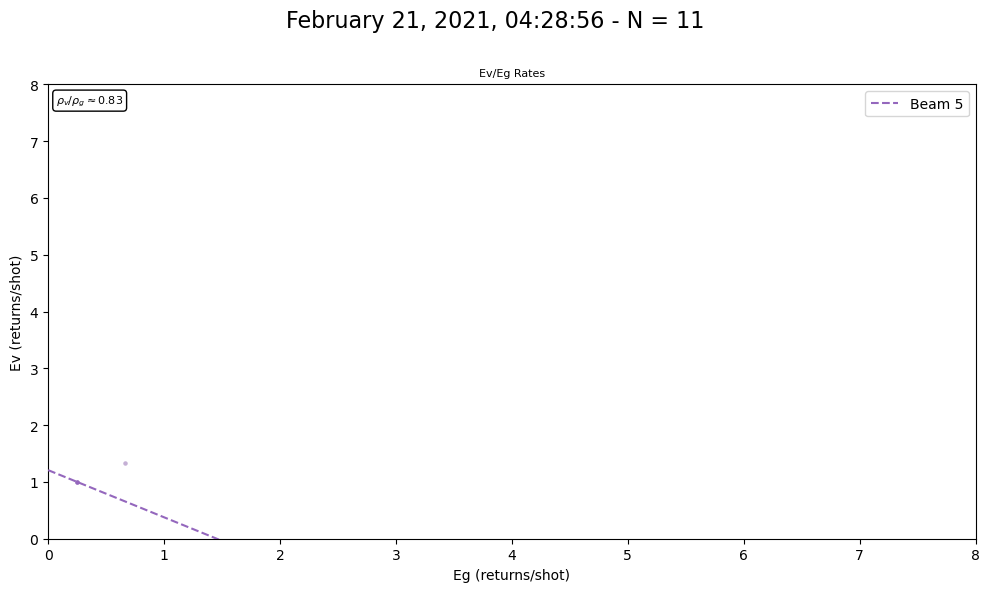

Nothing in rebinned section for marcell_MN file 12's beam 1.
Nothing in rebinned section for marcell_MN file 12's beam 2.
Nothing in rebinned section for marcell_MN file 12's beam 3.
Nothing in rebinned section for marcell_MN file 12's beam 4.


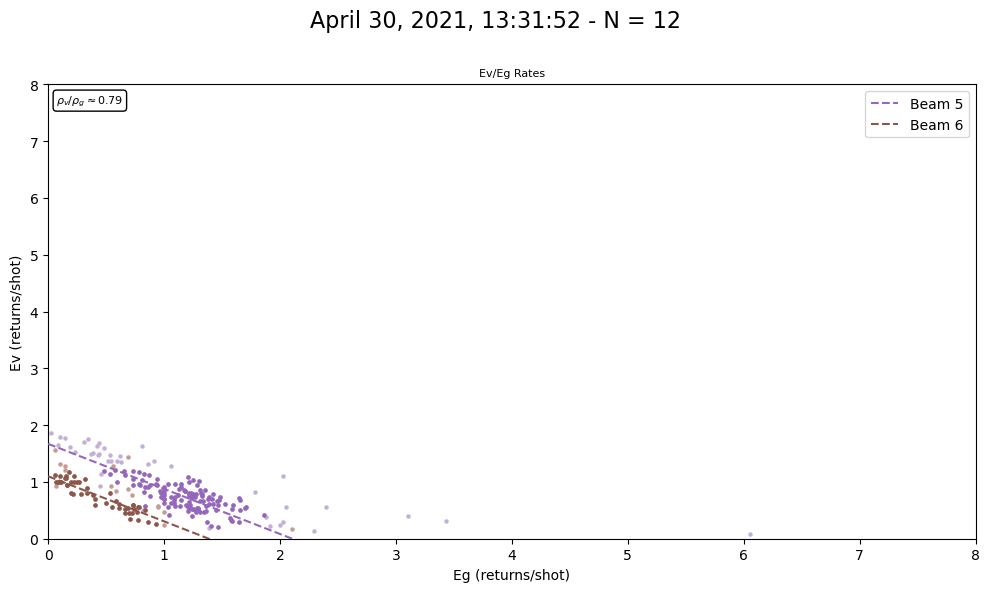

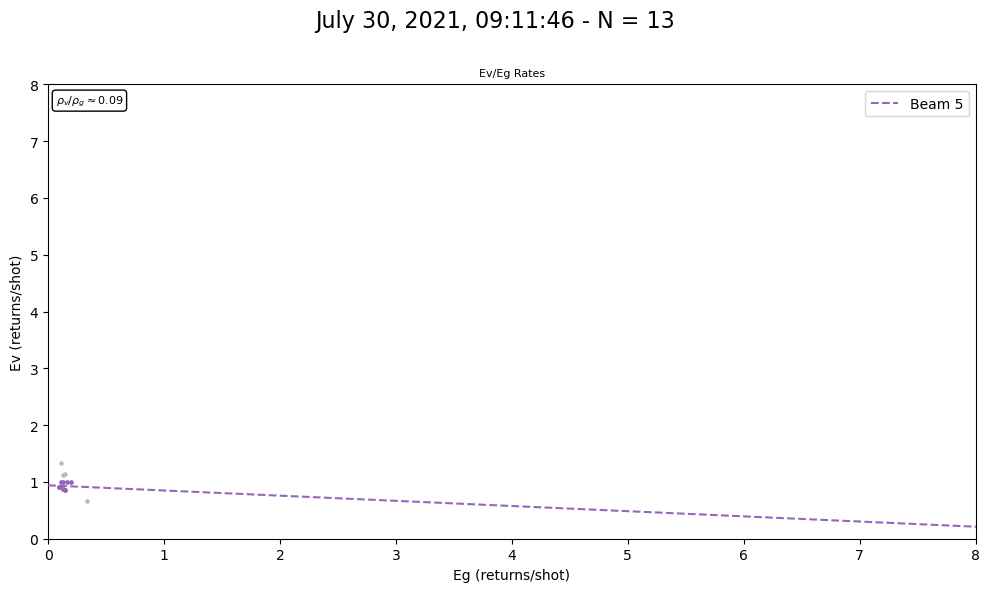

Nothing in rebinned section for marcell_MN file 14's beam 3.
Nothing in rebinned section for marcell_MN file 14's beam 4.
Nothing in rebinned section for marcell_MN file 14's beam 5.
Nothing in rebinned section for marcell_MN file 14's beam 6.


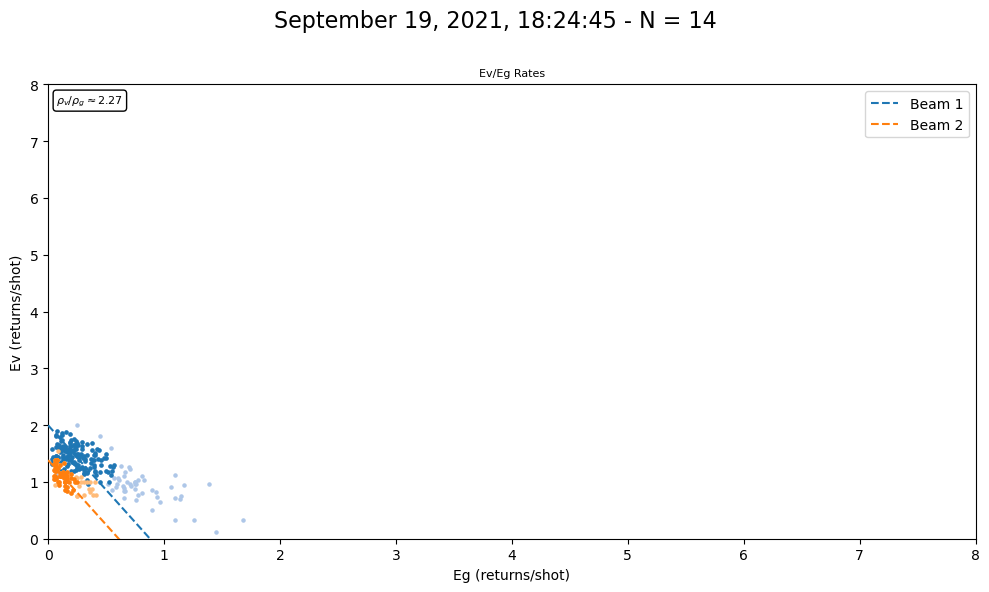

Nothing in rebinned section for marcell_MN file 15's beam 3.
Nothing in rebinned section for marcell_MN file 15's beam 4.
Nothing in rebinned section for marcell_MN file 15's beam 5.
Nothing in rebinned section for marcell_MN file 15's beam 6.


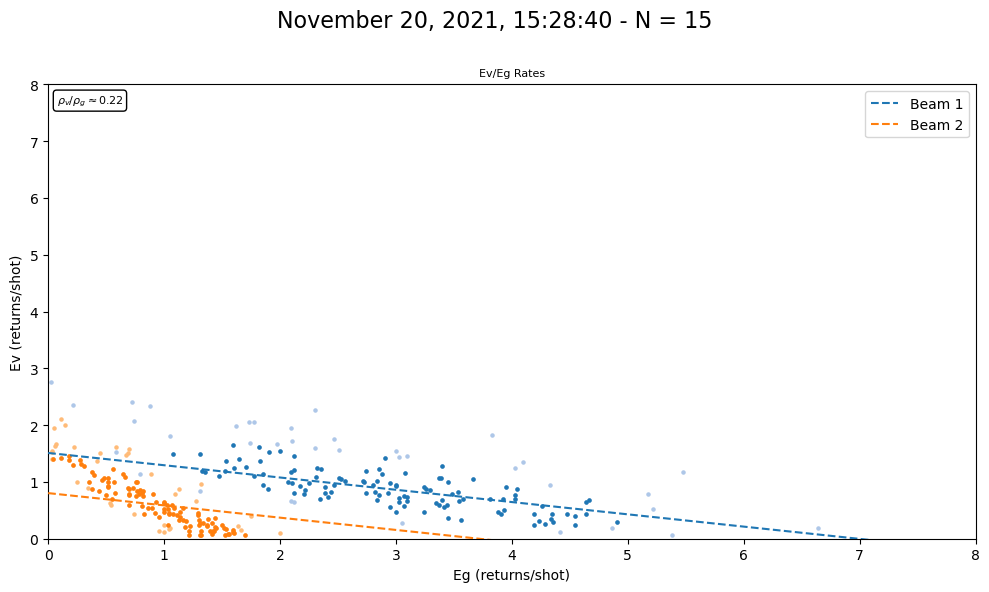

Nothing in rebinned section for marcell_MN file 16's beam 1.
Nothing in rebinned section for marcell_MN file 16's beam 2.
Nothing in rebinned section for marcell_MN file 16's beam 3.
Nothing in rebinned section for marcell_MN file 16's beam 4.


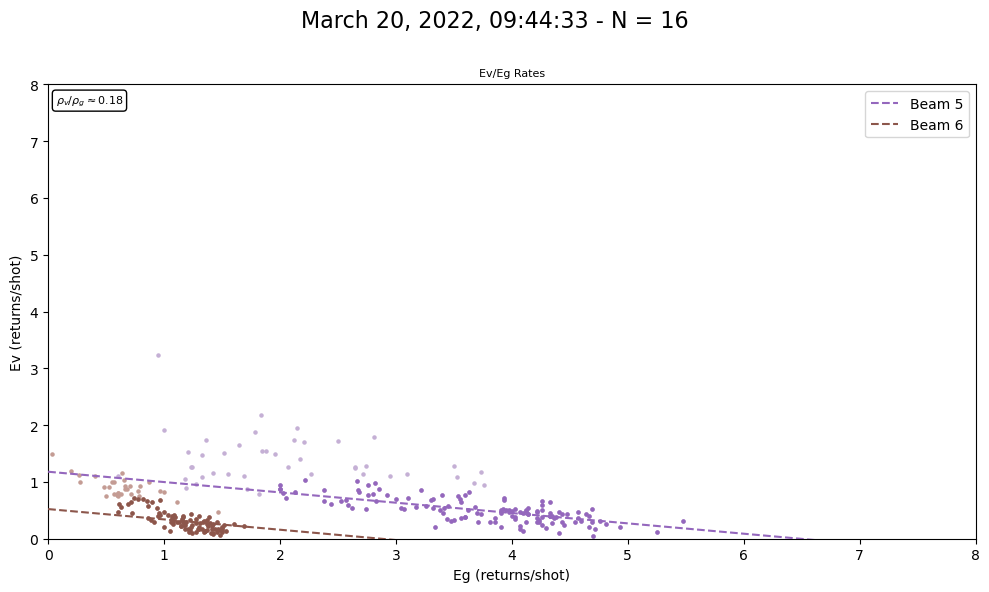

Nothing in rebinned section for marcell_MN file 17's beam 1.
Nothing in rebinned section for marcell_MN file 17's beam 2.
Nothing in rebinned section for marcell_MN file 17's beam 4.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for marcell_MN file 18's beam 1.
Nothing in rebinned section for marcell_MN file 18's beam 2.
Nothing in rebinned section for marcell_MN file 18's beam 4.


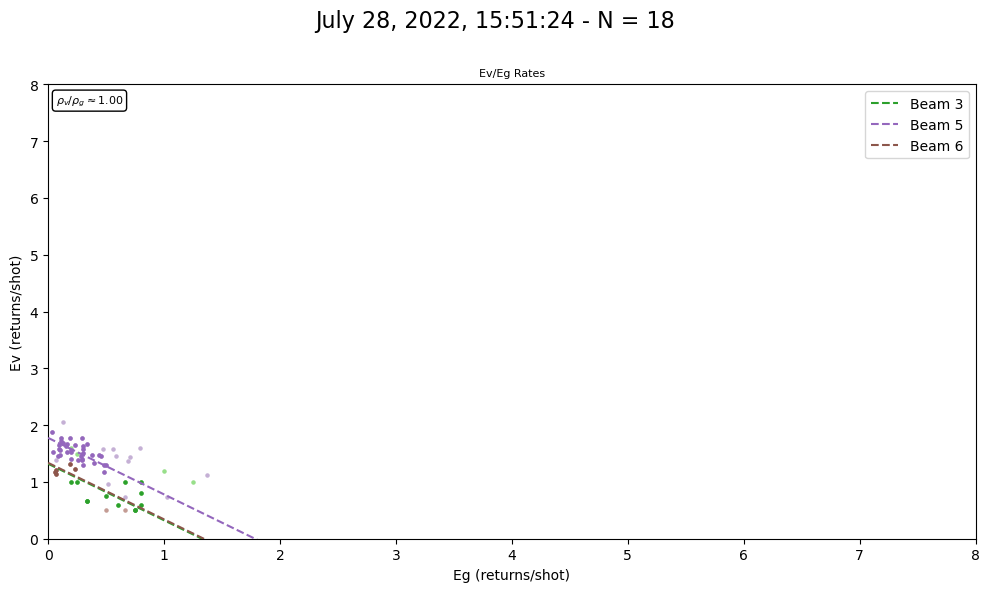

Nothing in rebinned section for marcell_MN file 19's beam 1.
Nothing in rebinned section for marcell_MN file 19's beam 2.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

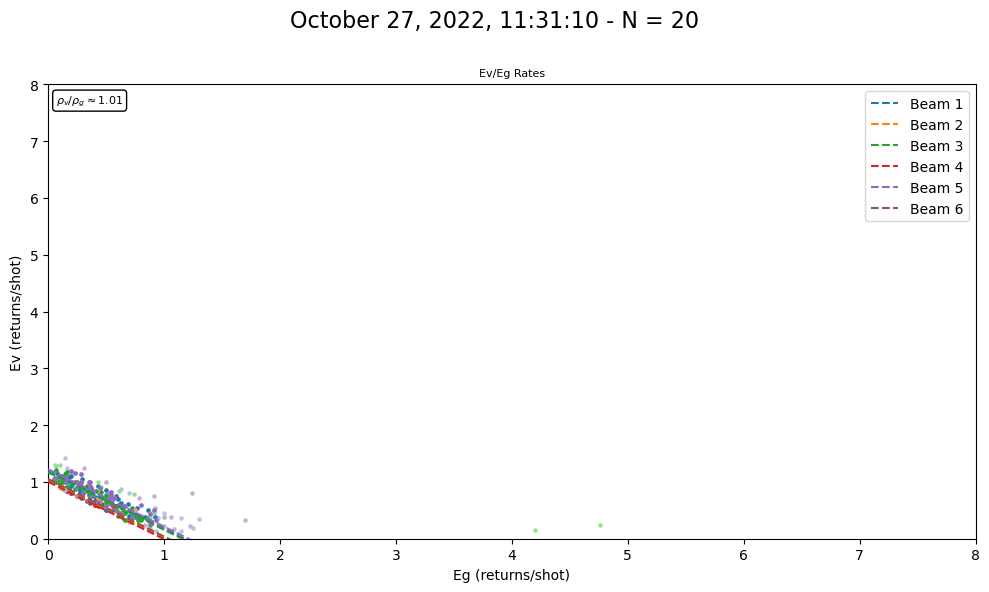

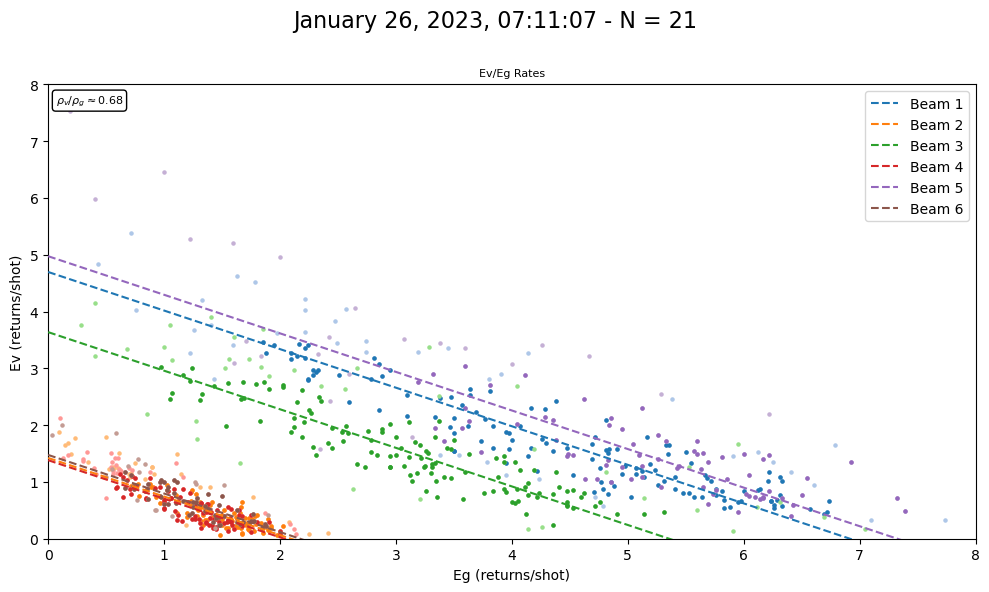

Nothing in rebinned section for marcell_MN file 22's beam 1.
Nothing in rebinned section for marcell_MN file 22's beam 2.
Nothing in rebinned section for marcell_MN file 22's beam 3.
Nothing in rebinned section for marcell_MN file 22's beam 4.


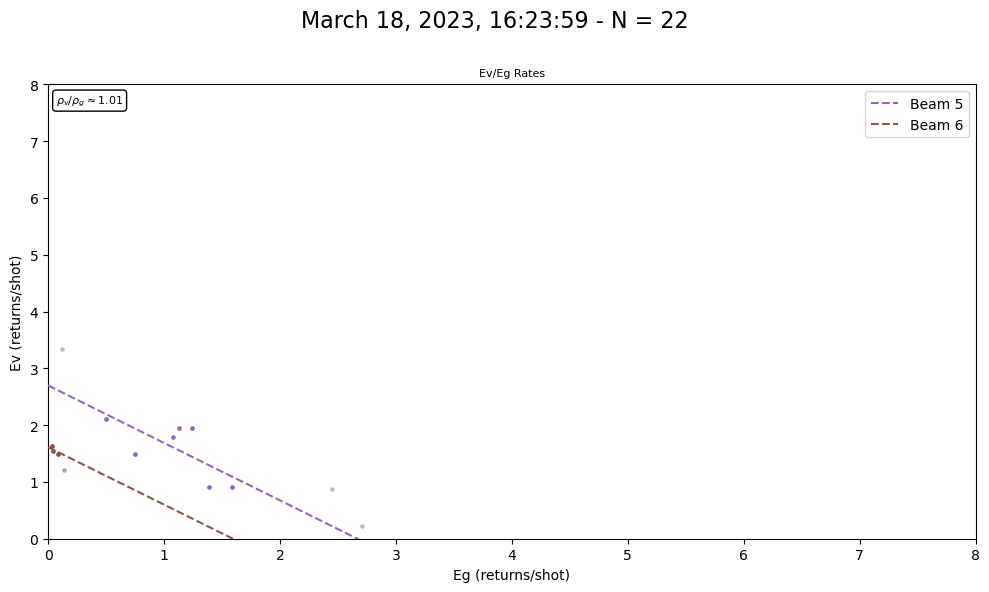

Nothing in rebinned section for marcell_MN file 23's beam 2.
Nothing in rebinned section for marcell_MN file 23's beam 3.
Nothing in rebinned section for marcell_MN file 23's beam 4.
Nothing in rebinned section for marcell_MN file 23's beam 5.
Nothing in rebinned section for marcell_MN file 23's beam 6.
Nothing in rebinned section for marcell_MN file 24's beam 1.
Nothing in rebinned section for marcell_MN file 24's beam 2.


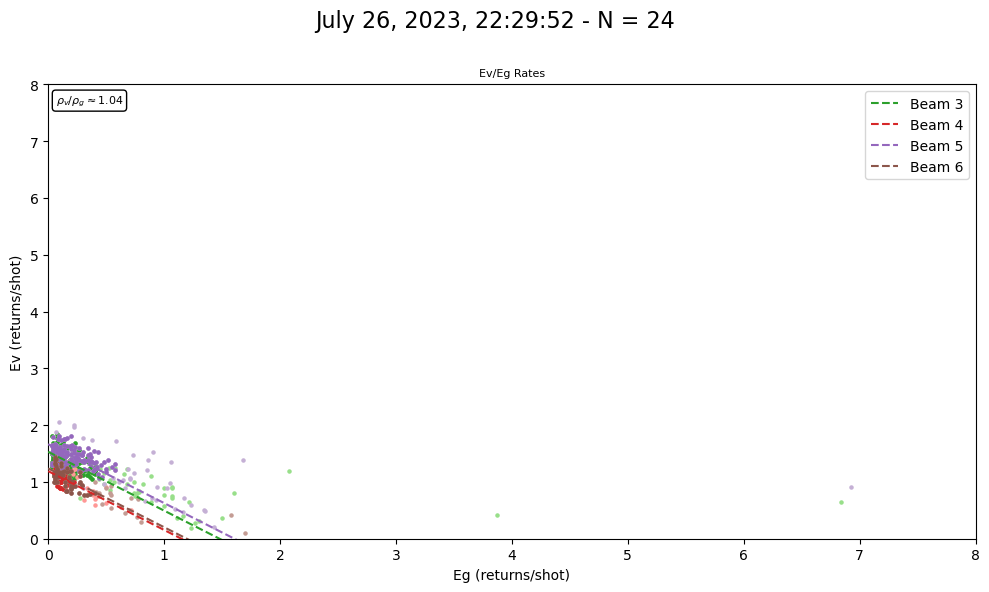

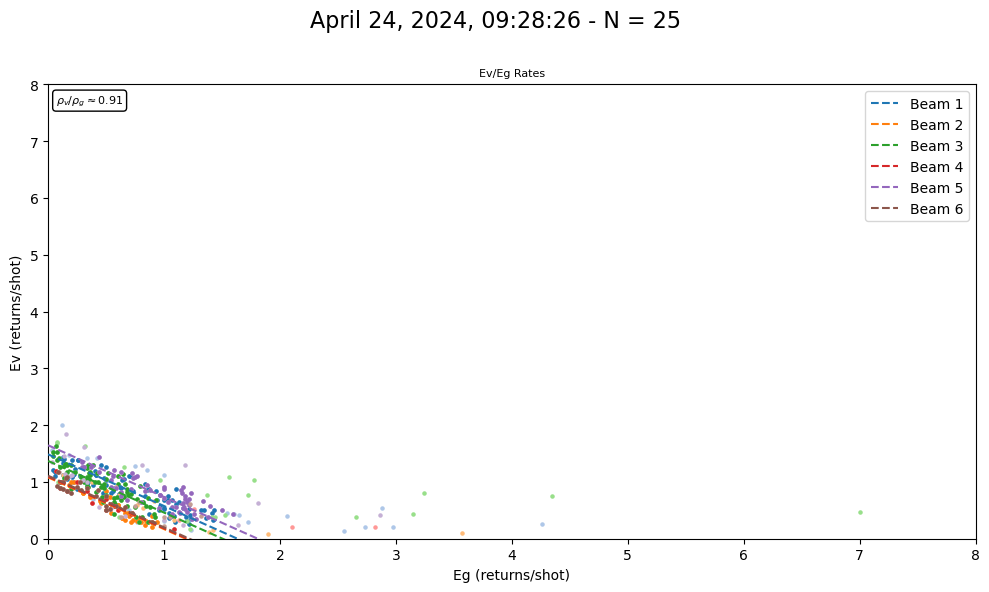

Nothing in rebinned section for marcell_MN file 26's beam 5.
Nothing in rebinned section for marcell_MN file 26's beam 6.


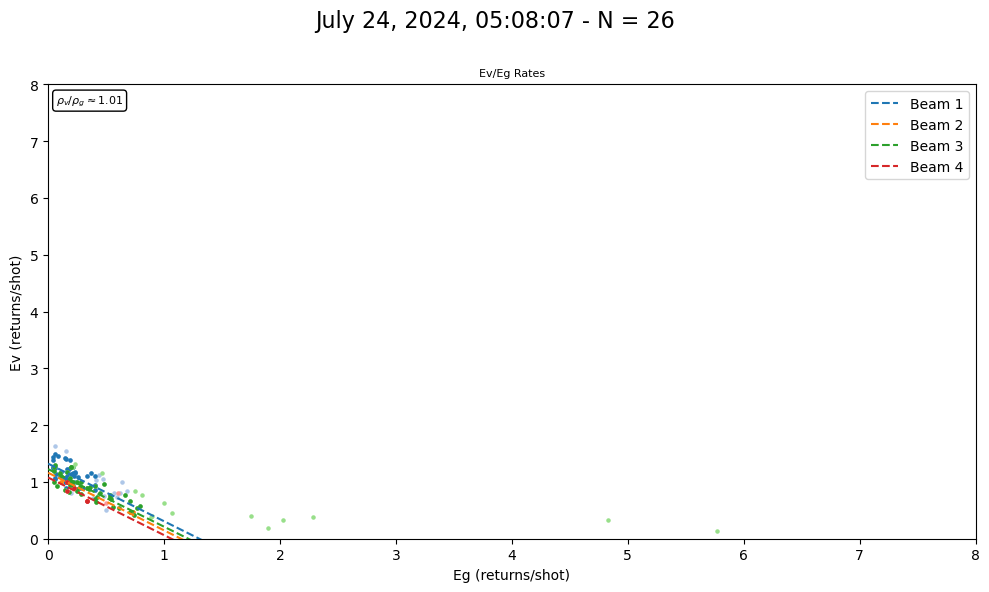

In [1]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/marcell_MN/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-93.4541, 47.5049)

for i in range(N):
# for i in [11]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=413, threshold=1, graph_detail=1)

    # BLOCKS
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=413, threshold=1, small_box=10, graph_detail=2, loss='linear', rebinned=0, f_scale=.05,\
    #                      outlier_removal=2,method='bimodal')
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=413, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=.25,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=413, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

# Lacclair

Nothing in rebinned section for lacclair file 0's beam 1.
Nothing in rebinned section for lacclair file 0's beam 2.
Nothing in rebinned section for lacclair file 0's beam 3.
Nothing in rebinned section for lacclair file 0's beam 4.
Nothing in rebinned section for lacclair file 0's beam 5.
Nothing in rebinned section for lacclair file 0's beam 6.
Nothing in rebinned section for lacclair file 1's beam 5.
Nothing in rebinned section for lacclair file 1's beam 6.


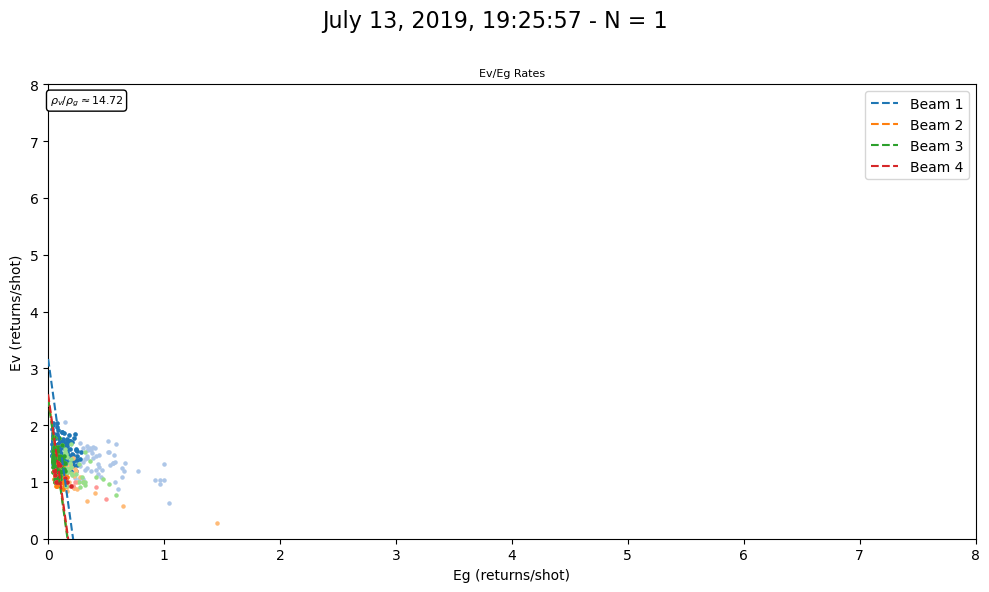

Nothing in rebinned section for lacclair file 2's beam 3.
Nothing in rebinned section for lacclair file 2's beam 4.
Nothing in rebinned section for lacclair file 2's beam 5.
Nothing in rebinned section for lacclair file 2's beam 6.


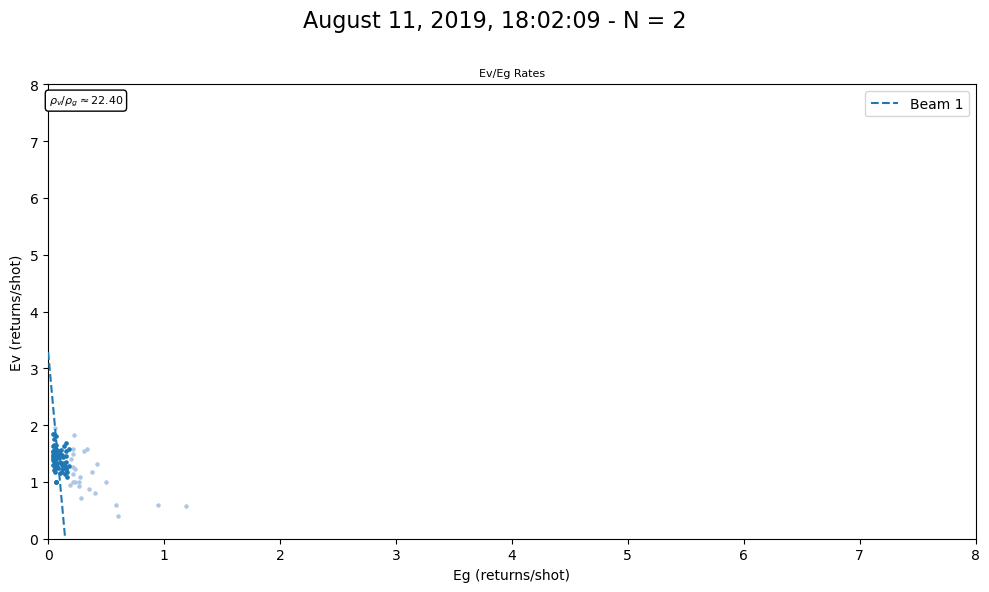

Nothing in rebinned section for lacclair file 3's beam 1.
Nothing in rebinned section for lacclair file 3's beam 2.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

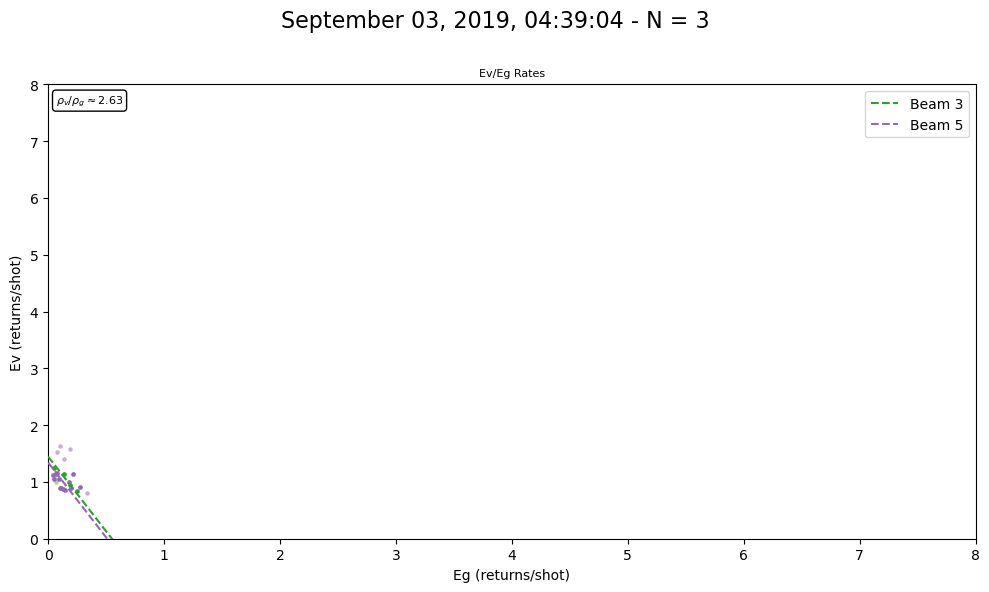

Nothing in rebinned section for lacclair file 4's beam 5.
Nothing in rebinned section for lacclair file 4's beam 6.


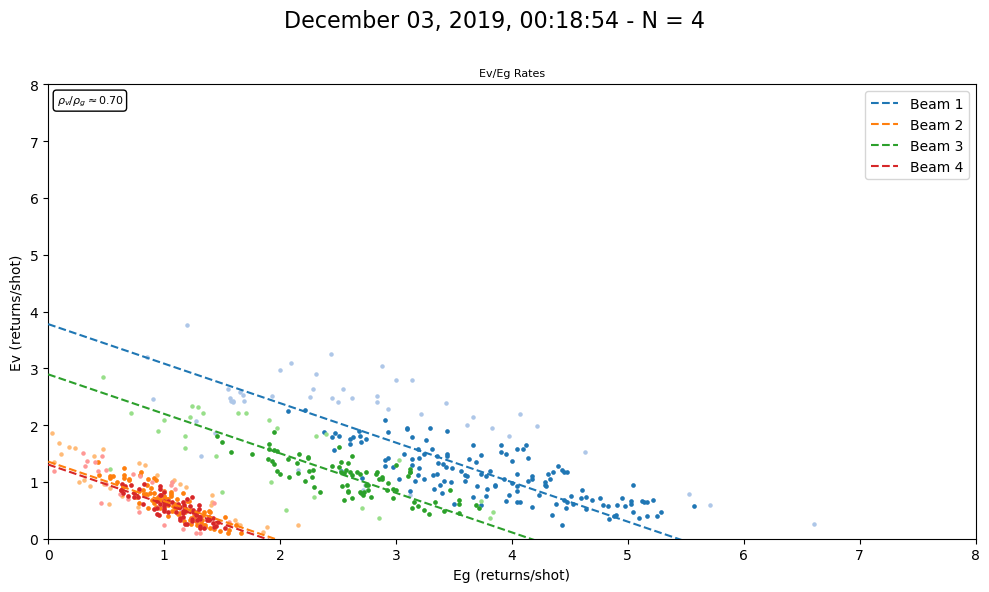

Nothing in rebinned section for lacclair file 5's beam 1.
Nothing in rebinned section for lacclair file 5's beam 2.


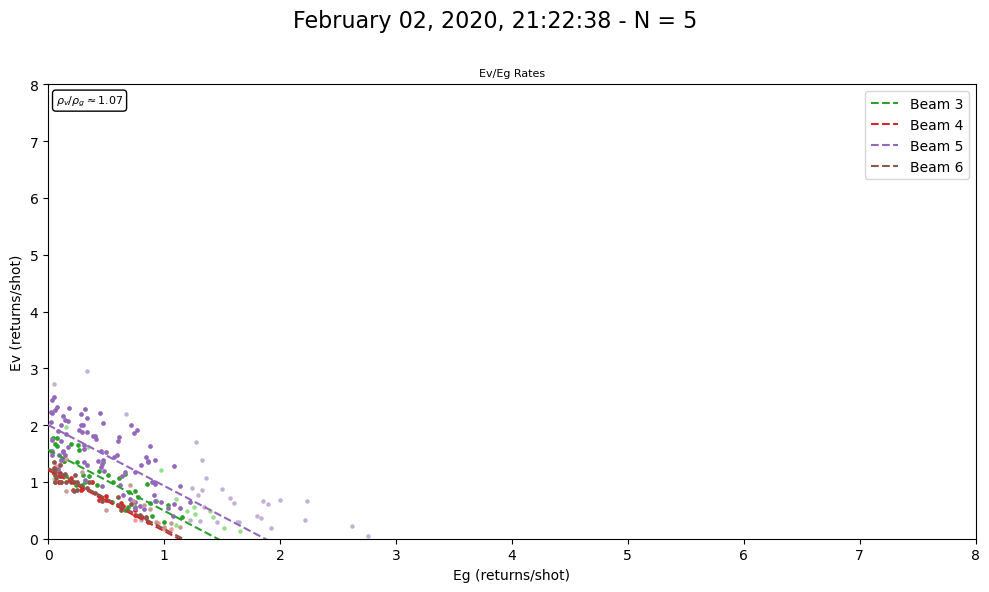

Nothing in rebinned section for lacclair file 6's beam 2.
Nothing in rebinned section for lacclair file 6's beam 3.
Nothing in rebinned section for lacclair file 6's beam 4.
Nothing in rebinned section for lacclair file 6's beam 5.
Nothing in rebinned section for lacclair file 6's beam 6.


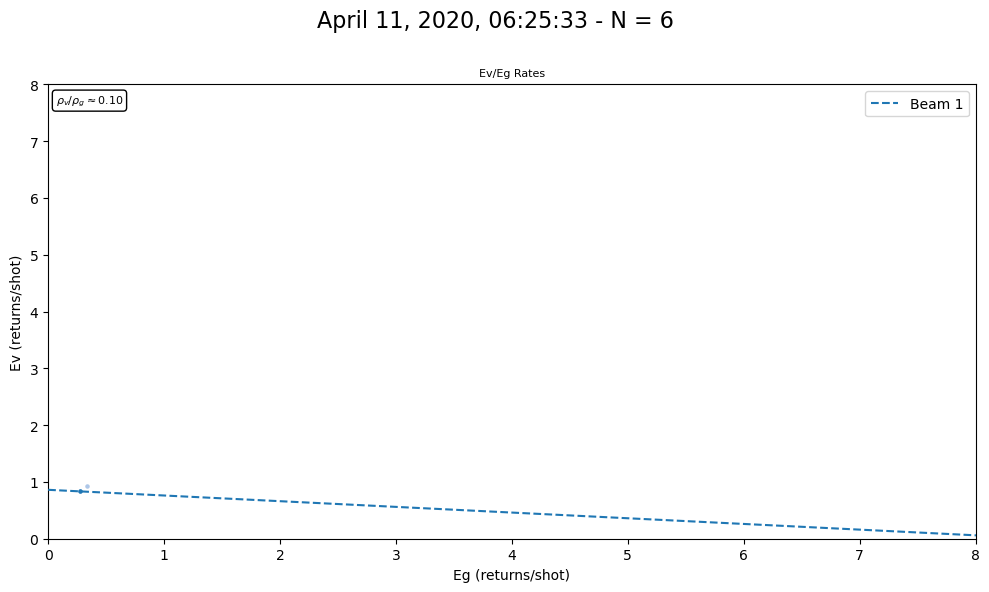

Nothing in rebinned section for lacclair file 7's beam 1.
Nothing in rebinned section for lacclair file 7's beam 2.
Nothing in rebinned section for lacclair file 7's beam 3.
Nothing in rebinned section for lacclair file 7's beam 4.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

Nothing in rebinned section for lacclair file 8's beam 1.
Nothing in rebinned section for lacclair file 8's beam 2.
Nothing in rebinned section for lacclair file 8's beam 3.
Nothing in rebinned section for lacclair file 8's beam 4.
Nothing in rebinned section for lacclair file 8's beam 5.
Nothing in rebinned section for lacclair file 8's beam 6.
Nothing in rebinned section for lacclair file 9's beam 3.
Nothing in rebinned section for lacclair file 9's beam 4.
Nothing in rebinned section for lacclair file 9's beam 5.
Nothing in rebinned section for lacclair file 9's beam 6.


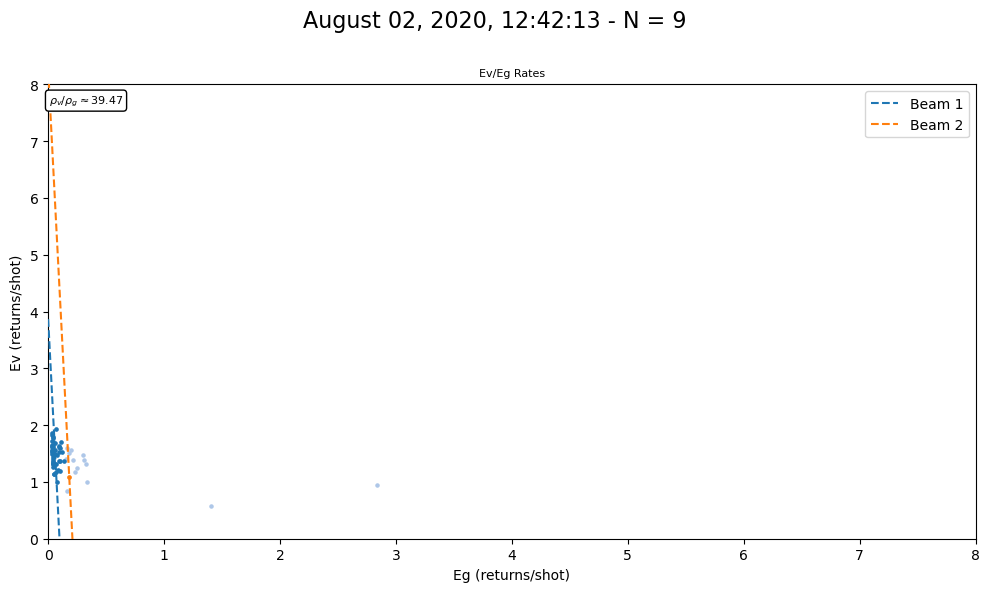

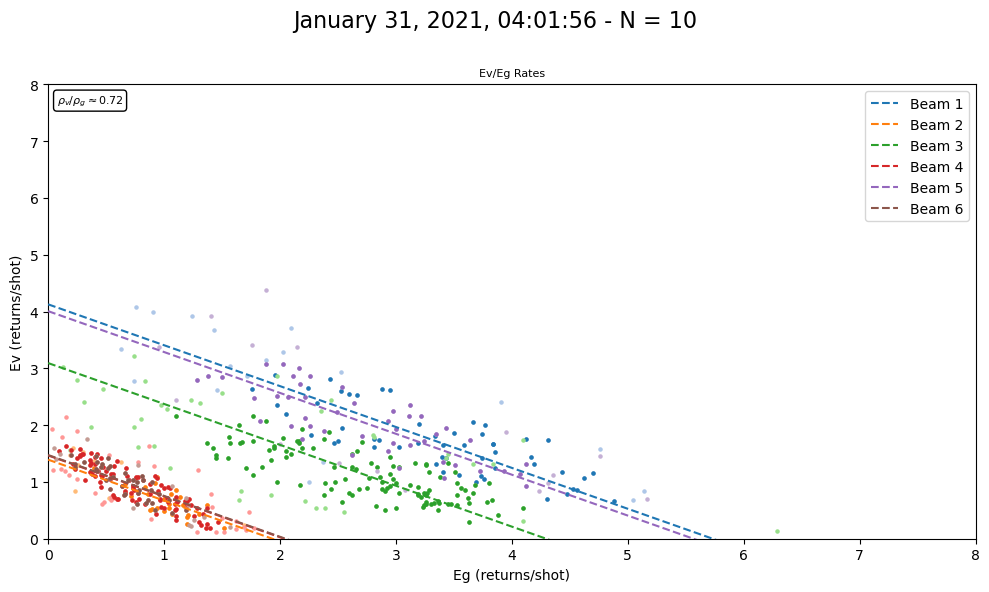

Nothing in rebinned section for lacclair file 11's beam 1.
Nothing in rebinned section for lacclair file 11's beam 2.
Nothing in rebinned section for lacclair file 11's beam 3.
Nothing in rebinned section for lacclair file 11's beam 4.
Nothing in rebinned section for lacclair file 12's beam 1.
Nothing in rebinned section for lacclair file 12's beam 2.


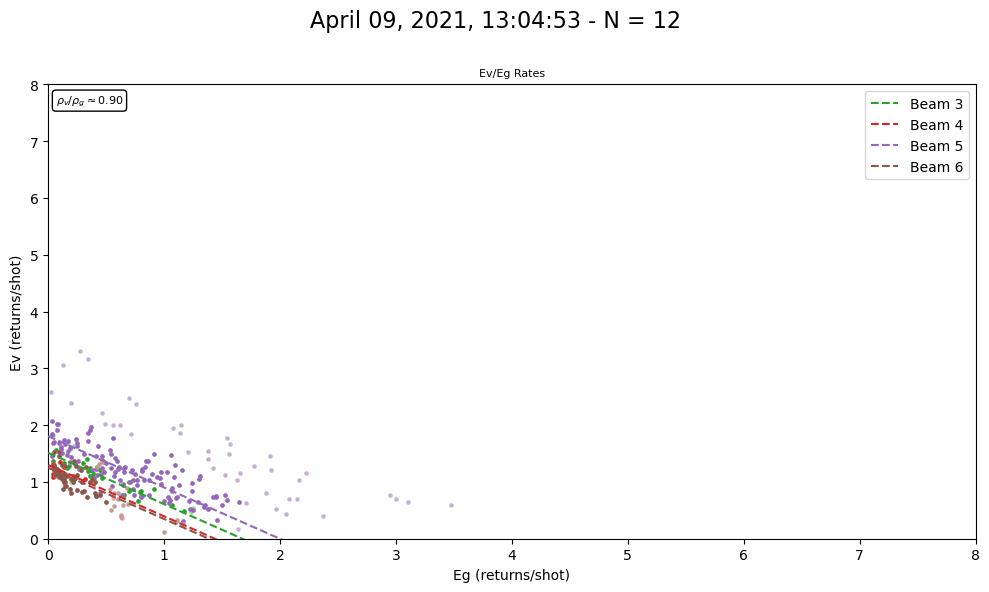

Nothing in rebinned section for lacclair file 13's beam 1.
Nothing in rebinned section for lacclair file 13's beam 2.
Nothing in rebinned section for lacclair file 13's beam 3.
Nothing in rebinned section for lacclair file 13's beam 4.
Nothing in rebinned section for lacclair file 13's beam 5.
Nothing in rebinned section for lacclair file 13's beam 6.
Nothing in rebinned section for lacclair file 14's beam 1.
Nothing in rebinned section for lacclair file 14's beam 2.


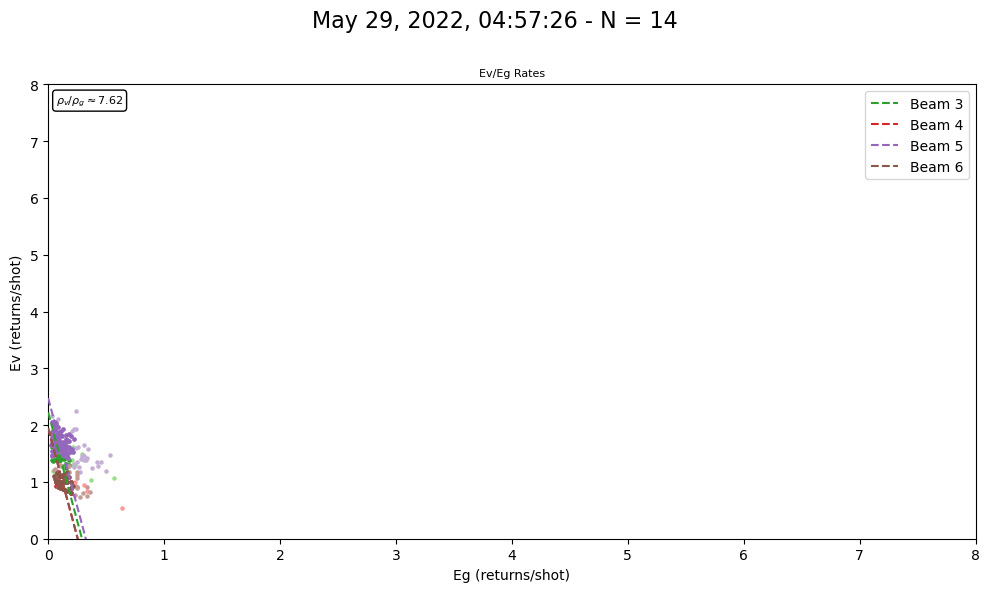

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

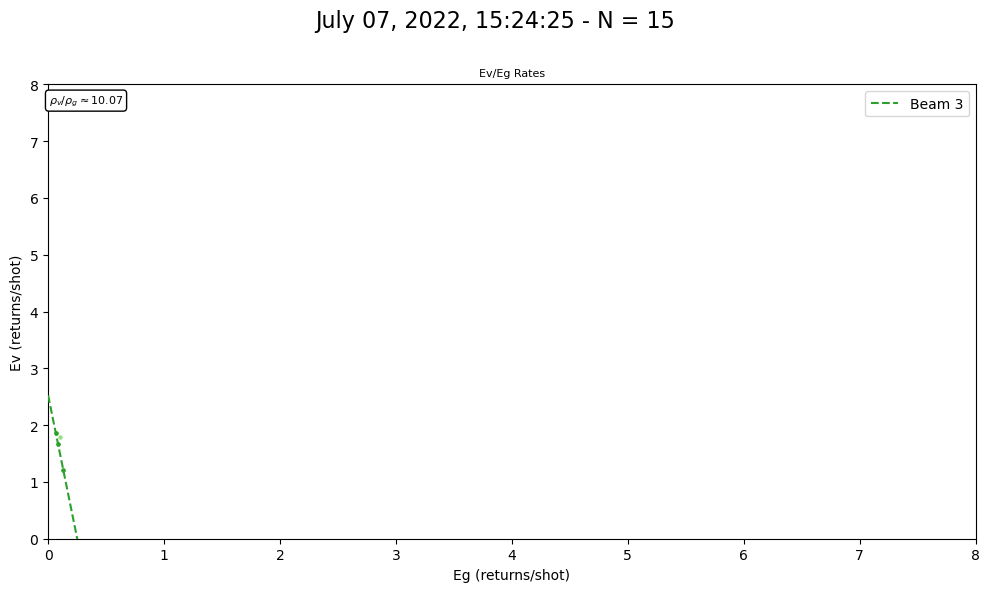

Nothing in rebinned section for lacclair file 16's beam 3.
Nothing in rebinned section for lacclair file 16's beam 4.
Nothing in rebinned section for lacclair file 16's beam 5.
Nothing in rebinned section for lacclair file 16's beam 6.


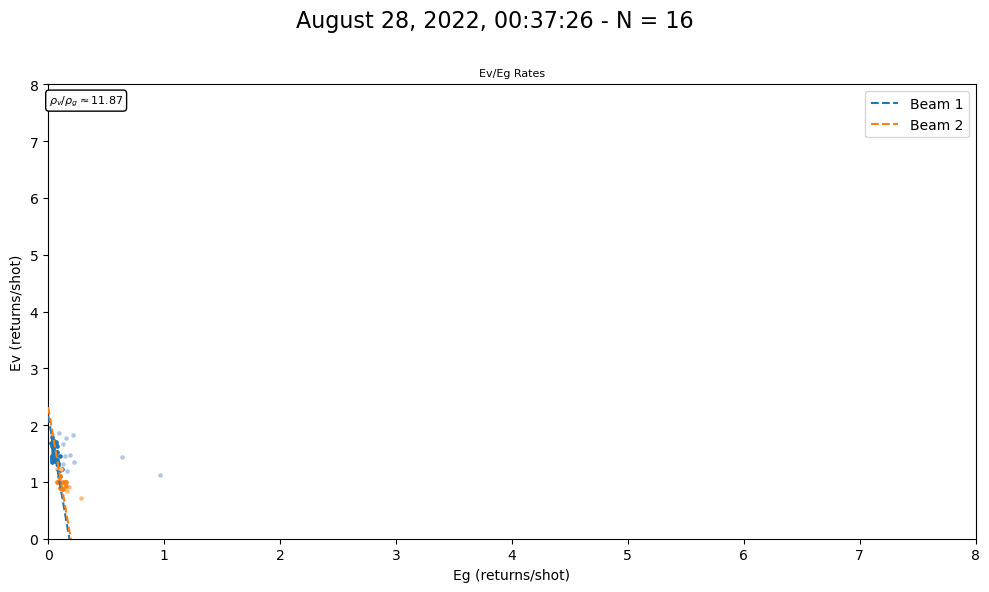

Nothing in rebinned section for lacclair file 17's beam 1.
Nothing in rebinned section for lacclair file 17's beam 2.
Nothing in rebinned section for lacclair file 17's beam 3.
Nothing in rebinned section for lacclair file 17's beam 4.
Nothing in rebinned section for lacclair file 17's beam 5.
Nothing in rebinned section for lacclair file 17's beam 6.
Nothing in rebinned section for lacclair file 18's beam 1.
Nothing in rebinned section for lacclair file 18's beam 2.
Nothing in rebinned section for lacclair file 18's beam 4.


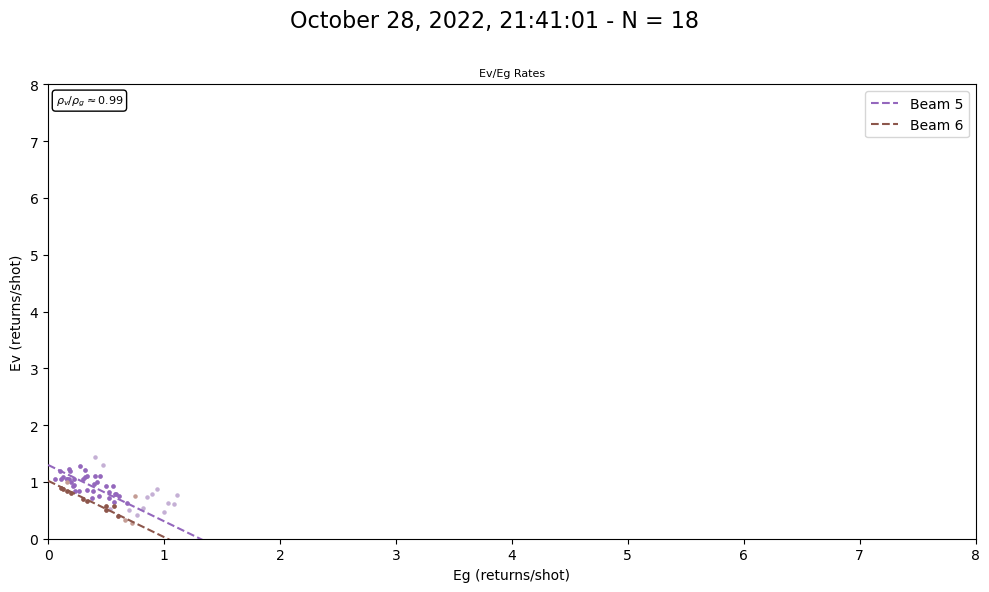

Nothing in rebinned section for lacclair file 19's beam 1.
Nothing in rebinned section for lacclair file 19's beam 2.
Nothing in rebinned section for lacclair file 19's beam 3.
Nothing in rebinned section for lacclair file 19's beam 4.
Nothing in rebinned section for lacclair file 19's beam 5.
Nothing in rebinned section for lacclair file 19's beam 6.
Nothing in rebinned section for lacclair file 20's beam 1.
Nothing in rebinned section for lacclair file 20's beam 2.
Nothing in rebinned section for lacclair file 20's beam 3.
Nothing in rebinned section for lacclair file 20's beam 4.


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope =

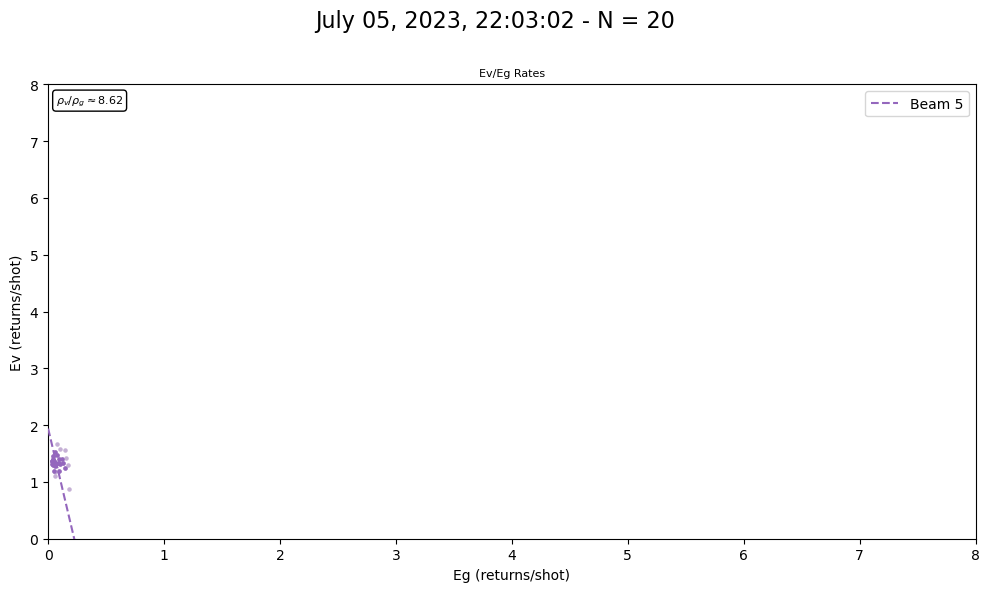

Nothing in rebinned section for lacclair file 21's beam 1.
Nothing in rebinned section for lacclair file 21's beam 2.
Nothing in rebinned section for lacclair file 21's beam 3.
Nothing in rebinned section for lacclair file 21's beam 4.


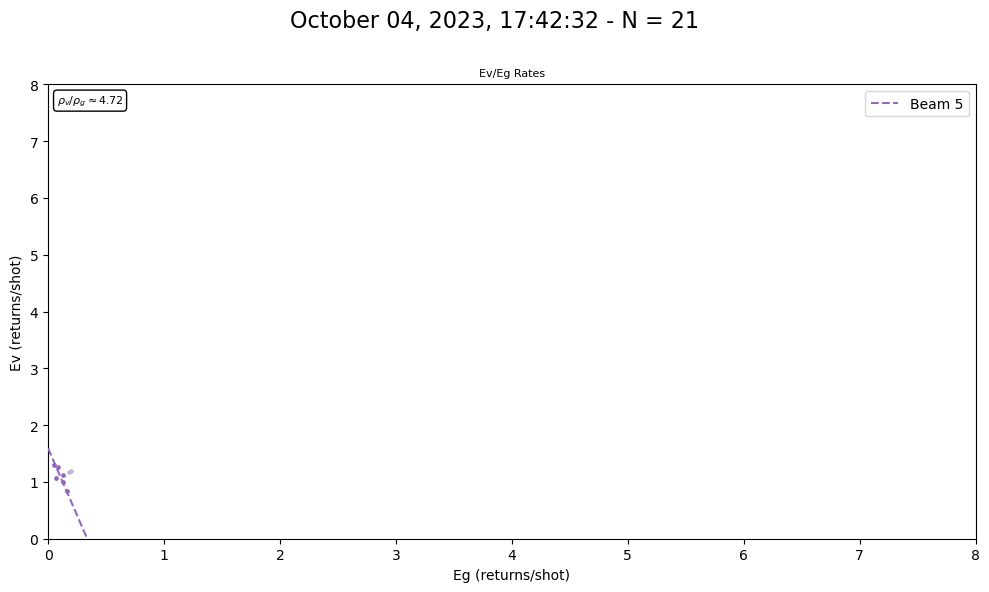

Nothing in rebinned section for lacclair file 22's beam 5.
Nothing in rebinned section for lacclair file 22's beam 6.


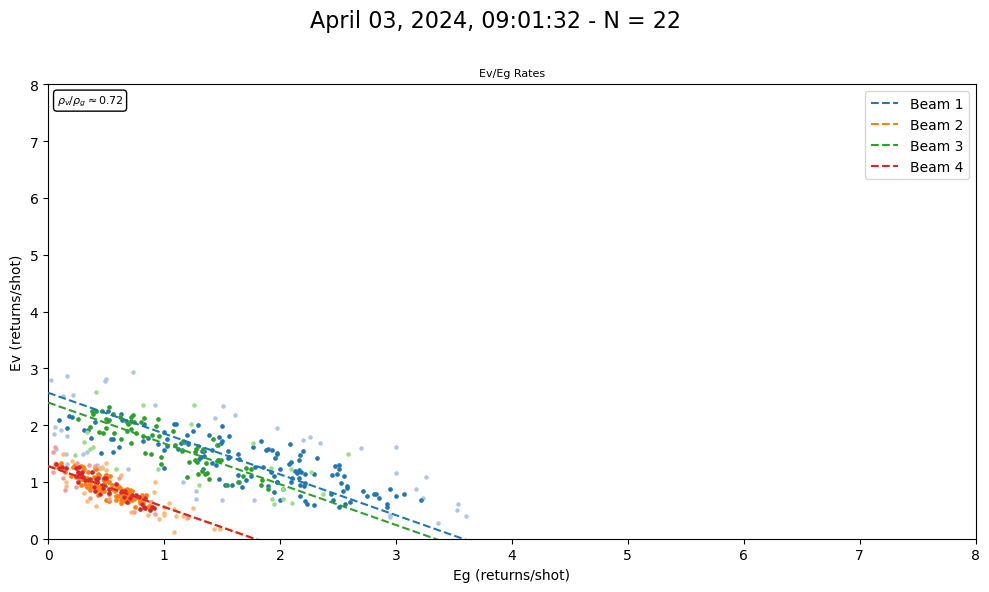

Nothing in rebinned section for lacclair file 23's beam 1.
Nothing in rebinned section for lacclair file 23's beam 2.


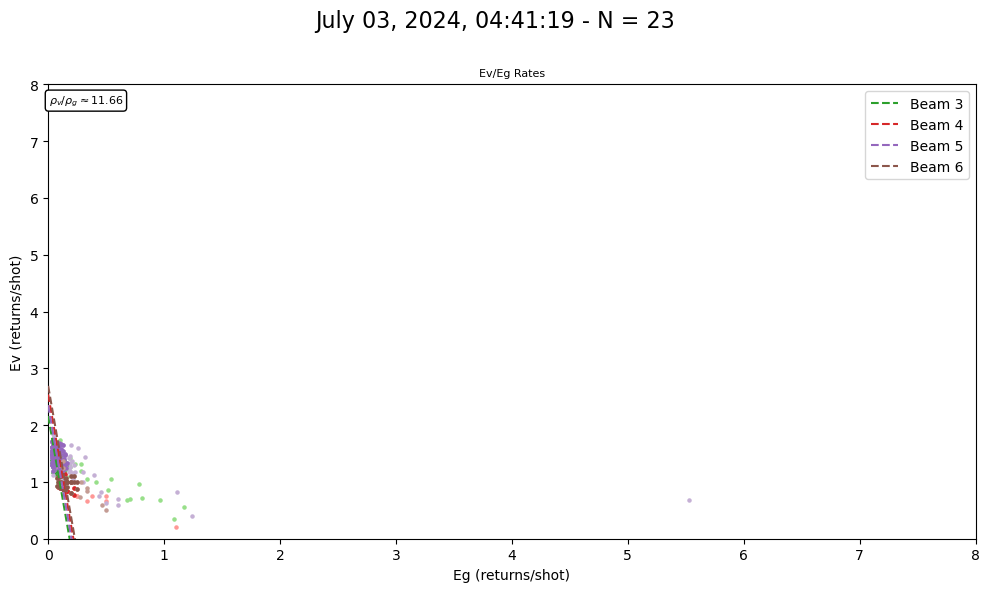

In [2]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/lacclair/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-71.6696, 46.9521)

for i in range(N):
# for i in [15]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=313, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=313, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=.25,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=313, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

# Torgnon

Nothing in rebinned section for torgnon file 0's beam 5.
Nothing in rebinned section for torgnon file 0's beam 6.


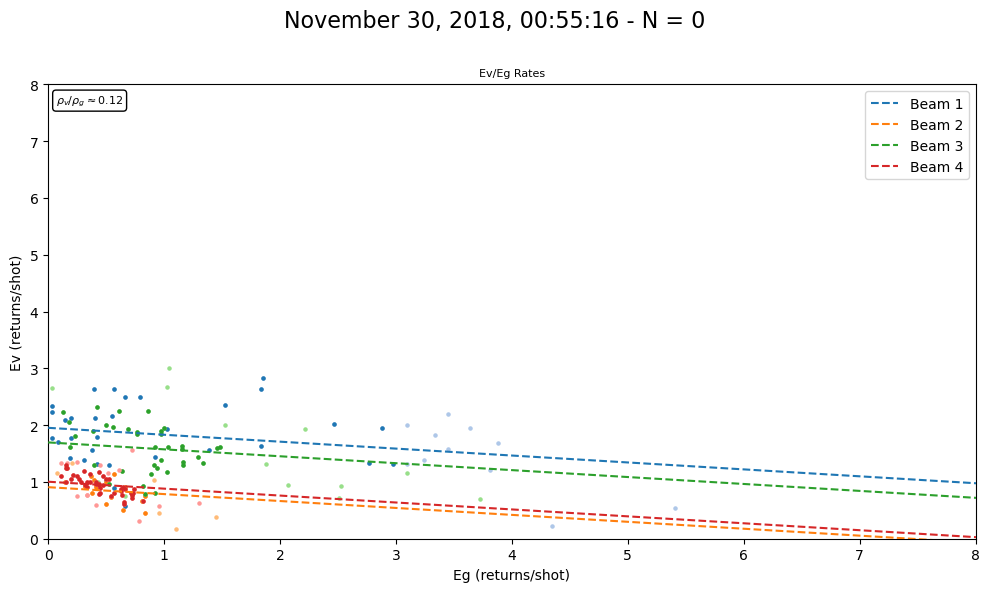

Nothing in rebinned section for torgnon file 1's beam 5.
Nothing in rebinned section for torgnon file 1's beam 6.


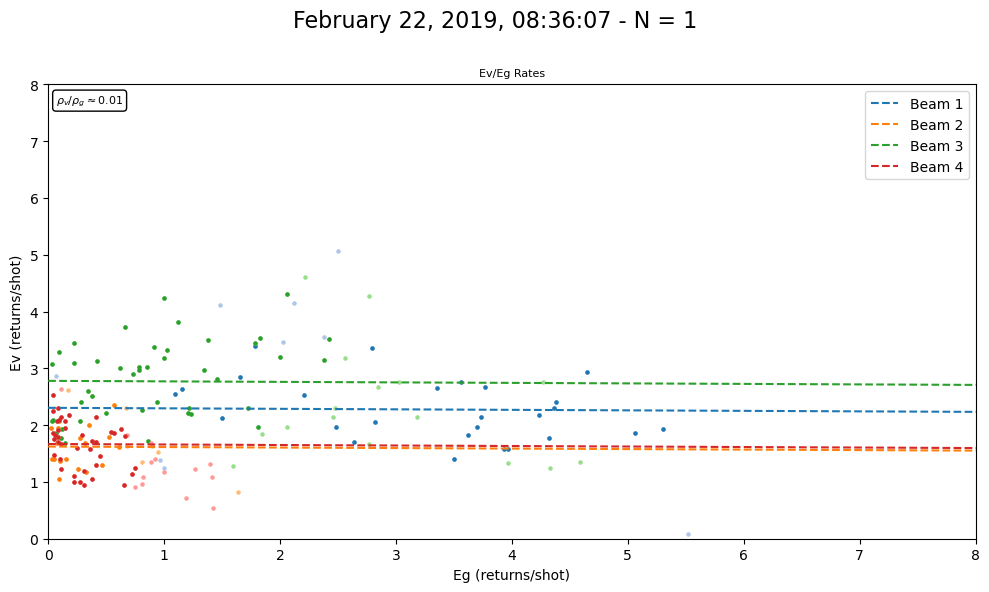

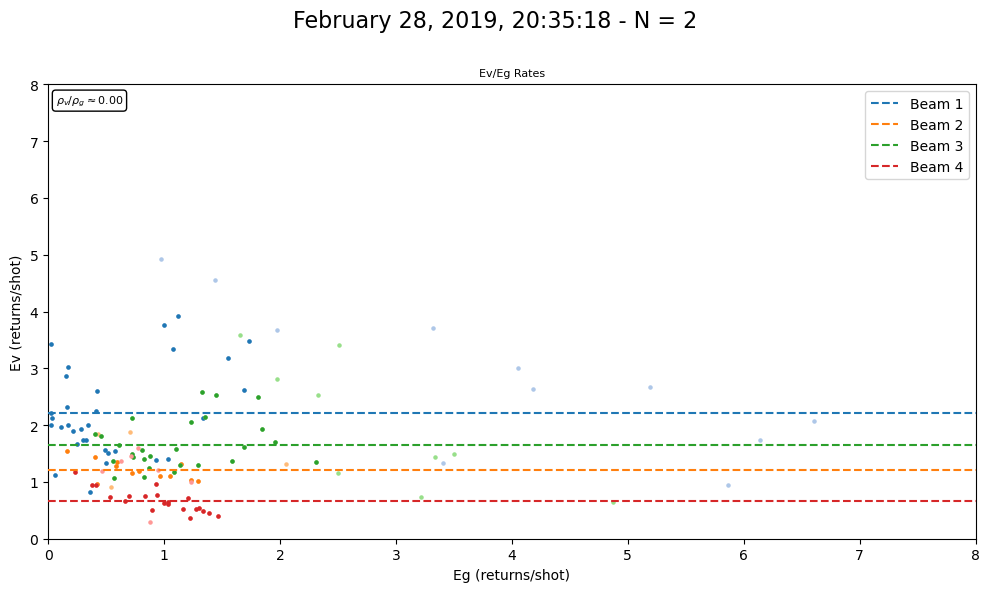

Nothing in rebinned section for torgnon file 3's beam 5.
Nothing in rebinned section for torgnon file 3's beam 6.


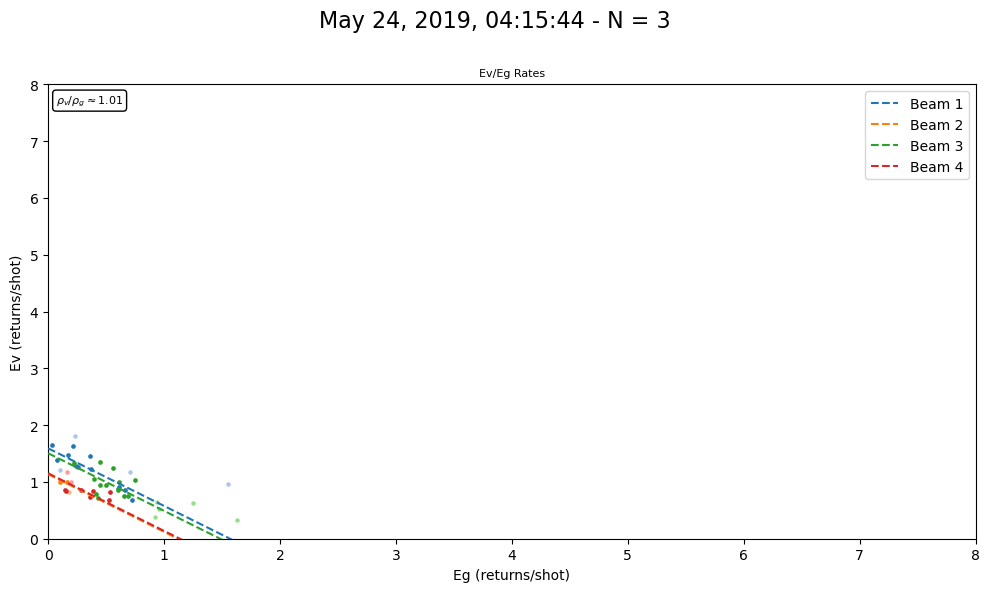

Nothing in rebinned section for torgnon file 4's beam 1.
Nothing in rebinned section for torgnon file 4's beam 2.


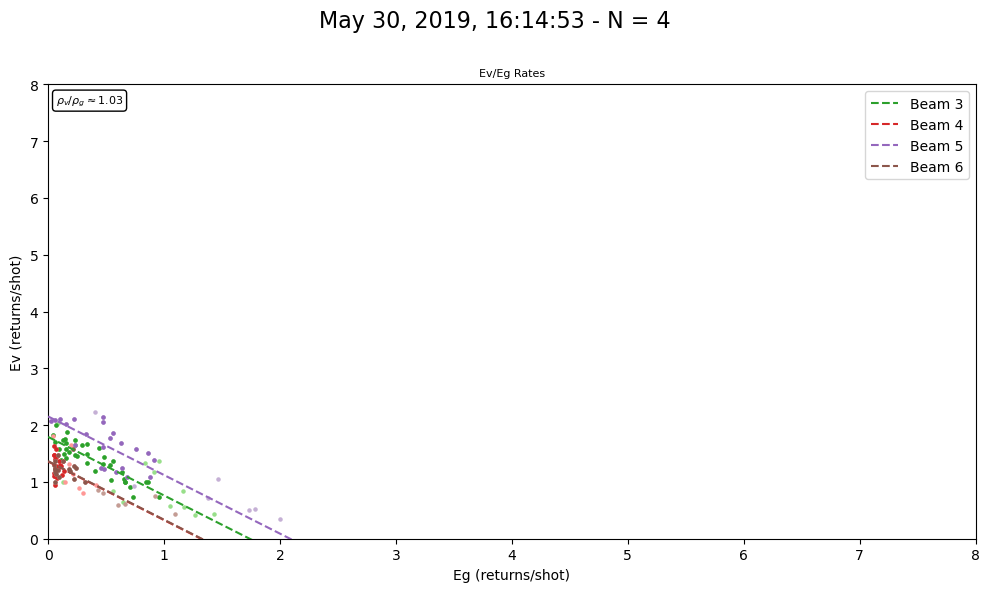

Nothing in rebinned section for torgnon file 5's beam 1.
Nothing in rebinned section for torgnon file 5's beam 2.
Nothing in rebinned section for torgnon file 5's beam 3.
Nothing in rebinned section for torgnon file 5's beam 4.
Nothing in rebinned section for torgnon file 5's beam 5.
Nothing in rebinned section for torgnon file 5's beam 6.
Nothing in rebinned section for torgnon file 6's beam 5.
Nothing in rebinned section for torgnon file 6's beam 6.


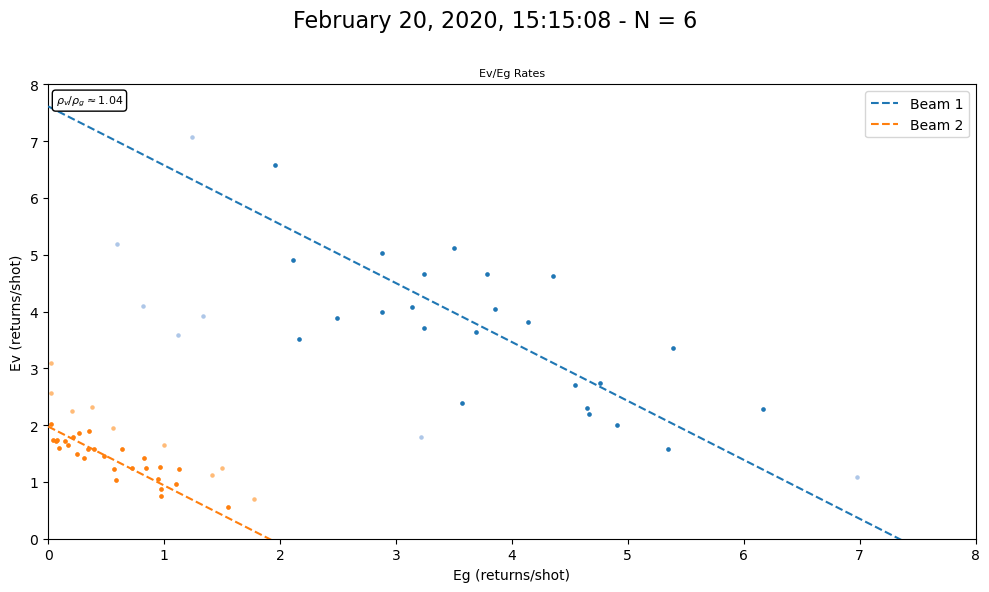

Nothing in rebinned section for torgnon file 7's beam 3.
Nothing in rebinned section for torgnon file 7's beam 4.
Nothing in rebinned section for torgnon file 7's beam 5.
Nothing in rebinned section for torgnon file 7's beam 6.


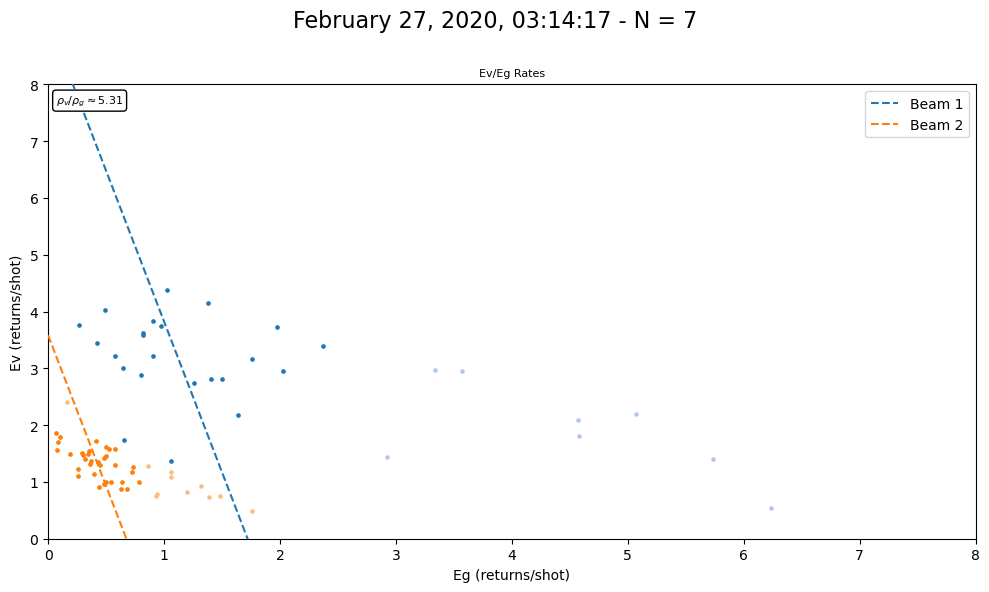

Nothing in rebinned section for torgnon file 8's beam 3.
Nothing in rebinned section for torgnon file 8's beam 4.
Nothing in rebinned section for torgnon file 8's beam 5.
Nothing in rebinned section for torgnon file 8's beam 6.


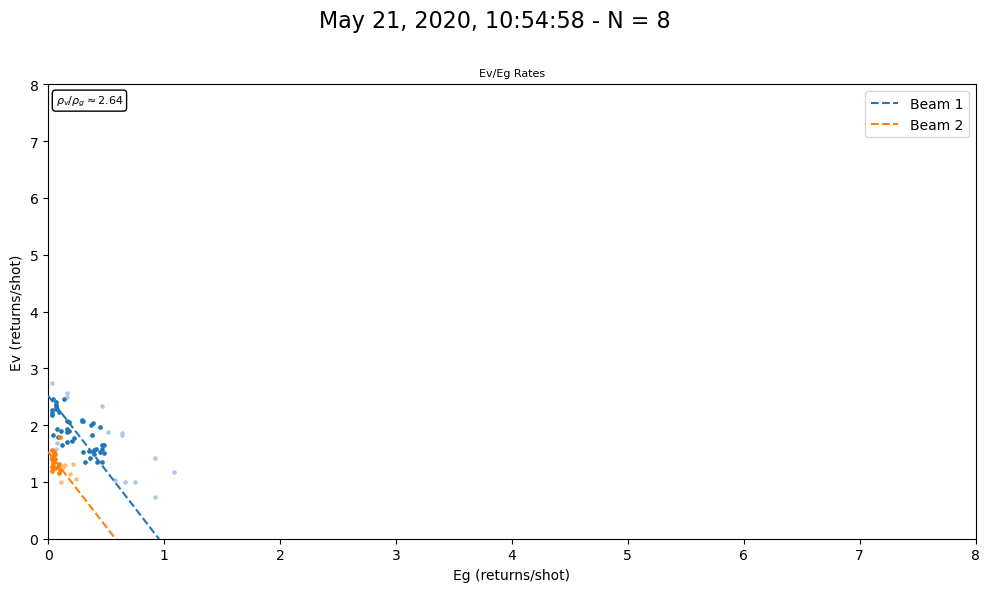

Nothing in rebinned section for torgnon file 9's beam 1.
Nothing in rebinned section for torgnon file 9's beam 2.


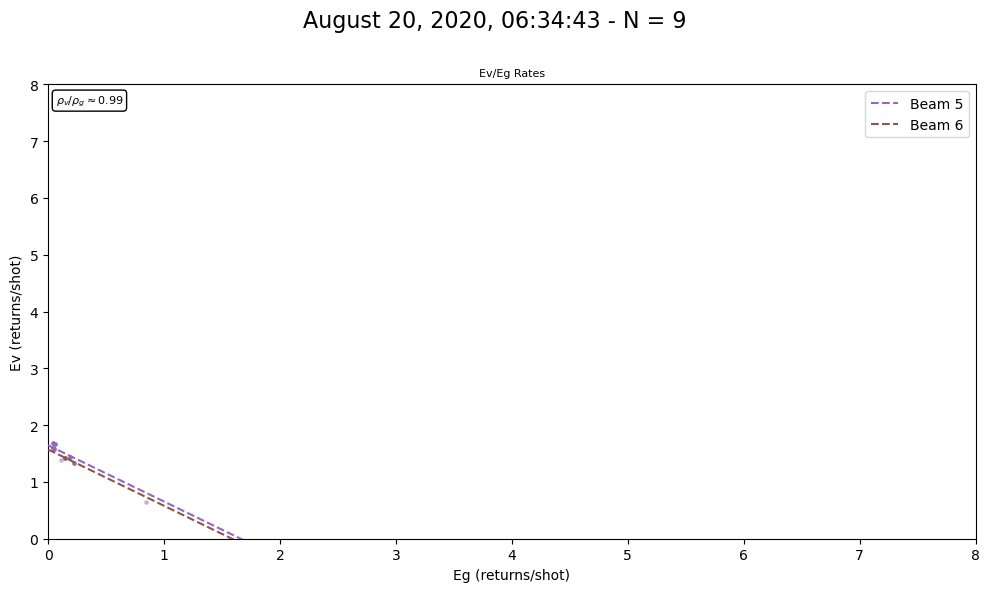

Nothing in rebinned section for torgnon file 10's beam 1.
Nothing in rebinned section for torgnon file 10's beam 2.
Nothing in rebinned section for torgnon file 10's beam 3.
Nothing in rebinned section for torgnon file 10's beam 4.


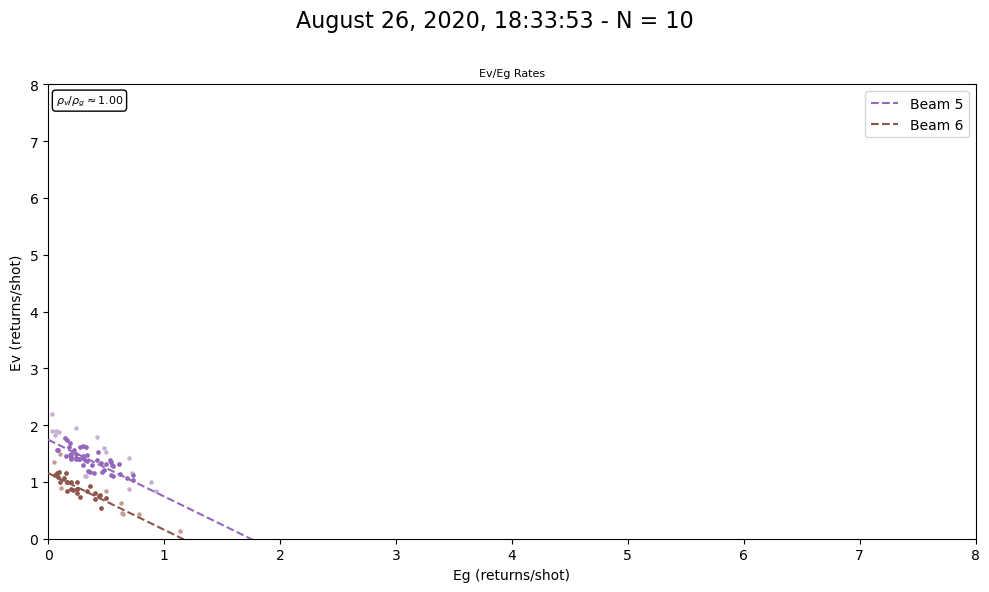

Nothing in rebinned section for torgnon file 11's beam 5.
Nothing in rebinned section for torgnon file 11's beam 6.


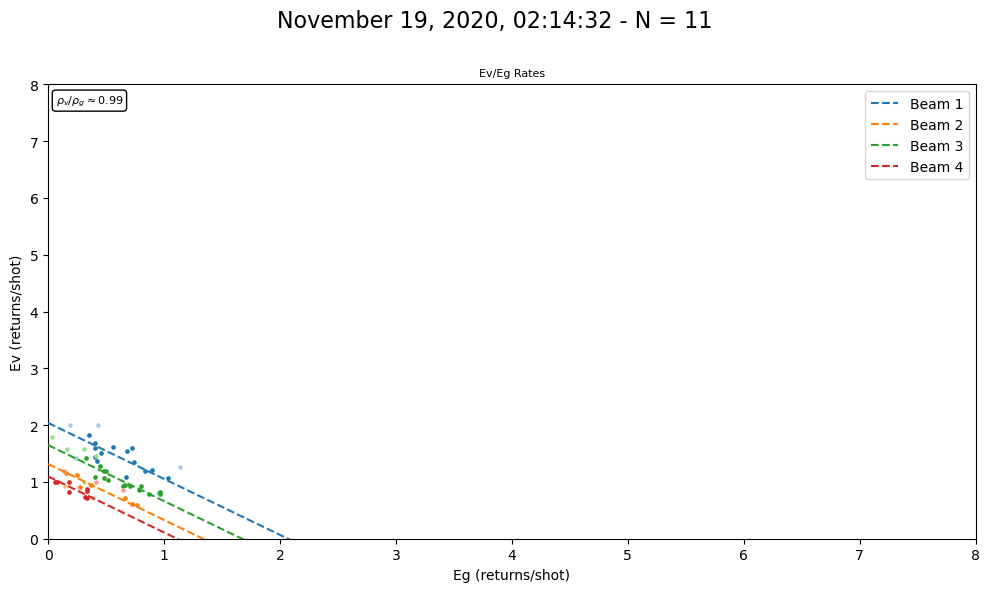

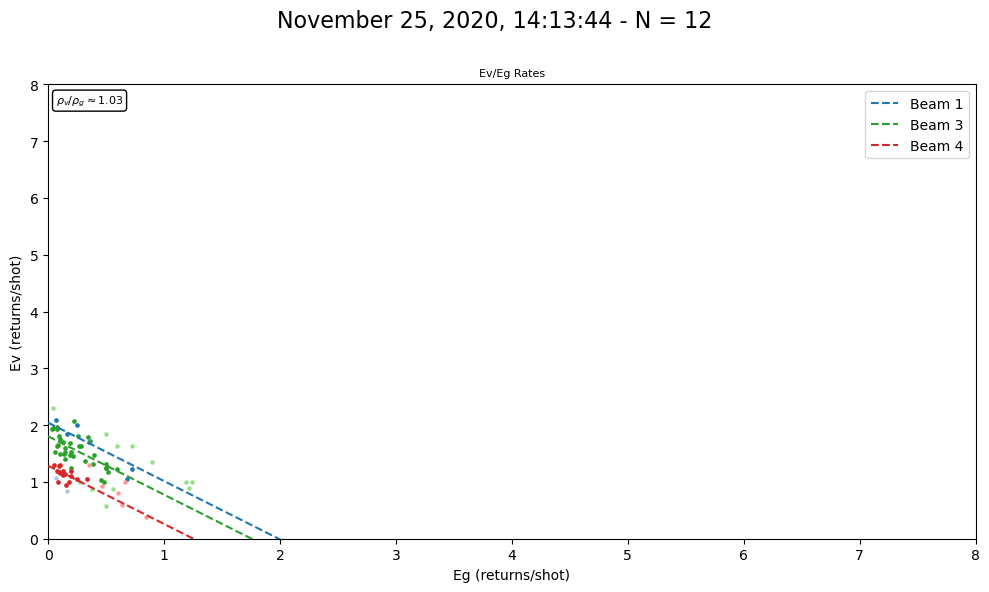

Nothing in rebinned section for torgnon file 13's beam 3.
Nothing in rebinned section for torgnon file 13's beam 4.
Nothing in rebinned section for torgnon file 13's beam 5.
Nothing in rebinned section for torgnon file 13's beam 6.
Nothing in rebinned section for torgnon file 14's beam 1.
Nothing in rebinned section for torgnon file 14's beam 2.
Nothing in rebinned section for torgnon file 14's beam 3.
Nothing in rebinned section for torgnon file 14's beam 4.


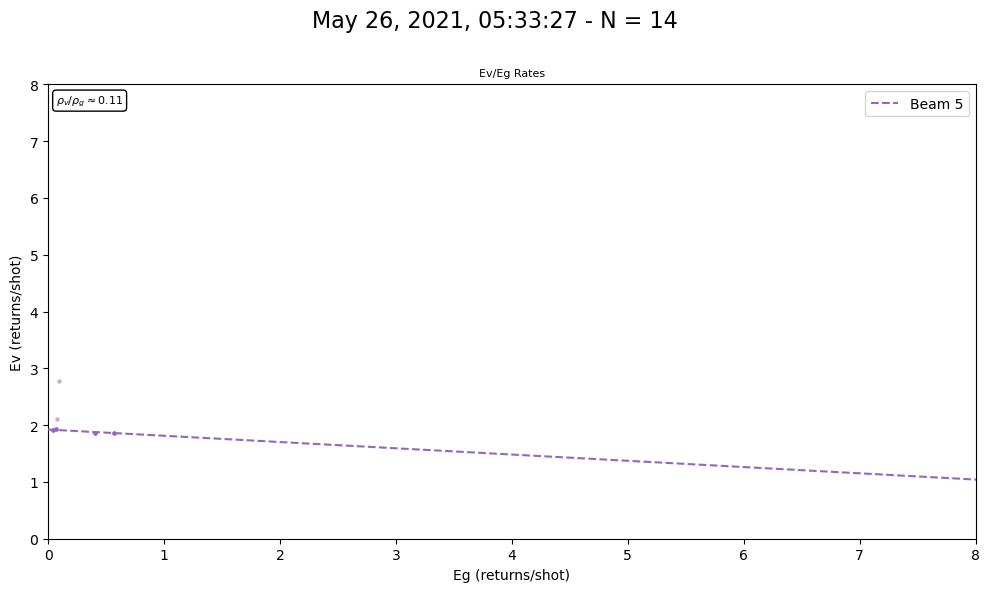

Nothing in rebinned section for torgnon file 15's beam 1.
Nothing in rebinned section for torgnon file 15's beam 2.


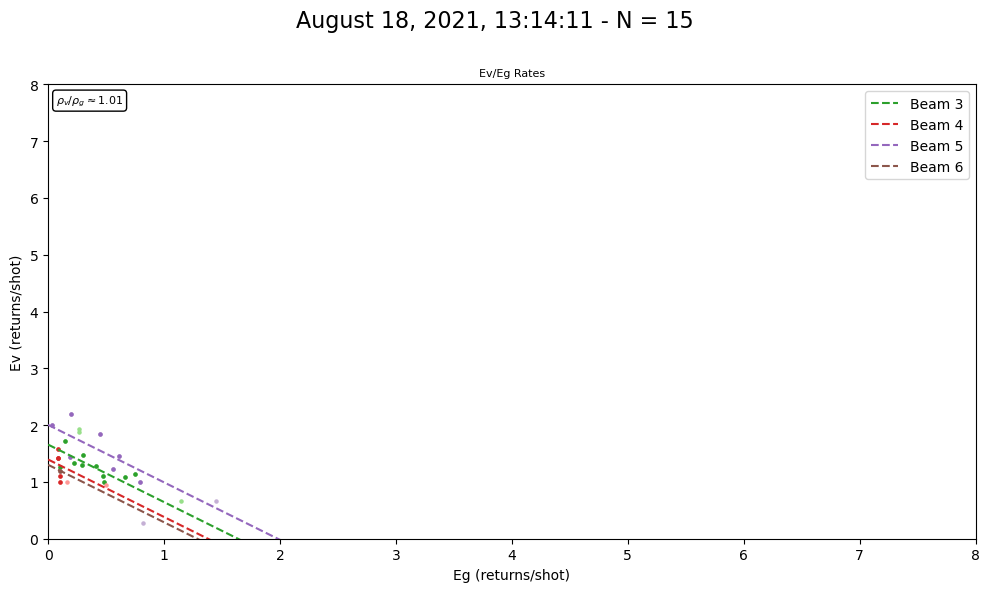

Nothing in rebinned section for torgnon file 16's beam 5.
Nothing in rebinned section for torgnon file 16's beam 6.


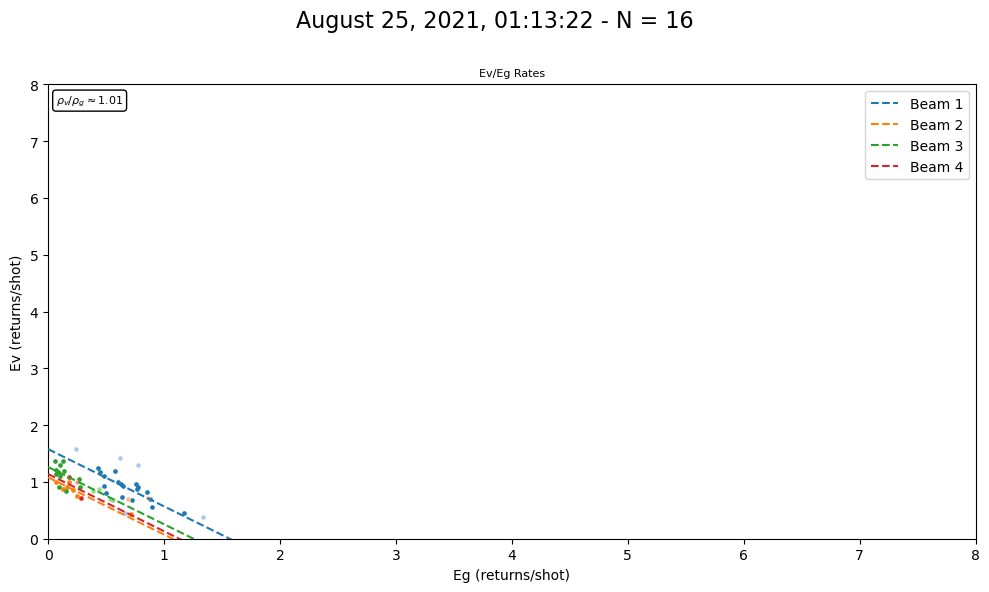

Nothing in rebinned section for torgnon file 17's beam 5.
Nothing in rebinned section for torgnon file 17's beam 6.


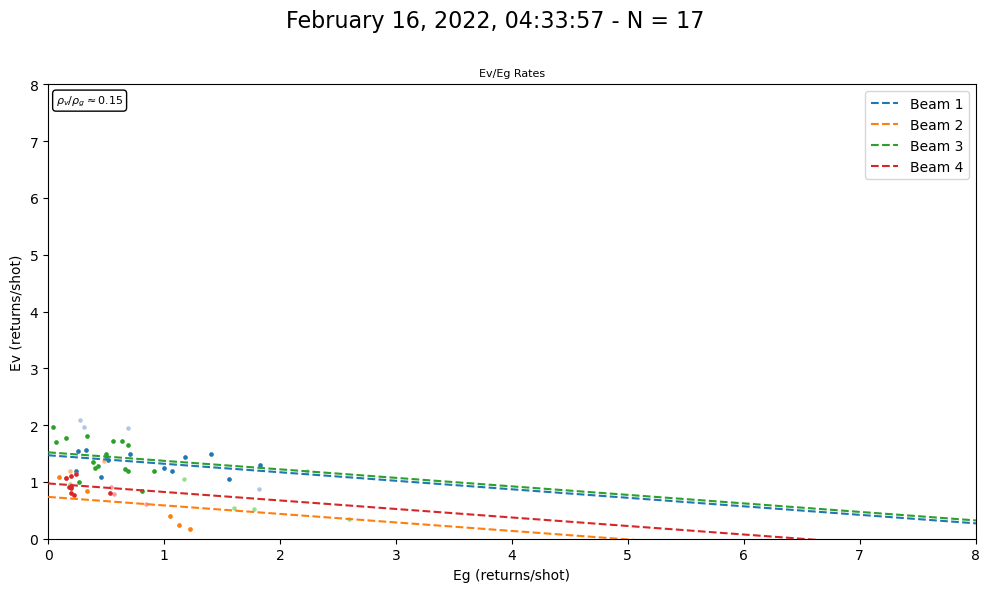

Nothing in rebinned section for torgnon file 18's beam 1.
Nothing in rebinned section for torgnon file 18's beam 2.


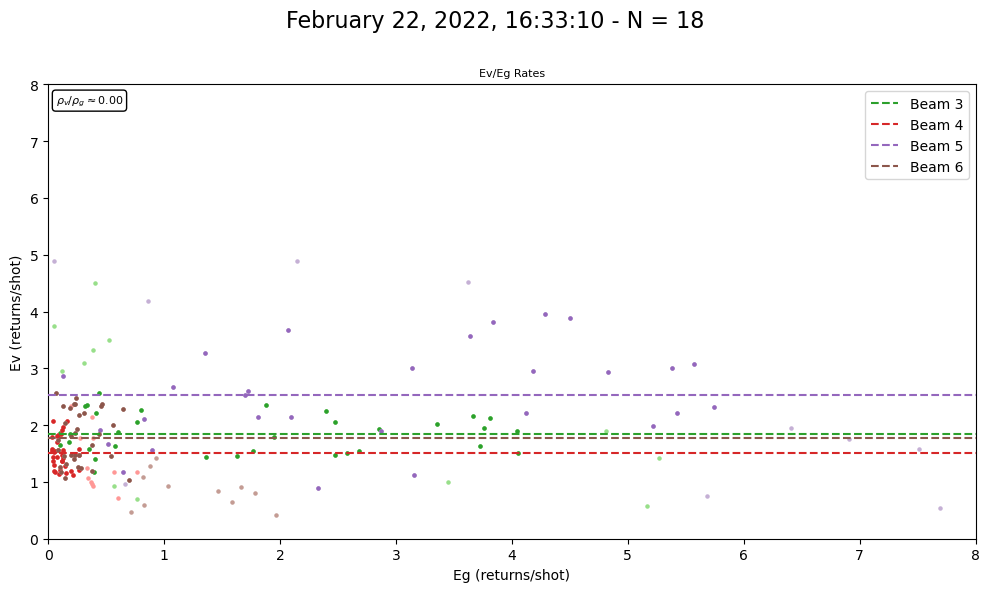

Nothing in rebinned section for torgnon file 19's beam 3.
Nothing in rebinned section for torgnon file 19's beam 4.
Nothing in rebinned section for torgnon file 19's beam 5.
Nothing in rebinned section for torgnon file 19's beam 6.
Nothing in rebinned section for torgnon file 20's beam 1.
Nothing in rebinned section for torgnon file 20's beam 2.
Nothing in rebinned section for torgnon file 20's beam 3.
Nothing in rebinned section for torgnon file 20's beam 4.


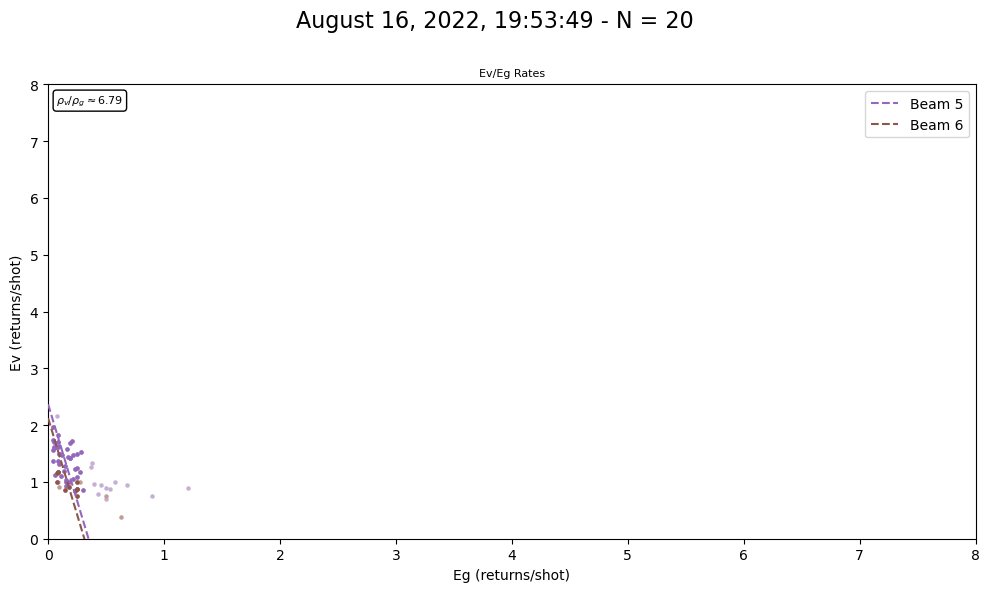

Nothing in rebinned section for torgnon file 21's beam 1.
Nothing in rebinned section for torgnon file 21's beam 2.


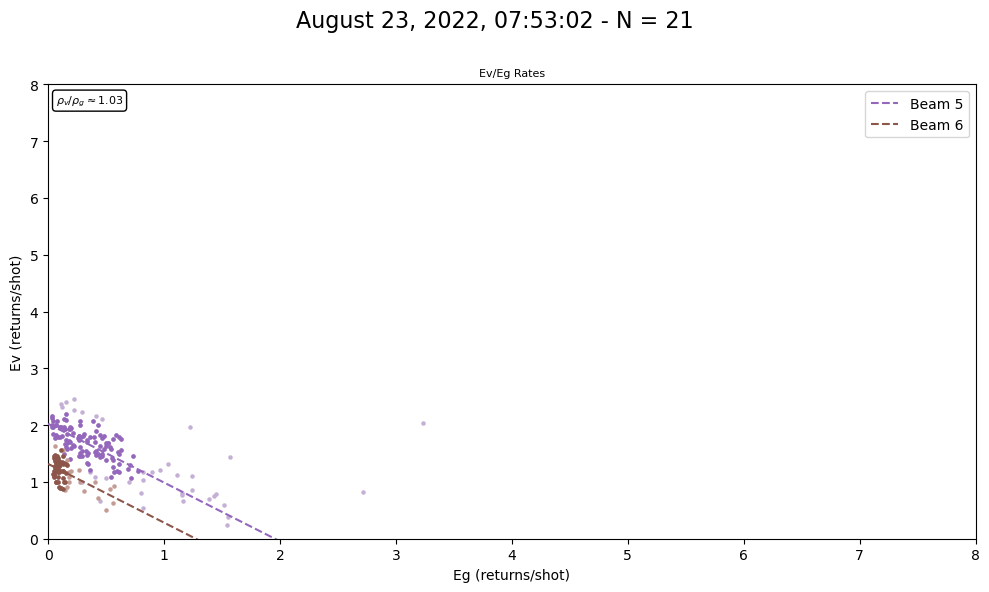

Nothing in rebinned section for torgnon file 22's beam 5.
Nothing in rebinned section for torgnon file 22's beam 6.


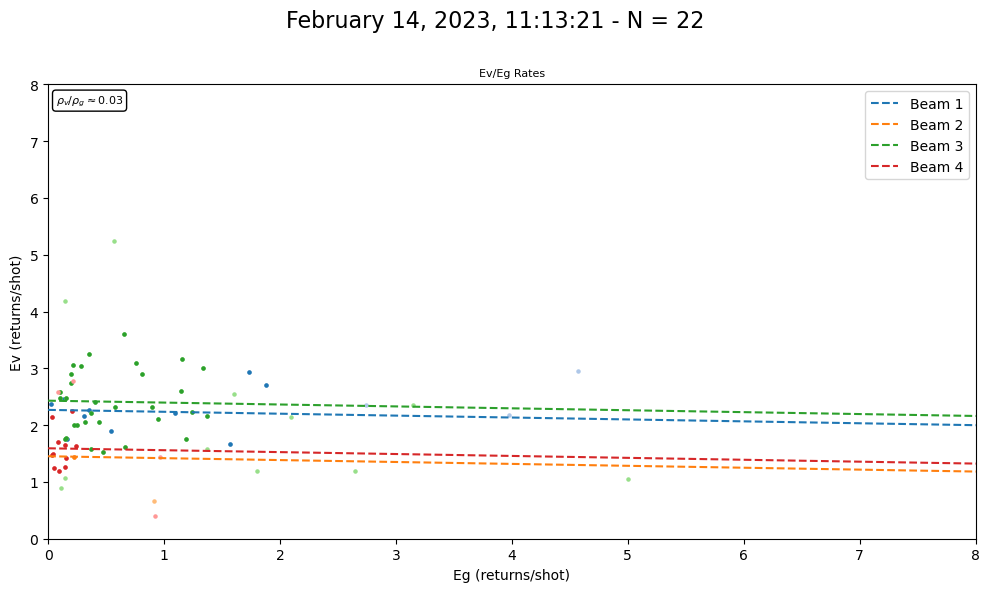

Nothing in rebinned section for torgnon file 23's beam 1.
Nothing in rebinned section for torgnon file 23's beam 2.


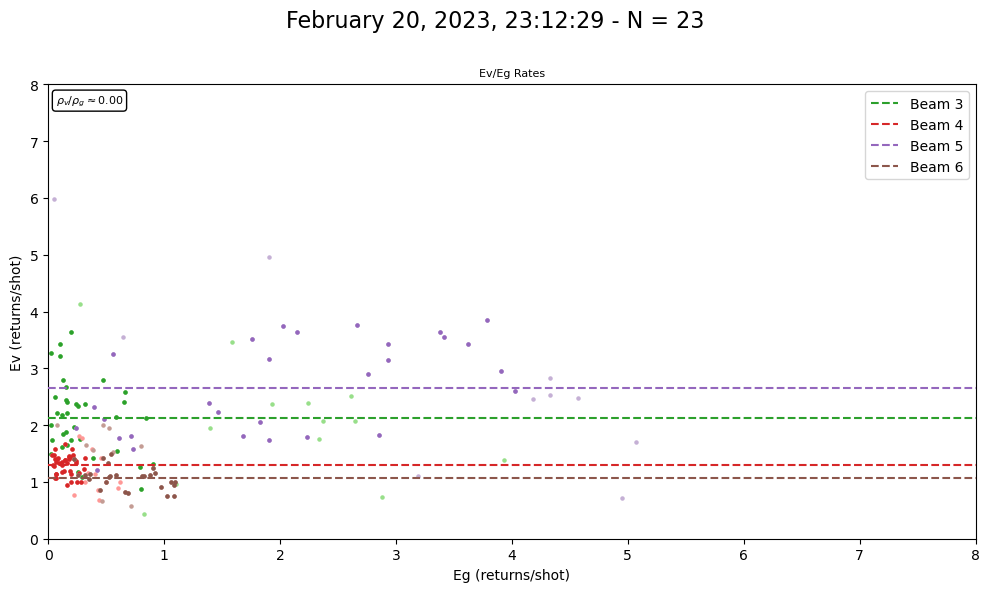

Nothing in rebinned section for torgnon file 24's beam 3.
Nothing in rebinned section for torgnon file 24's beam 4.
Nothing in rebinned section for torgnon file 24's beam 5.
Nothing in rebinned section for torgnon file 24's beam 6.


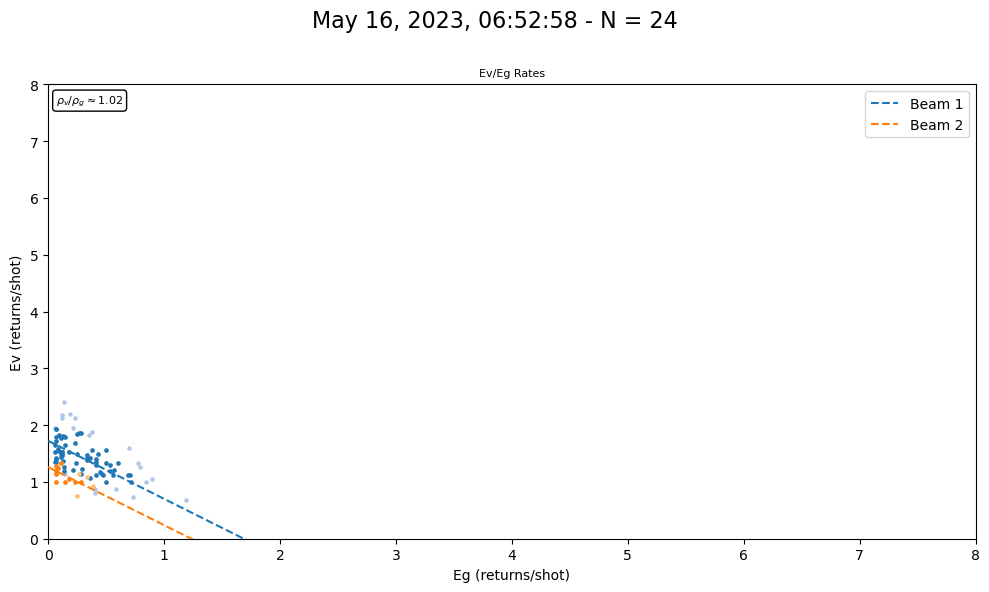

Nothing in rebinned section for torgnon file 25's beam 1.
Nothing in rebinned section for torgnon file 25's beam 2.
Nothing in rebinned section for torgnon file 25's beam 4.
Nothing in rebinned section for torgnon file 25's beam 5.
Nothing in rebinned section for torgnon file 25's beam 6.
Nothing in rebinned section for torgnon file 26's beam 2.


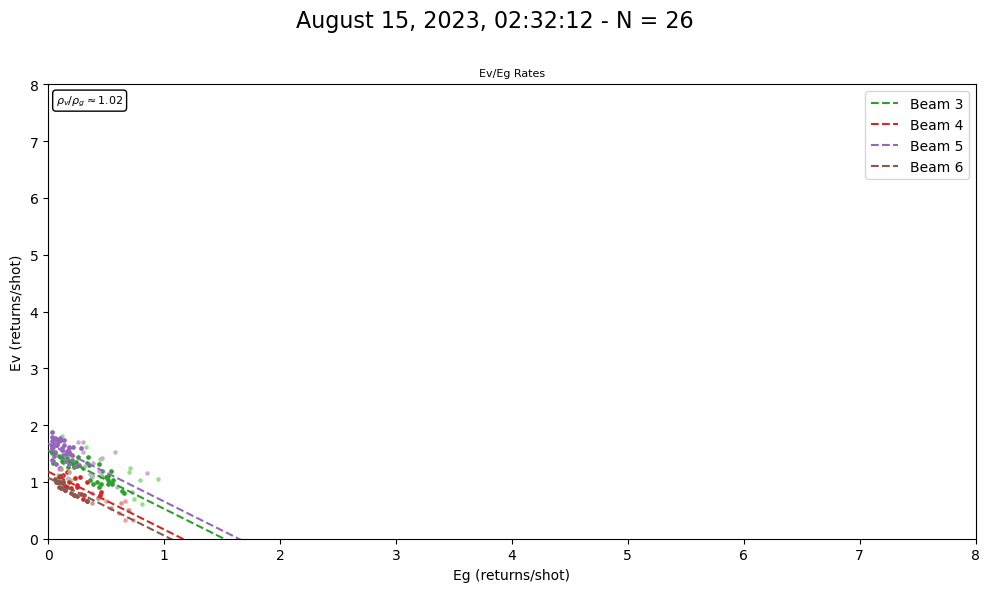

Nothing in rebinned section for torgnon file 27's beam 1.
Nothing in rebinned section for torgnon file 27's beam 2.
Nothing in rebinned section for torgnon file 27's beam 3.
Nothing in rebinned section for torgnon file 27's beam 4.


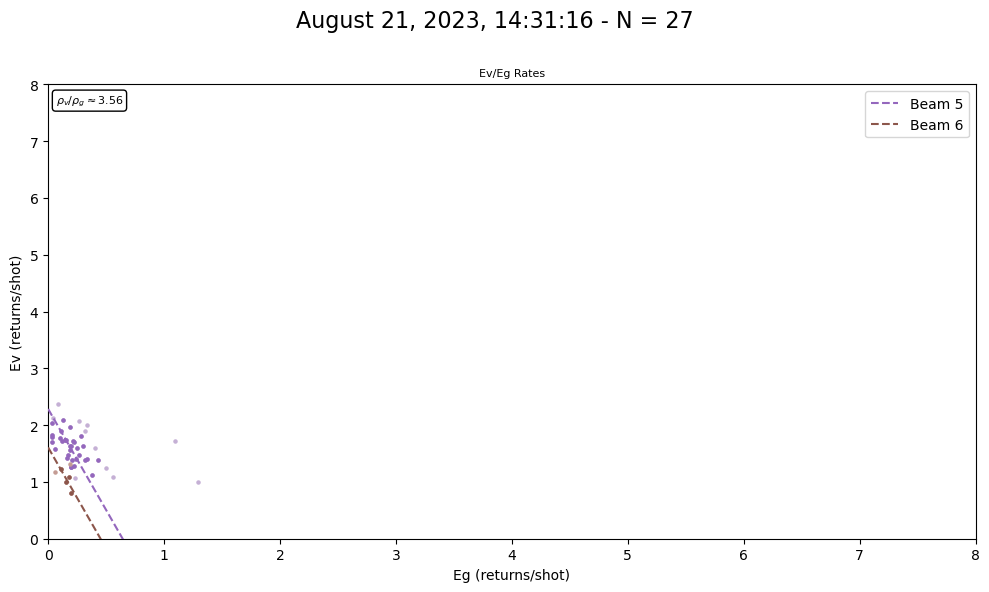

Nothing in rebinned section for torgnon file 28's beam 1.
Nothing in rebinned section for torgnon file 28's beam 2.
Nothing in rebinned section for torgnon file 28's beam 3.
Nothing in rebinned section for torgnon file 28's beam 4.
Nothing in rebinned section for torgnon file 28's beam 6.
Nothing in rebinned section for torgnon file 29's beam 5.
Nothing in rebinned section for torgnon file 29's beam 6.


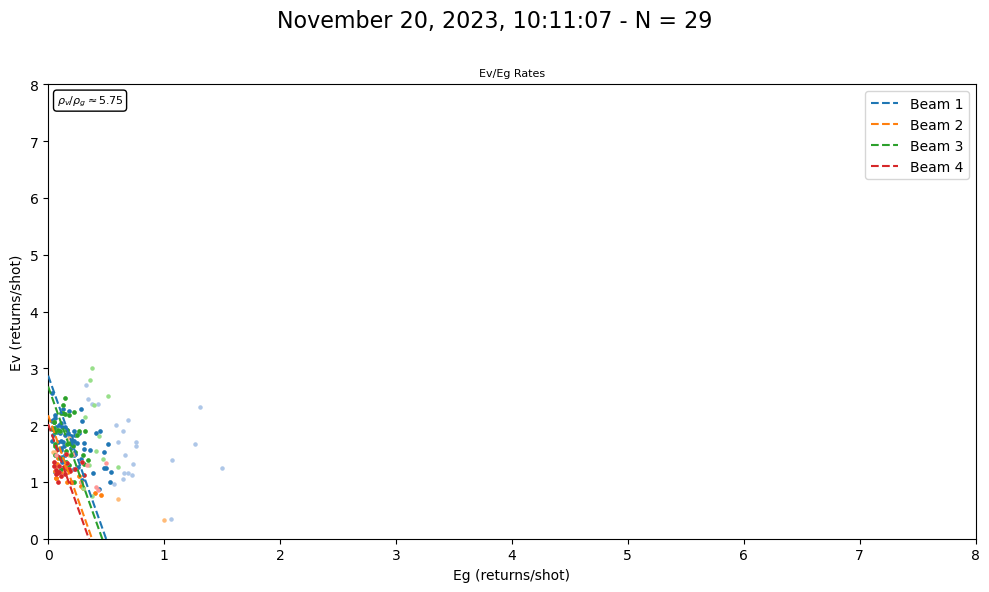

Nothing in rebinned section for torgnon file 30's beam 1.
Nothing in rebinned section for torgnon file 30's beam 2.


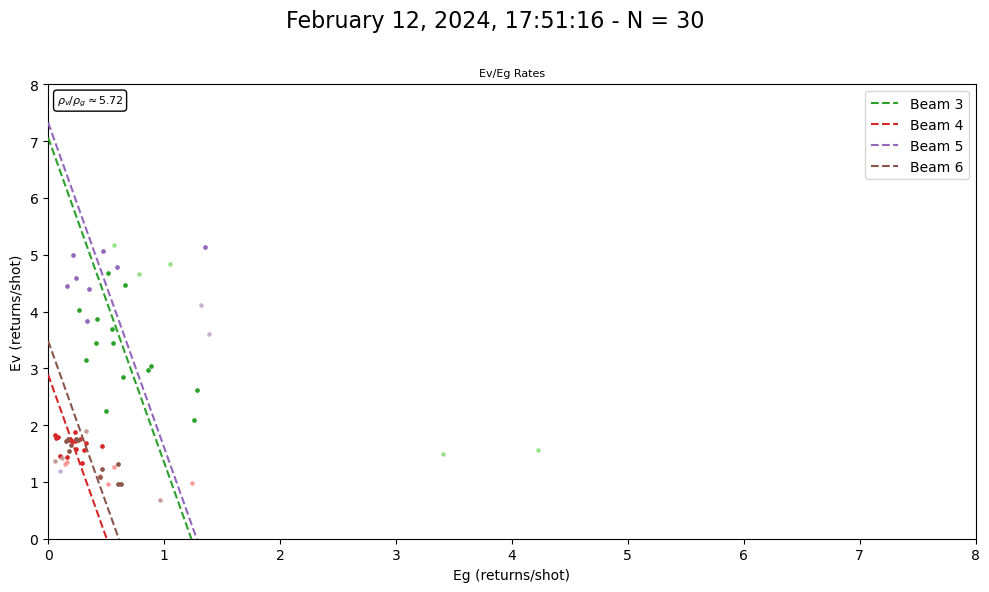

Nothing in rebinned section for torgnon file 31's beam 5.
Nothing in rebinned section for torgnon file 31's beam 6.


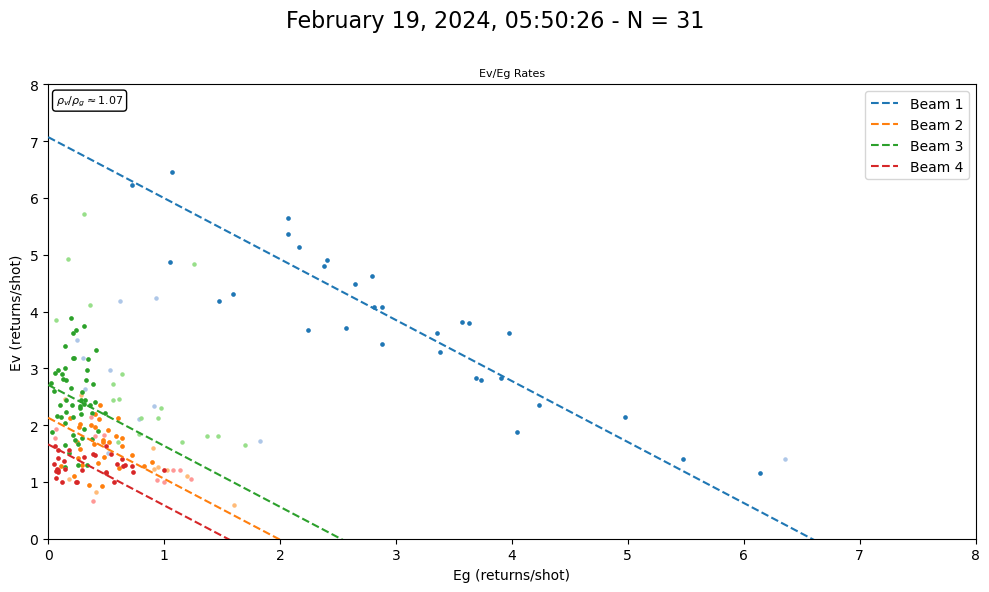

In [6]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/torgnon/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (7.5609, 45.8238)

for i in range(N):
# for i in [3,4,5,7,8]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=2091, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=2091, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=.25,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=2091, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)

# Oregon Young Pine

29
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.


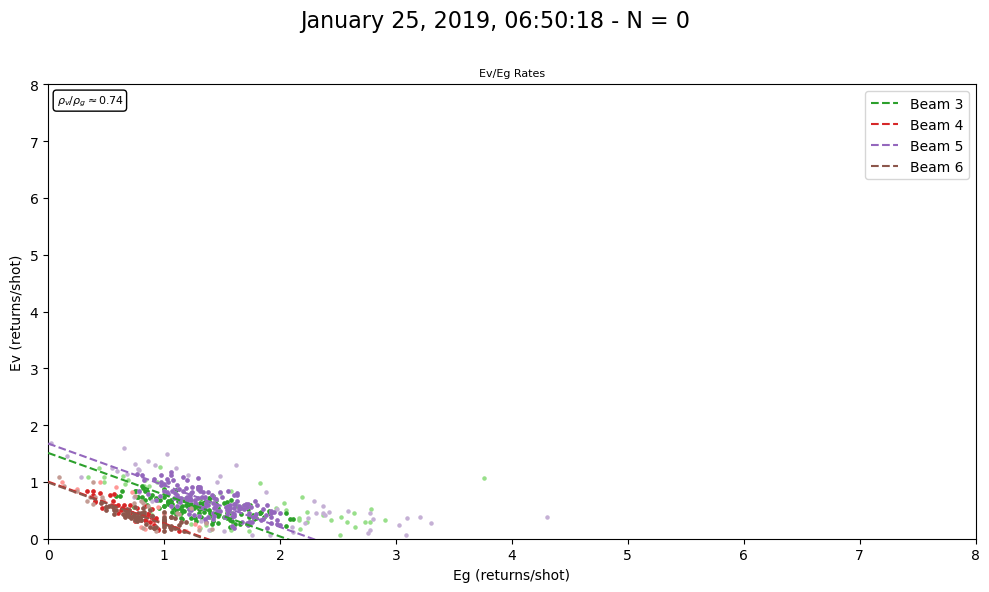

Nothing in rebinned section for oregon_yp file 1's beam 1.
Nothing in rebinned section for oregon_yp file 1's beam 2.
Nothing in rebinned section for oregon_yp file 1's beam 3.
Nothing in rebinned section for oregon_yp file 1's beam 4.
Nothing in rebinned section for oregon_yp file 1's beam 5.
Nothing in rebinned section for oregon_yp file 1's beam 6.
Nothing in rebinned section for oregon_yp file 2's beam 1.
Nothing in rebinned section for oregon_yp file 2's beam 2.
Nothing in rebinned section for oregon_yp file 2's beam 3.
Nothing in rebinned section for oregon_yp file 2's beam 4.


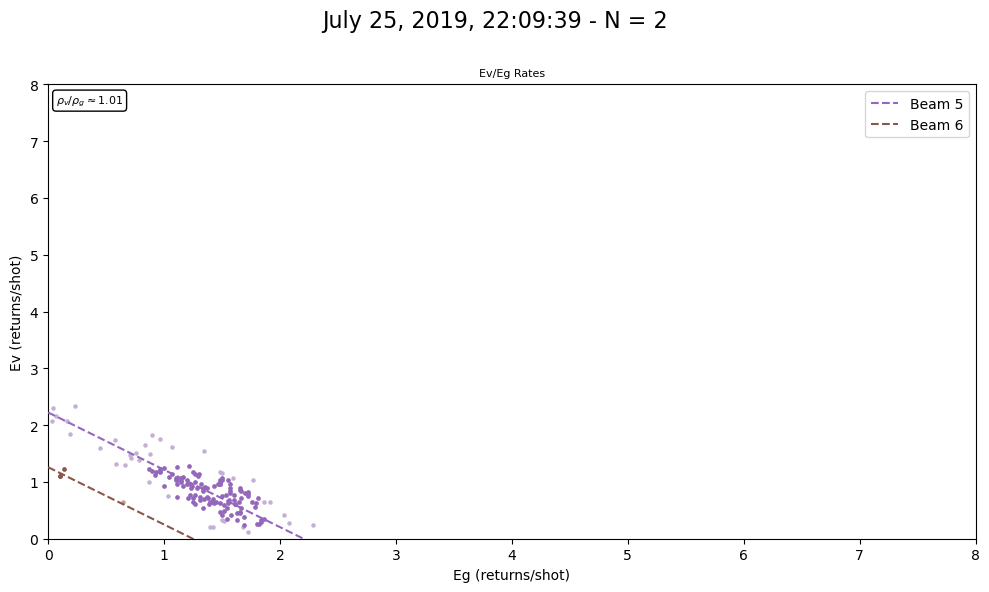

Nothing in rebinned section for oregon_yp file 3's beam 3.
Nothing in rebinned section for oregon_yp file 3's beam 4.
Nothing in rebinned section for oregon_yp file 3's beam 5.
Nothing in rebinned section for oregon_yp file 3's beam 6.


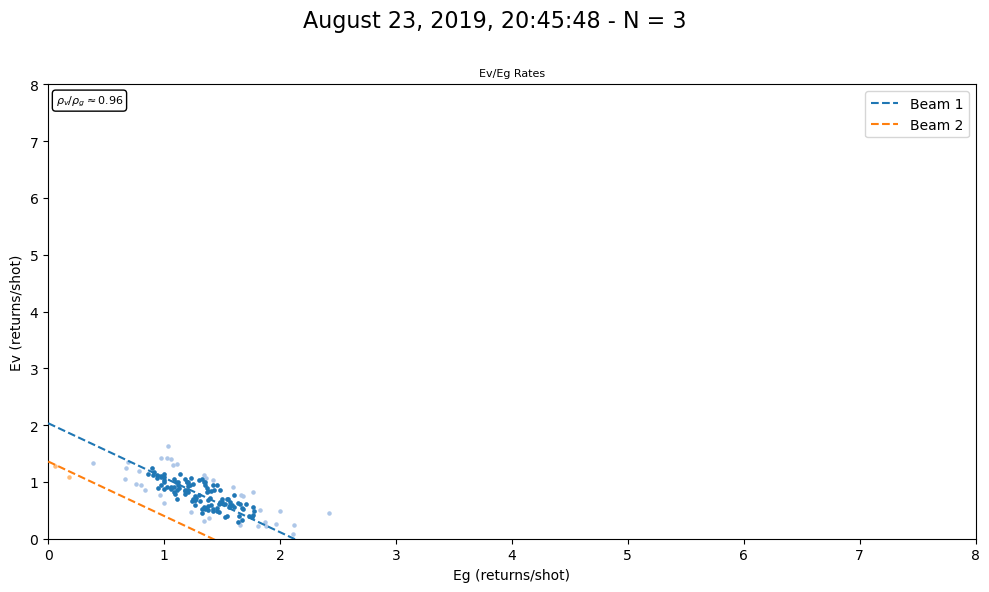

Nothing in rebinned section for oregon_yp file 4's beam 1.
Nothing in rebinned section for oregon_yp file 4's beam 2.
Nothing in rebinned section for oregon_yp file 4's beam 3.
Nothing in rebinned section for oregon_yp file 4's beam 4.
Nothing in rebinned section for oregon_yp file 4's beam 5.
Nothing in rebinned section for oregon_yp file 4's beam 6.
Nothing in rebinned section for oregon_yp file 5's beam 1.
Nothing in rebinned section for oregon_yp file 5's beam 2.
Nothing in rebinned section for oregon_yp file 5's beam 3.
Nothing in rebinned section for oregon_yp file 5's beam 4.


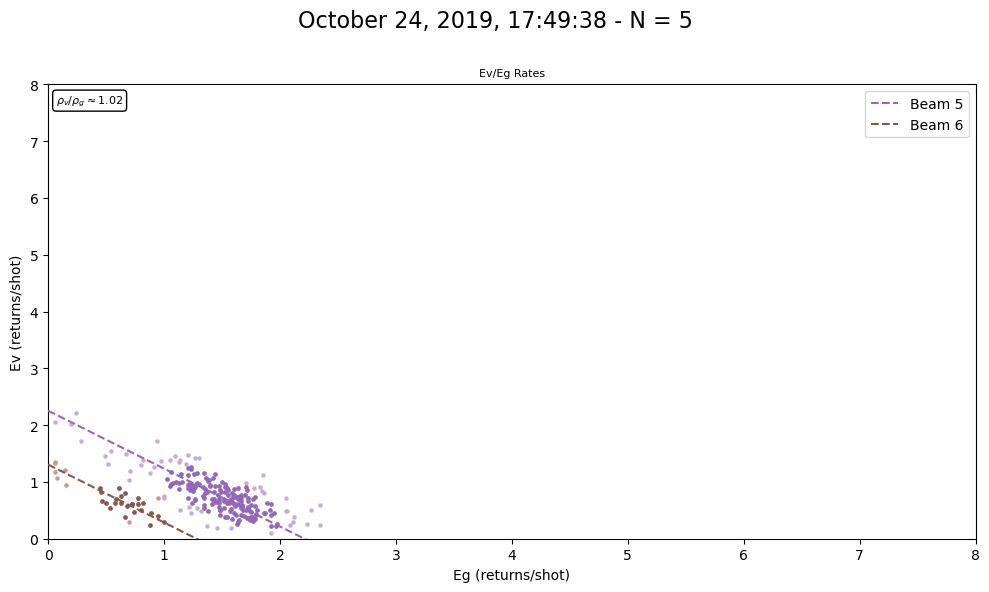

Nothing in rebinned section for oregon_yp file 6's beam 3.
Nothing in rebinned section for oregon_yp file 6's beam 4.
Nothing in rebinned section for oregon_yp file 6's beam 5.
Nothing in rebinned section for oregon_yp file 6's beam 6.


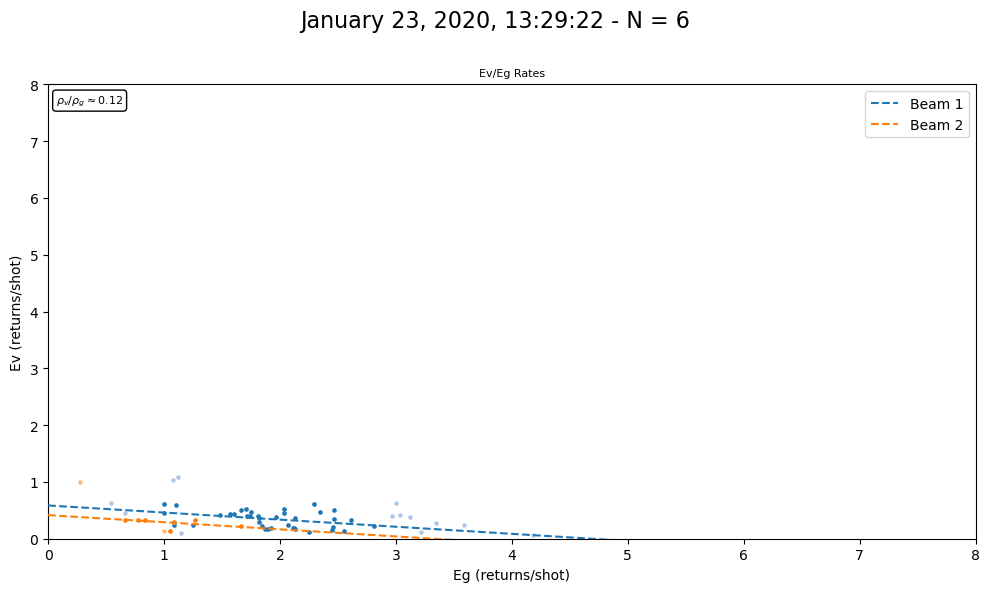

Nothing in rebinned section for oregon_yp file 7's beam 1.
Nothing in rebinned section for oregon_yp file 7's beam 2.
Nothing in rebinned section for oregon_yp file 7's beam 3.
Nothing in rebinned section for oregon_yp file 7's beam 4.
Nothing in rebinned section for oregon_yp file 8's beam 3.
Nothing in rebinned section for oregon_yp file 8's beam 4.
Nothing in rebinned section for oregon_yp file 8's beam 5.
Nothing in rebinned section for oregon_yp file 8's beam 6.


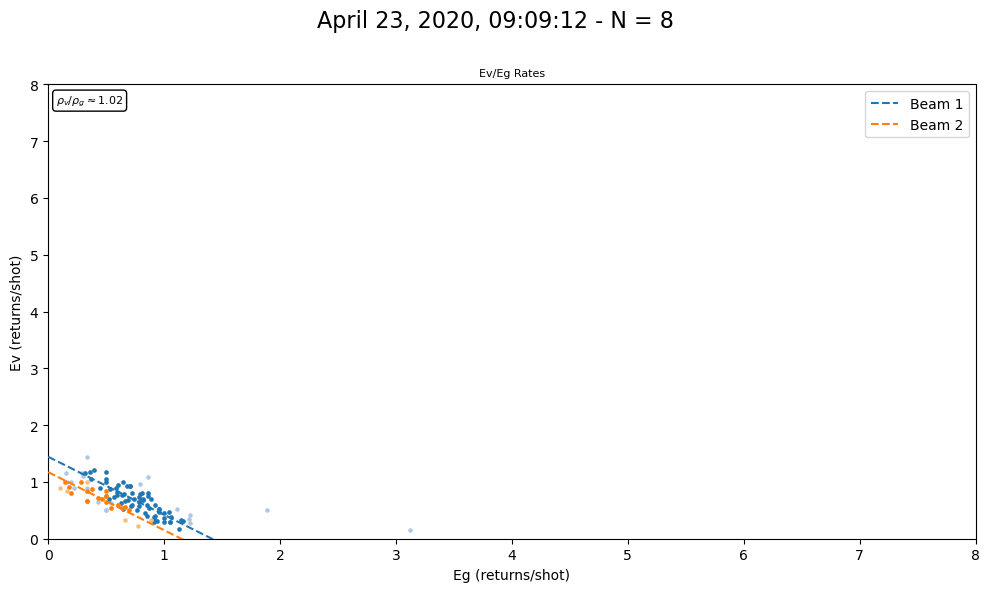

Nothing in rebinned section for oregon_yp file 9's beam 1.
Nothing in rebinned section for oregon_yp file 9's beam 2.


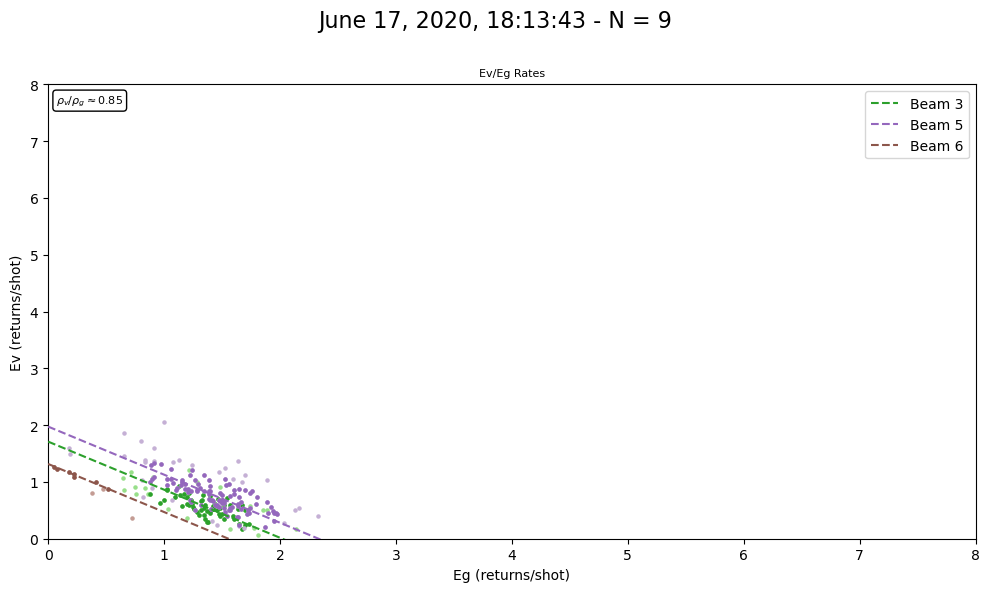

Nothing in rebinned section for oregon_yp file 10's beam 1.
Nothing in rebinned section for oregon_yp file 10's beam 2.
Nothing in rebinned section for oregon_yp file 10's beam 3.
Nothing in rebinned section for oregon_yp file 10's beam 4.


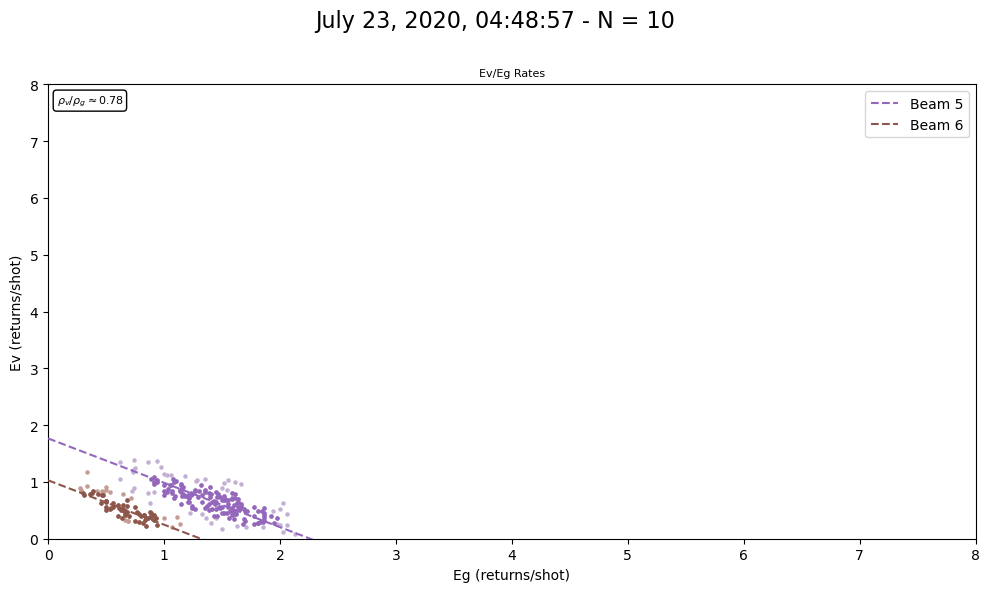

Nothing in rebinned section for oregon_yp file 11's beam 1.
Nothing in rebinned section for oregon_yp file 11's beam 2.


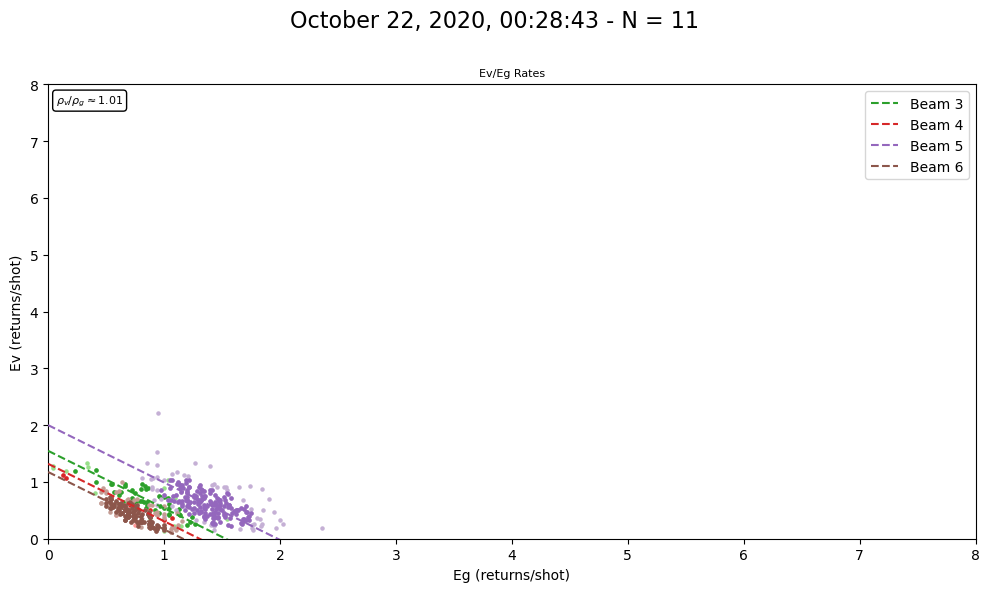

Nothing in rebinned section for oregon_yp file 12's beam 1.
Nothing in rebinned section for oregon_yp file 12's beam 2.
Nothing in rebinned section for oregon_yp file 12's beam 3.
Nothing in rebinned section for oregon_yp file 12's beam 4.


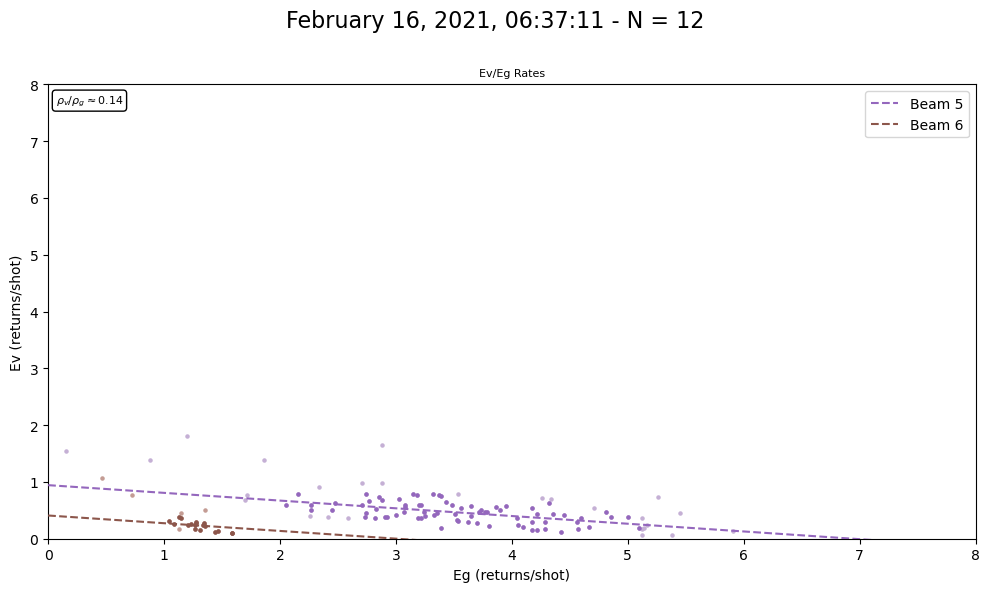

Nothing in rebinned section for oregon_yp file 13's beam 1.
Nothing in rebinned section for oregon_yp file 13's beam 2.


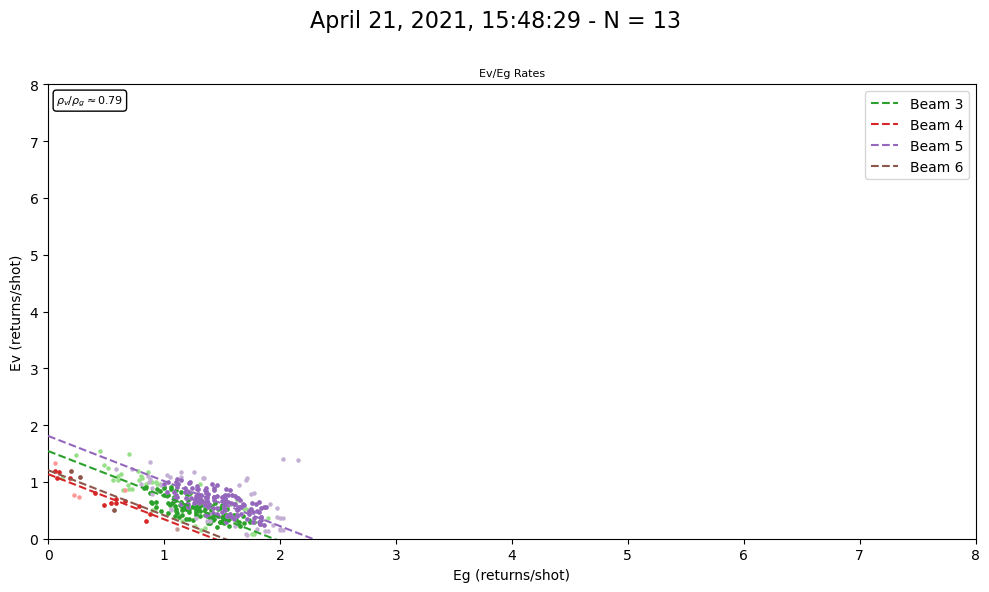

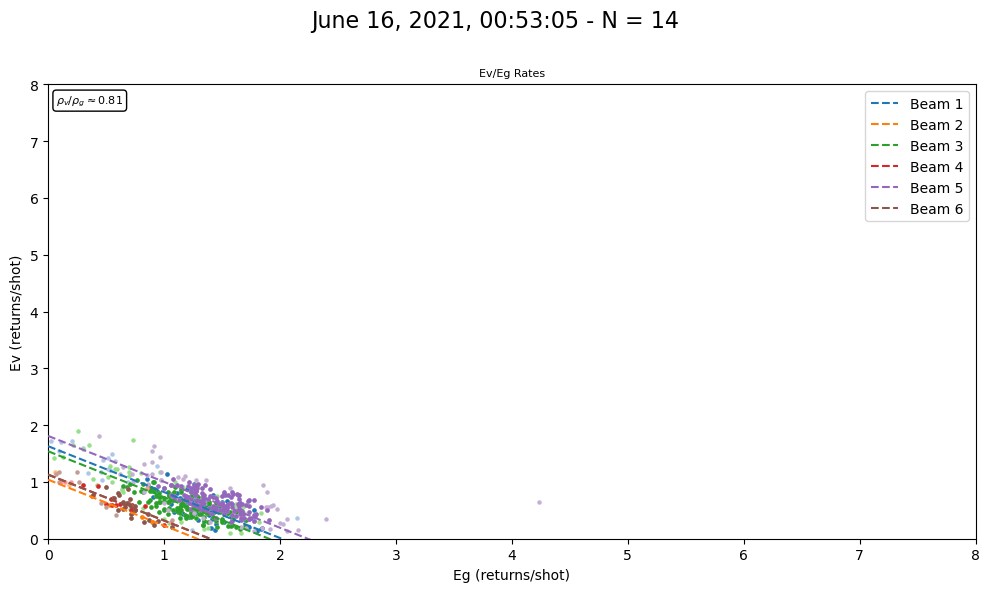

Nothing in rebinned section for oregon_yp file 15's beam 3.
Nothing in rebinned section for oregon_yp file 15's beam 4.
Nothing in rebinned section for oregon_yp file 15's beam 5.
Nothing in rebinned section for oregon_yp file 15's beam 6.


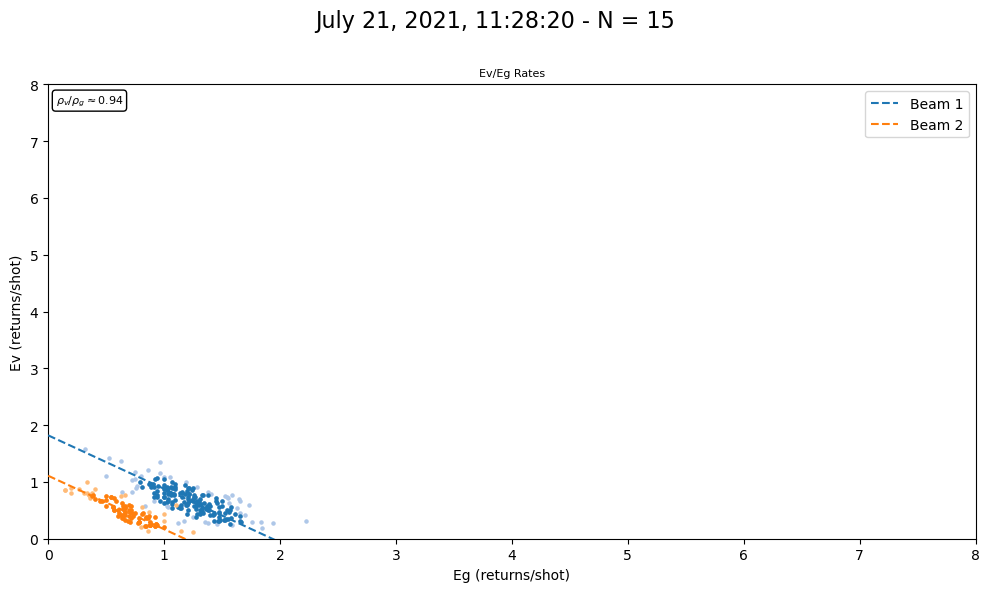

Nothing in rebinned section for oregon_yp file 16's beam 1.
Nothing in rebinned section for oregon_yp file 16's beam 2.
Nothing in rebinned section for oregon_yp file 16's beam 3.
Nothing in rebinned section for oregon_yp file 16's beam 4.
Nothing in rebinned section for oregon_yp file 16's beam 5.
Nothing in rebinned section for oregon_yp file 16's beam 6.
Nothing in rebinned section for oregon_yp file 17's beam 1.
Nothing in rebinned section for oregon_yp file 17's beam 2.
Nothing in rebinned section for oregon_yp file 17's beam 5.
Nothing in rebinned section for oregon_yp file 17's beam 6.


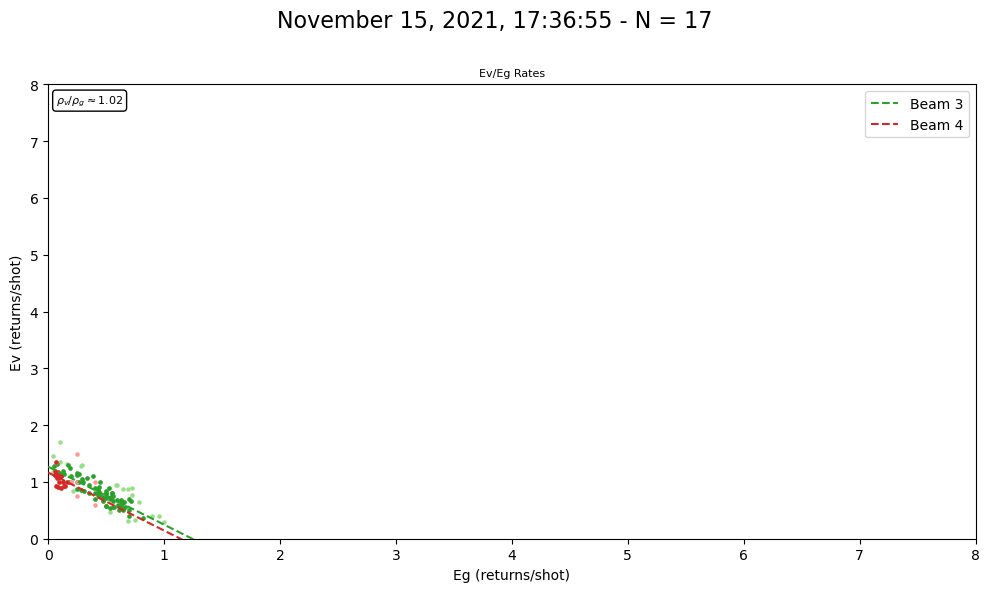

Nothing in rebinned section for oregon_yp file 18's beam 1.
Nothing in rebinned section for oregon_yp file 18's beam 2.
Nothing in rebinned section for oregon_yp file 18's beam 3.
Nothing in rebinned section for oregon_yp file 18's beam 4.


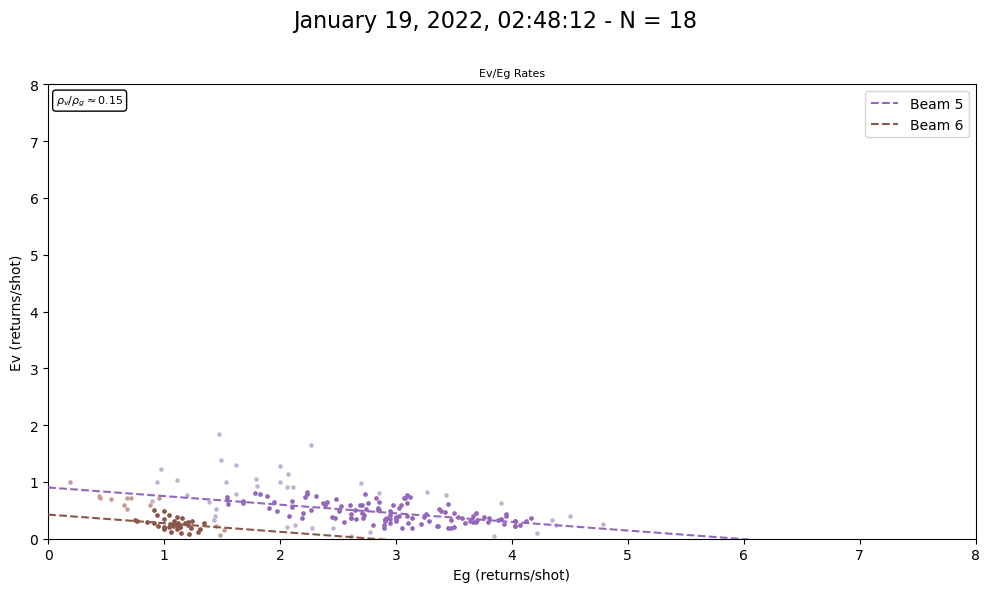

Nothing in rebinned section for oregon_yp file 19's beam 1.
Nothing in rebinned section for oregon_yp file 19's beam 2.
Nothing in rebinned section for oregon_yp file 19's beam 3.
Nothing in rebinned section for oregon_yp file 19's beam 4.


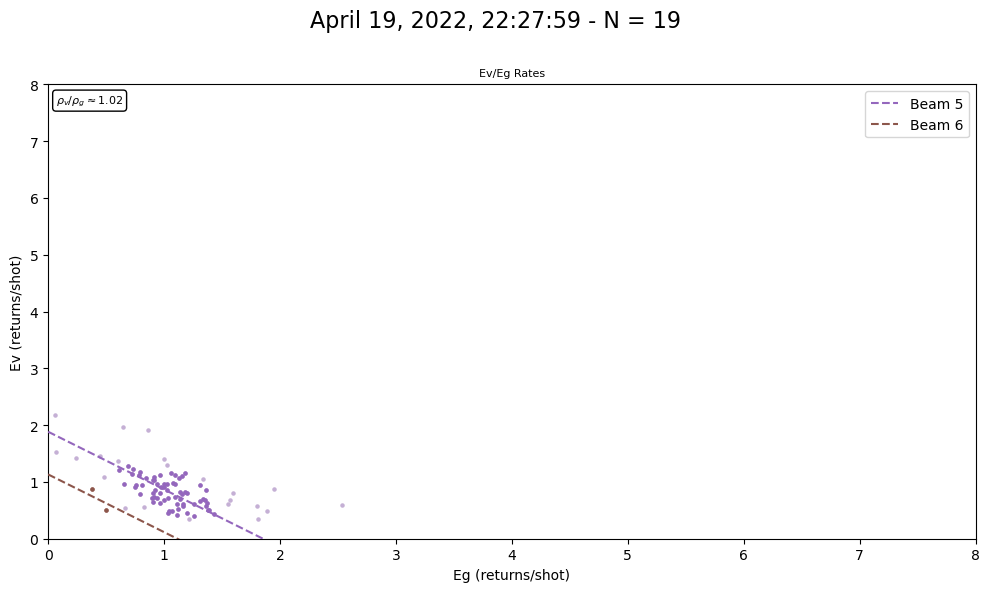

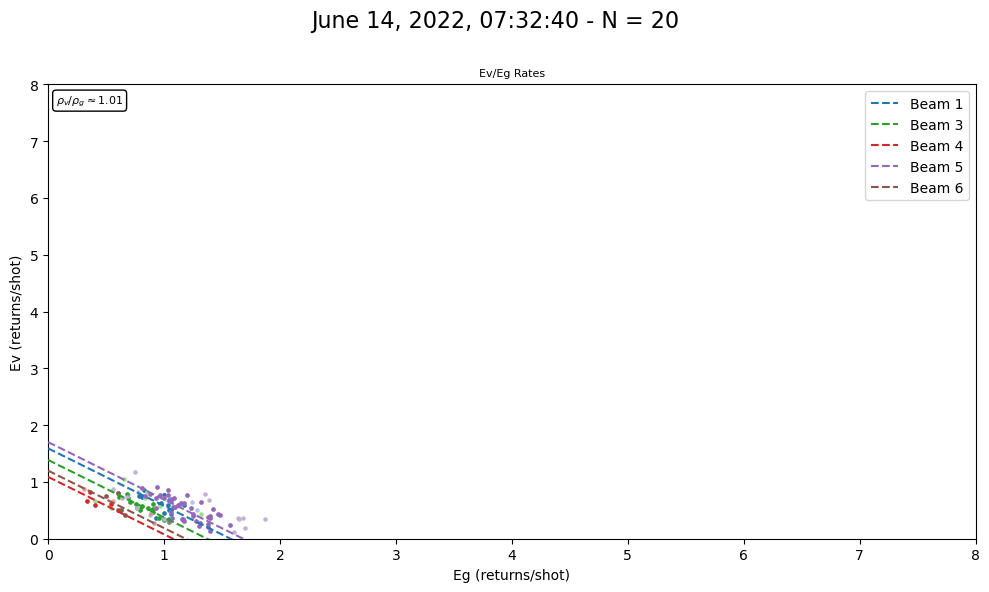

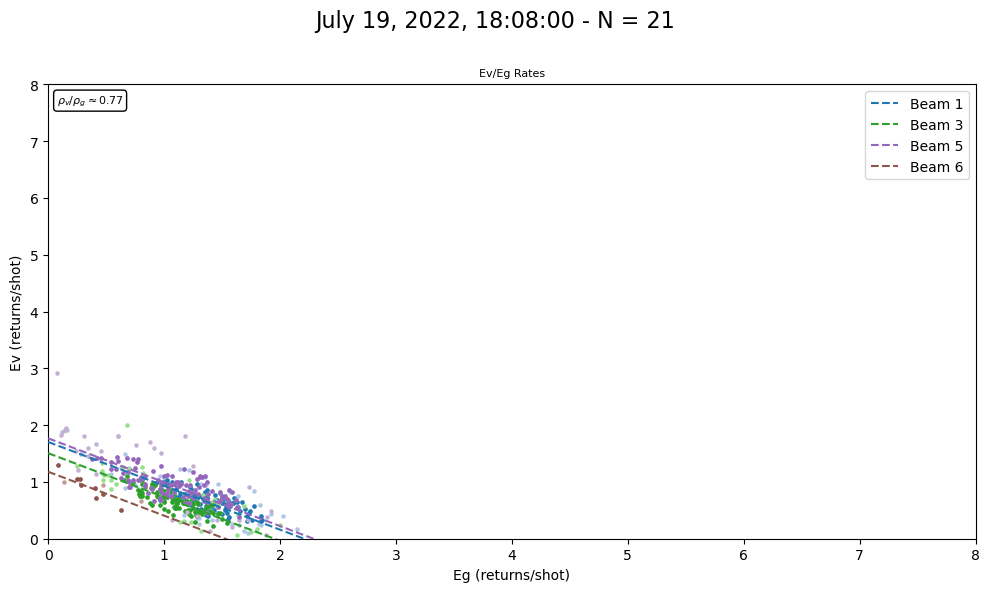

Nothing in rebinned section for oregon_yp file 22's beam 2.
Nothing in rebinned section for oregon_yp file 22's beam 3.
Nothing in rebinned section for oregon_yp file 22's beam 4.
Nothing in rebinned section for oregon_yp file 22's beam 5.
Nothing in rebinned section for oregon_yp file 22's beam 6.


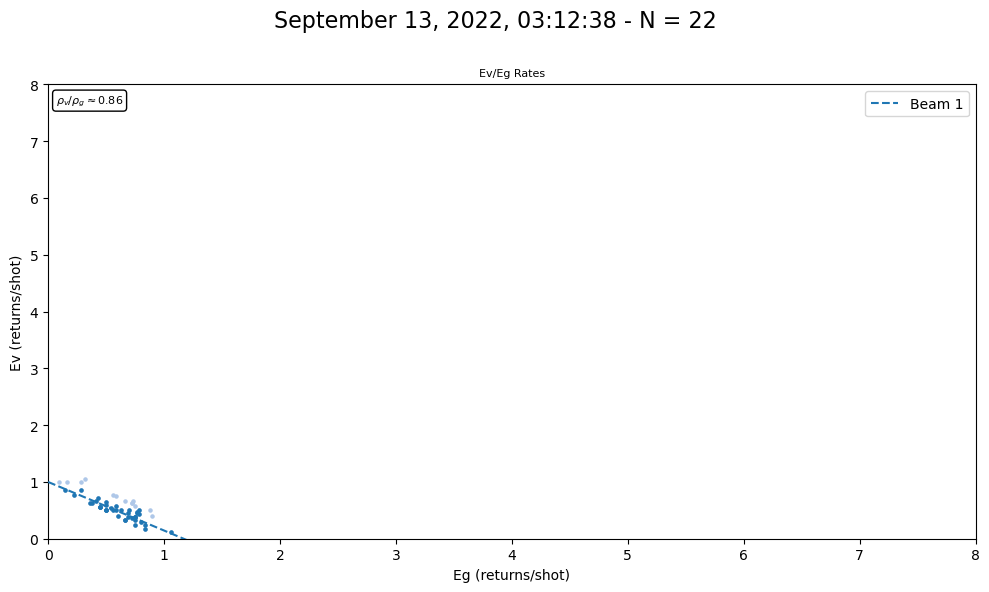

Nothing in rebinned section for oregon_yp file 23's beam 1.
Nothing in rebinned section for oregon_yp file 23's beam 2.
Nothing in rebinned section for oregon_yp file 23's beam 3.
Nothing in rebinned section for oregon_yp file 23's beam 4.
Nothing in rebinned section for oregon_yp file 23's beam 5.
Nothing in rebinned section for oregon_yp file 23's beam 6.
Nothing in rebinned section for oregon_yp file 24's beam 1.
Nothing in rebinned section for oregon_yp file 24's beam 2.


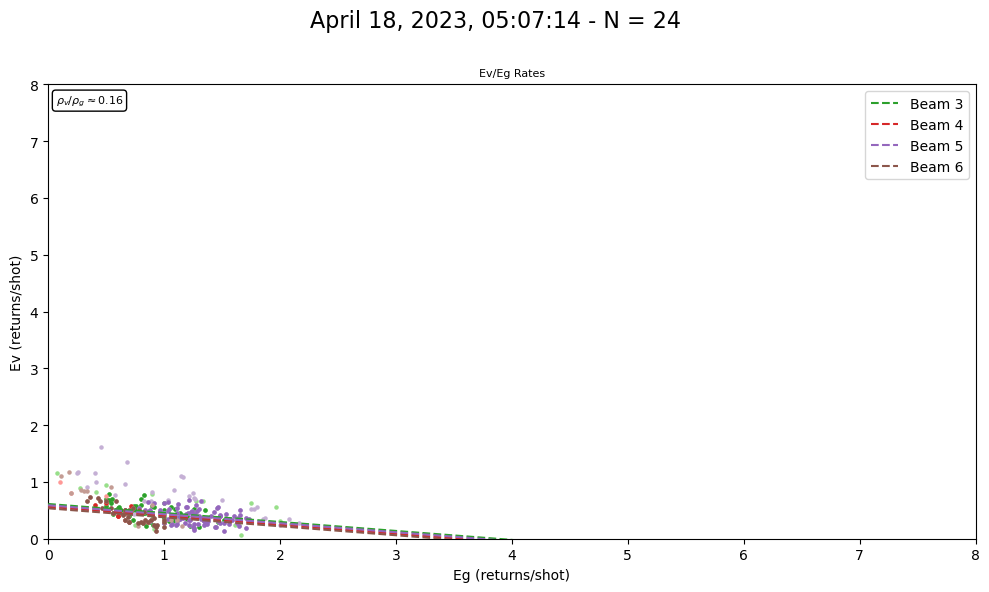

Nothing in rebinned section for oregon_yp file 25's beam 1.
Nothing in rebinned section for oregon_yp file 25's beam 2.


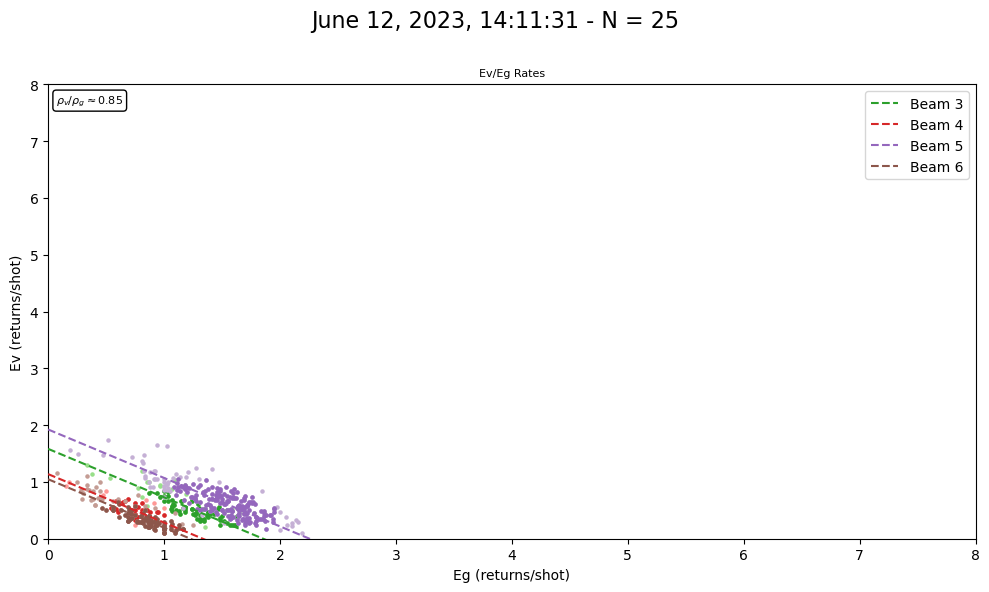

Nothing in rebinned section for oregon_yp file 26's beam 1.
Nothing in rebinned section for oregon_yp file 26's beam 2.
Nothing in rebinned section for oregon_yp file 26's beam 3.
Nothing in rebinned section for oregon_yp file 26's beam 4.
Nothing in rebinned section for oregon_yp file 26's beam 5.
Nothing in rebinned section for oregon_yp file 26's beam 6.
Nothing in rebinned section for oregon_yp file 27's beam 1.
Nothing in rebinned section for oregon_yp file 27's beam 2.
Nothing in rebinned section for oregon_yp file 27's beam 3.
Nothing in rebinned section for oregon_yp file 27's beam 4.
Nothing in rebinned section for oregon_yp file 27's beam 5.
Nothing in rebinned section for oregon_yp file 27's beam 6.
Nothing in rebinned section for oregon_yp file 28's beam 5.
Nothing in rebinned section for oregon_yp file 28's beam 6.


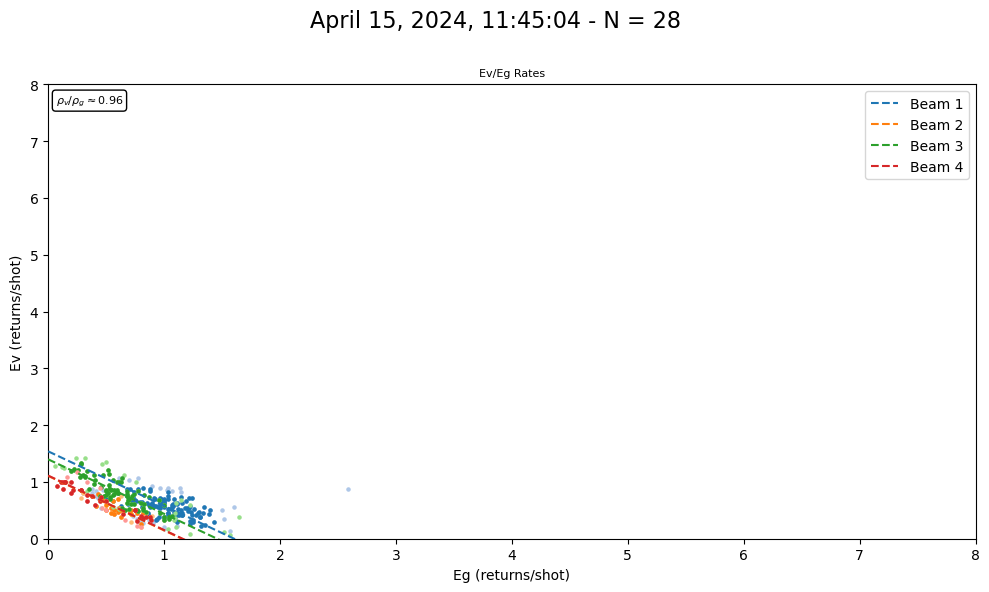

Nothing in rebinned section for oregon_yp file 29's beam 1.
Nothing in rebinned section for oregon_yp file 29's beam 2.


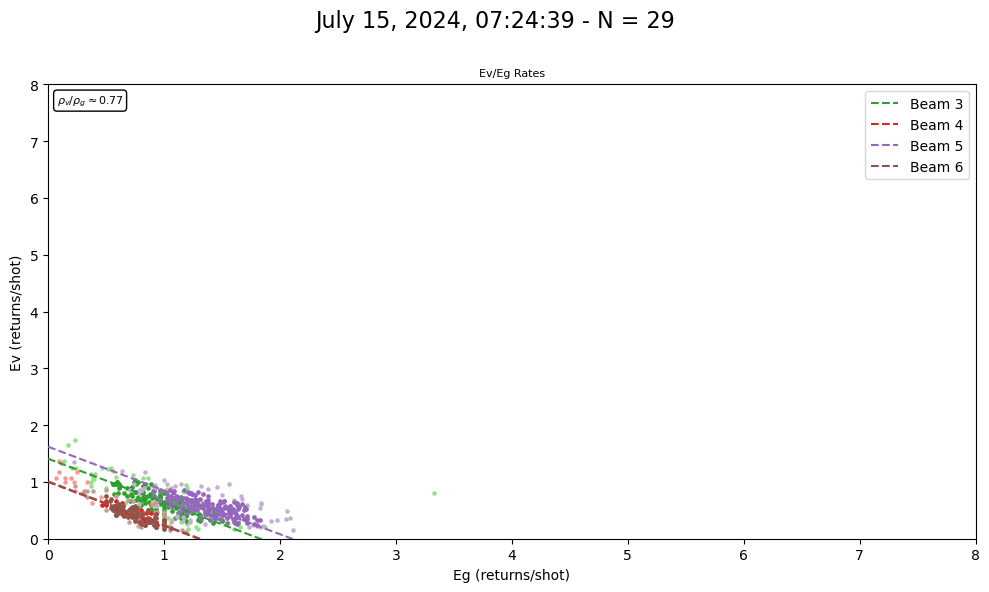

In [1]:
from scripts.parallel_blocks import *
# from scripts.parallel_phoreal import *
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust the display width to show all columns
# pd.set_option('display.max_colwidth', None)  # Show full content of each column

dirpath = '../data_store/data/oregon_yp/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

coords = (-121.606, 44.3238)

for i in range(N):
# for i in [5]:
    # print(all_ATL03[i], all_ATL08[i])

    # BASE
    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=977, threshold=1, graph_detail=1)

    # BLOCKS
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=977, threshold=1, small_box=8.05, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=.25,method='bimodal')
    # data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,file_index=i, alt_thresh=80,\
    #                      altitude=977, threshold=1, small_box=10, graph_detail=1, loss='arctan', rebinned=30, f_scale=.05,
    #                      outlier_removal=3)